# Proyecto: Análisis de mercado inmobiliario en la ciudad de Buenos aires, basado en EDA, ingeniería de features, desarrollo e interpretación de modelos avanzados para predicción de precios de venta de inmuebles 

El presente proyecto utiliza un dataset con información de propiedades a la venta en Gran Buenos Aires, obtenido a partit de los registros en la plataforma web [Properati](https://www.properati.com.ar/data/). Este conjunto de datos ha sido procesado luego de su desacarga de la plataforma; el particular, algunas características de las propiedades fueron descartadas en una revisión preliminar, por no considerarse relevantes para el objetivo último: desarrollar un modelo avanzado y optimizado, de acuerdo a los datos, para predecir precios de inmuebles en G.B.A. No obstante, el descarte de otras variables irrelevantes para el objeto del proyecto también se realiza eventualmente al seguir con el análisis.

En el presente proyecto, `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.

### Preliminares: Análisis Exploratorio de Datos

En esta sección, se realizará un EDA sobre el dataset de propiedades de Properati. Se tratarán las siguientes cuestiones durante el análisis:

* ¿Qué tamaño tiene el dataset?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? 

### Más adelante:

* ¿Cómo se relacionan las variables entre sí?
* ¿Cómo están correlacionadas las variables numéricas?
* ¿Cuáles serán los mejores predictores de la variable de interés?


**Importe de librerías necesarias para trabajar inicialmente:**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

**Carga del dataset:**

Para cargar el dataset desde un directorio local en la PC a Google Colab, empleamos la función *files.upload()*:

In [ ]:
#from google.colab import files
#files.upload()

#Esta función cargará el archivo temporalmente a Colab, y podrá ser usado para construir df de Pandas.

Para autorizar cargar archivos de Google Drive a Google Colab:

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

#Al correr la función anterior, se deberá hacer clic en el enlace que aparece luego de "Go to this URL in a browser:", seguir las instrucciones, y pegar el enlace que se suministra al final.

Mounted at /content/drive


Para usar el archivo cargardo con *files.upload()*, para usar el dataset guardado en Google Drive (una vez se haya autorizado con *drive.mount()*), o para cargar el archivo desde un directorio local a un notebook local:


In [ ]:
#path = "/content/drive/My Drive/Colab Notebooks/data/DS_Proyecto_01_Datos_Properati_fixed.csv" #Nombre del archivo cargado con files.upload(), nombre del archivo en directorio local, o ruta del archivo en G. Drive
path = "DS_Proyecto_01_Datos_Properati.csv"
datos_properati = pd.read_csv(path)

**Vista inicial del dataset, y ver sus dimensiones:**

In [ ]:
print("Número de instancias en el dataset: ", datos_properati.shape[0])
print("Número de características de dichas instancias: ", datos_properati.shape[1])
print("Lista de características del dataset:\n")
list(datos_properati.columns)

Número de instancias en el dataset:  146660
Número de características de dichas instancias:  19
Lista de características del dataset:



['start_date',
 'end_date',
 'created_on',
 'lat',
 'lon',
 'l1',
 'l2',
 'l3',
 'rooms',
 'bedrooms',
 'bathrooms',
 'surface_total',
 'surface_covered',
 'price',
 'currency',
 'title',
 'description',
 'property_type',
 'operation_type']

**Vista parcial del dataset:**

In [ ]:
datos_properati.head(15)

start_date    end_date  ... property_type  operation_type
0  2019-10-17  2019-12-23  ...  Departamento           Venta
1  2019-10-17  2019-11-21  ...            PH           Venta
2  2019-10-17  2019-11-01  ...            PH           Venta
3  2019-10-17  2019-12-23  ...            PH           Venta
4  2019-10-17  2020-03-11  ...            PH           Venta

[5 rows x 19 columns]


**A partir de lo anterior puede evidenciarse que:** 

**a) features descartables:** las columnas **"title" y "description"** contienen datos no estructurados, y **pueden ser descartadas** para los siguientes procesos.

Además, según [Properati](https://www.properati.com.ar/data/), **todos los precios estan dados en USD, corresponden únicamente a precios de venta, y todas las instancias provienen de Argentina**; lo que implica que las features **"currency", "operation_type", y "l1" también son descartables** para lo siguiente.

**b) features reemplazables (o transformables):** considerando que, según [Properati](https://www.properati.com.ar/data/), los siguientes features se describen como: 

* start_date: Fecha de alta del aviso.
* end_date: Fecha de baja del aviso.
* created_on: Fecha de alta de la primera versión del aviso.

Es posible que los valores de las features "start_date", "end_date", y	"created_on" puede ser más adecuado reemplazarlos por variables que indiquen el tiempo que demoró publicado cada anuncio, si el anuncio sólo se presentó una vez, o más veces; en qué año se publicó; y en qué mes se publicó. 

**Por otro lado, las variables "l2", "l3" y "lat"/"lon" pueden ser intercambiables para algunos análisis posteriores** (pues hacen referencia a la localización de las instancias, con mayor o menor especificidad). Revisemos la siguiente gráfica para saber si cada valor de l3 corresponda únicamente a un valor de l2:

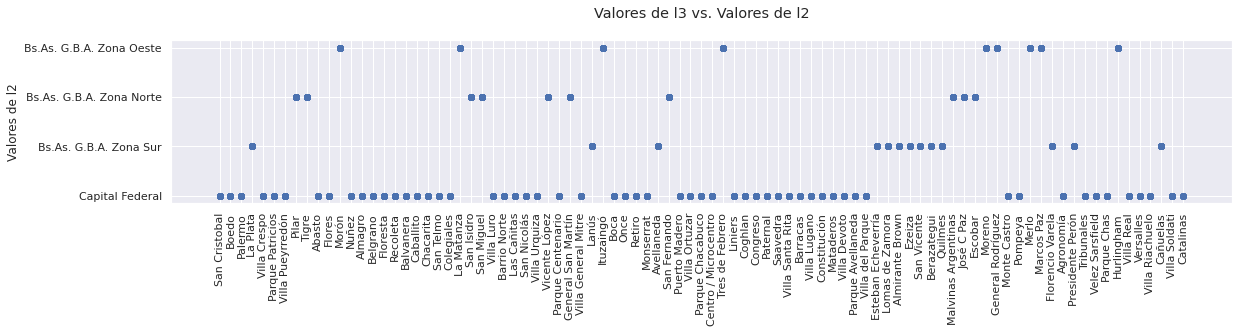

In [ ]:
plt.figure(figsize=(19,3))
plt.scatter(datos_properati.l3, datos_properati.l2)

plt.xticks(rotation=90)
plt.title('Valores de l3 vs. Valores de l2\n', fontsize='x-large')
plt.ylabel('Valores de l2')
plt.show()

La gráfica anterior evidencia que cada valor de "l3" corresponde únicamente a un valor de "l2", lo que puede resultar útil para simplificar algunos análisis o procesos: pues se podrían usar los valores de la variable "l3" para indicar zonas específicas a las que corresponden las propiedades, de manera alternativa a como se podría emplear su ubicación geográfica.

Por lo pronto, a efectos de una comprensión general de las distribuciones de los datos, es preferible emplear l2, sobre l3; por resultar los valores de la primera mucho menos específicos y numerosos (4 categorías de l2 vs. 80+ categorías de l3).

**c) features para análisis de ditribuciones en áreas:** ya que los features "lat" y "lon" indican coordenadas geográficas, su uso es preferible para visualizar distribuciones de las propiedades de instancias en un mapa; antes que para análisis de sus distribuciones de frecuencias, o de sus correlaciones con otras variables unidemensionales.

**Vista inicial de instancias con datos faltantes:**

Una lista y una gráfica con el porcentaje de valores faltantes por features del dataset se presentan a continuación:


Porcentaje de valores faltantes por features:

start_date: 0.0 %  (0 valores)
end_date: 0.0 %  (0 valores)
created_on: 0.0 %  (0 valores)
lat: 6.767 %  (9925 valores)
lon: 6.791 %  (9959 valores)
l1: 0.0 %  (0 valores)
l2: 0.0 %  (0 valores)
l3: 0.0 %  (0 valores)
rooms: 0.0 %  (0 valores)
bedrooms: 0.0 %  (0 valores)
bathrooms: 4.062 %  (5957 valores)
surface_total: 13.996 %  (20527 valores)
surface_covered: 14.737 %  (21614 valores)
price: 0.0 %  (0 valores)
currency: 0.0 %  (0 valores)
title: 0.0 %  (0 valores)
description: 0.0 %  (0 valores)
property_type: 0.0 %  (0 valores)
operation_type: 0.0 %  (0 valores)

Porcentaje de instancias con algún valor faltante:
 21.936 %



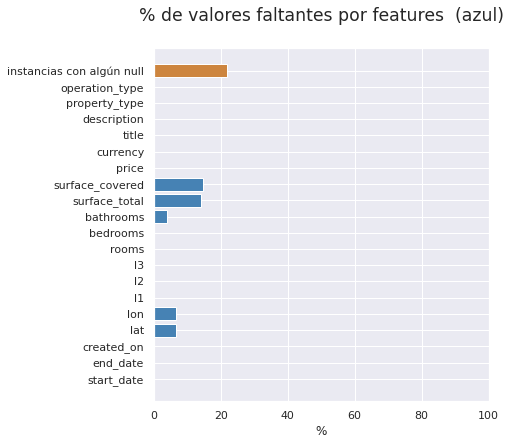

In [ ]:
print("\nPorcentaje de valores faltantes por features:\n")
porcentaje_faltantes = {}
for column in datos_properati.columns:
  conteo_faltantes = sum(pd.isna(datos_properati[column]))
  porcentaje = round((conteo_faltantes/datos_properati.shape[0])*100, 3)
  porcentaje_faltantes[column] = porcentaje
  print(column + ": " + str(porcentaje), "%  (" + str(conteo_faltantes) +" valores)")

print("\nPorcentaje de instancias con algún valor faltante:\n", round((datos_properati.isnull().any(axis=1).sum()/datos_properati.shape[0])*100, 3), "%\n")

plt.figure(figsize=(6,6.5))
plt.xlabel('%')
plt.xlim(0,100)
plt.title('% de valores faltantes por features  (azul)\n', fontsize='x-large')
plt.barh(list(porcentaje_faltantes.keys()), list(porcentaje_faltantes.values()), align='center', color = 'steelblue')
plt.barh(list(["instancias con algún null"]), list([round((datos_properati.isnull().any(axis=1).sum()/datos_properati.shape[0])*100, 3)]), 
         align='center', color = 'peru')
plt.show()

A partir de lo anterior, conocemos que **el porcentaje de instancias con alguna característica vacía es aproximadamente 22%.**

Además, **puede apreciarse que los valores faltantes se presentan exclusivamente en características numéricas**; por tanto, las características categóricas resultarán especialmente importantes para entender las distribuciones y aspectos generales de las instancias del conjunto de datos, al ser características presentes y comparables en todos los casos.

El origen probable y el método de imputación preferible para los valores faltantes numéricos, se abordará luego de lograr entender la distribución de las distintas características de los datos y sus relaciones, así como la identificación y posible depuración de instancias con características atípicas.

## Distribución de variables categóricas

**¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset?**

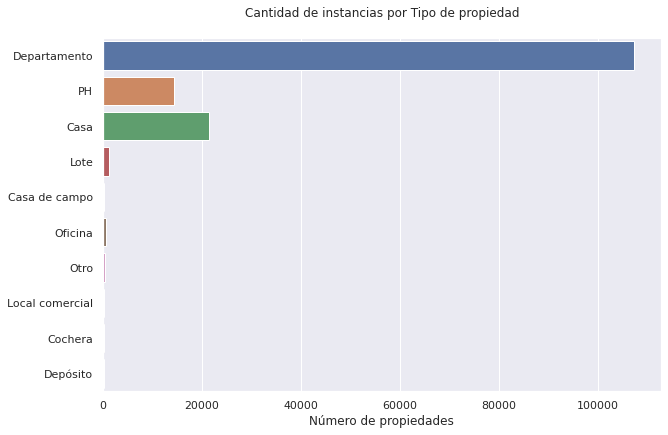

In [ ]:
plt.figure(figsize=(10,6.5))
sns.countplot(data = datos_properati, y = "property_type")
plt.xlabel('Número de propiedades')
plt.ylabel('')
plt.title('Cantidad de instancias por Tipo de propiedad\n')
plt.show()

La gráfica anterior evidencia que **el dataset presenta información de 10 tipos de propiedades, pero en su gran mayoría, sobre Departamentos.** Otro tipo de inmuebles frecuentes son PH y Casas, aunque en menor proporción. **Estas proporciones se describen a continuación:**

In [ ]:
proporcionesxtipo = {}
proporcionesxtipo['Tipo de propiedad'] = list(datos_properati['property_type'].value_counts().keys())
proporcionesxtipo['# de instancias'] = list(datos_properati['property_type'].value_counts())
proporcionesxtipo['%'] = list(round(datos_properati['property_type'].value_counts(1)*100, 3))
pd.DataFrame(proporcionesxtipo)

Tipo de propiedad  # de instancias       %
0      Departamento           107326  73.180
1              Casa            21521  14.674
2                PH            14298   9.749
3              Lote             1312   0.895
4           Oficina              658   0.449
5              Otro              374   0.255
6   Local comercial              325   0.222
7     Casa de campo              322   0.220
8          Depósito              265   0.181
9           Cochera              259   0.177

**A partir de la tabla anterior comprobamos que los Departamentos, PH, Casas, y Lotes suponen el 98,5% de las instancias del dataset**

**¿De qué regiones son las publicaciones?**

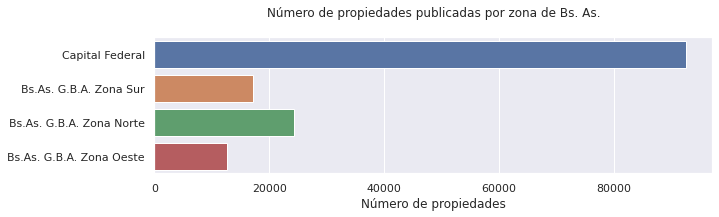

In [ ]:
plt.figure(figsize=(10,2.5))
sns.countplot(data = datos_properati, y = "l2")
plt.xlabel('Número de propiedades')
plt.ylabel('')
plt.title('Número de propiedades publicadas por zona de Bs. As.\n')
plt.show()

La anterior gráfica evidencia que la mayoría de instancias del dataset se asocian a la Capital Federal de Bs. As. La cantidad y porcentaje de instancias por zonas 'l2' se listan a continuación:

In [ ]:
proporciones_zona = {}
proporciones_zona['Zona de propiedad'] = list(datos_properati['l2'].value_counts().keys())
proporciones_zona['# de instancias'] = list(datos_properati['l2'].value_counts())
proporciones_zona['%'] = list(round(datos_properati['l2'].value_counts(1)*100, 3))
pd.DataFrame(proporciones_zona)

Zona de propiedad  # de instancias       %
0           Capital Federal            92539  63.098
1  Bs.As. G.B.A. Zona Norte            24282  16.557
2    Bs.As. G.B.A. Zona Sur            17173  11.709
3  Bs.As. G.B.A. Zona Oeste            12666   8.636

Ahora, un gráfico que combine la información vista en las 2 gráficas anteriores:

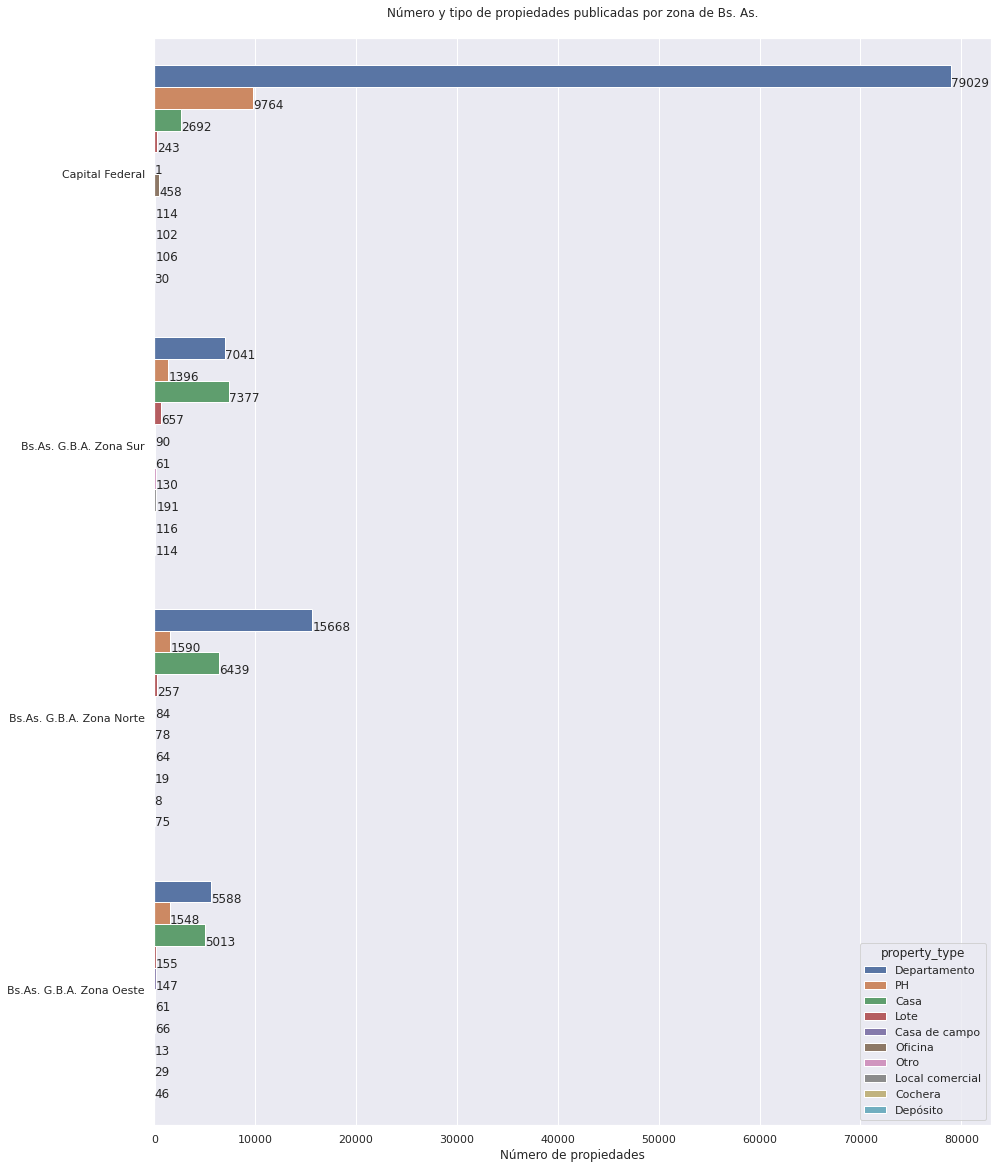

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

plt.figure(figsize=(15,20))

graph = sns.countplot(data = datos_properati, y = "l2", hue= "property_type")
show_values_on_bars(graph, "h")
plt.xlabel('Número de propiedades')
plt.ylabel('')
plt.title('Número y tipo de propiedades publicadas por zona de Bs. As.\n')
#plt.legend(loc='center right')
plt.show()

La gráfica anterior evidencia que **el dataset contiene mayoritariamente información sobre Departamentos en la Capital Federal de Bs. As.**; seguida de información sobre PHs, Casas y Lotes, distribuídas de manera más equitativa en las distintas zonas de las que se recopilaron los datos.

Ahora examinemos la distribución de la información por barrios o partidos de las distintas zonas de Bs. As.

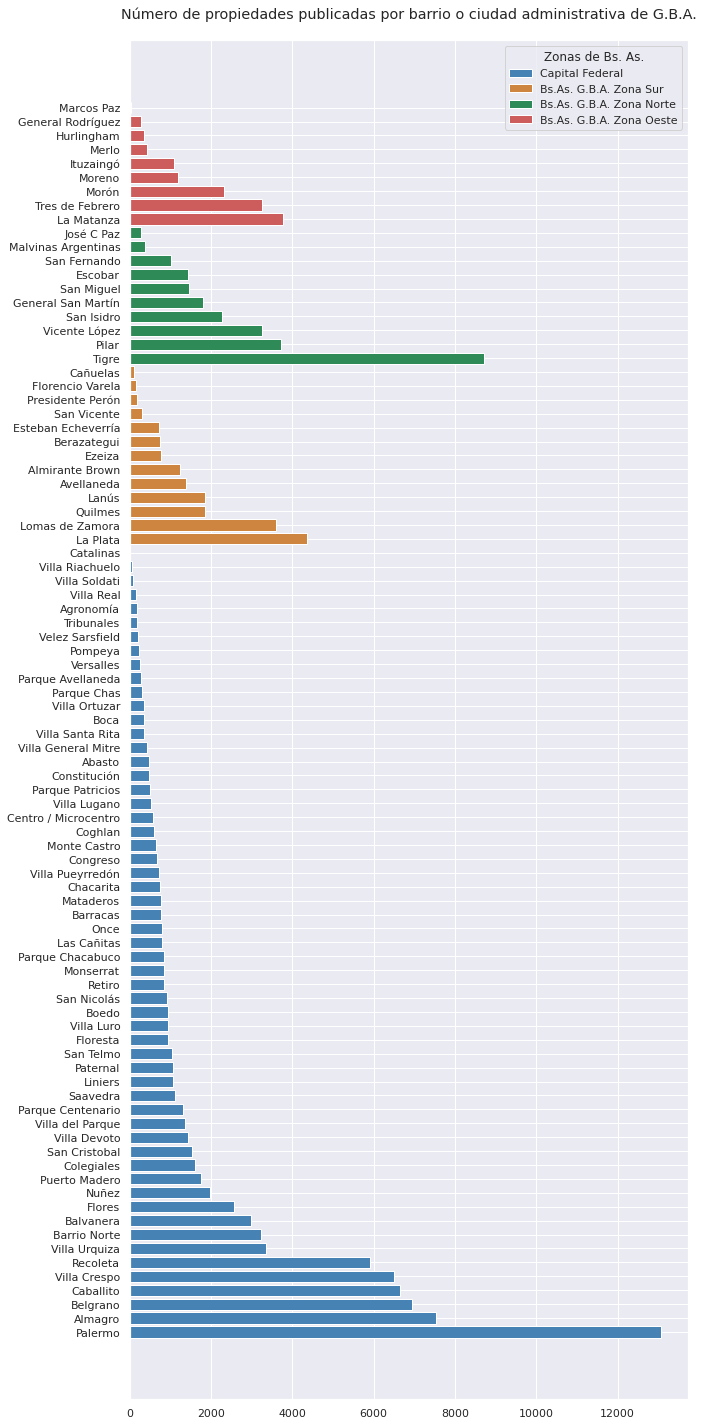

In [ ]:
capital = datos_properati.l3[datos_properati.l2 == "Capital Federal"]
zona_sur = datos_properati.l3[datos_properati.l2 == "Bs.As. G.B.A. Zona Sur"]
zona_norte = datos_properati.l3[datos_properati.l2 == "Bs.As. G.B.A. Zona Norte"]
zona_oeste = datos_properati.l3[datos_properati.l2 == "Bs.As. G.B.A. Zona Oeste"]

plt.figure(figsize=(10,25))
plt.title('Número de propiedades publicadas por barrio o ciudad administrativa de G.B.A.\n', fontsize='x-large')
plt.barh(list(capital.value_counts().keys()), list(capital.value_counts()), color ="steelblue", label="Capital Federal")
plt.barh(list(zona_sur.value_counts().keys()), list(zona_sur.value_counts()), color ="peru", label="Bs.As. G.B.A. Zona Sur")
plt.barh(list(zona_norte.value_counts().keys()), list(zona_norte.value_counts()), color ="seagreen", label="Bs.As. G.B.A. Zona Norte")
plt.barh(list(zona_oeste.value_counts().keys()), list(zona_oeste.value_counts()), color ="indianred", label="Bs.As. G.B.A. Zona Oeste")
plt.legend(title = "Zonas de Bs. As.")

plt.show()

La anterior gráfica además deja en evidencia que **la mayoría de la información recopilada proviene de pocos barrios o partidos de las distintas zonas de G. Bs. As; especialmente, de la Capital federal...**

La asimetría o sesgos de frecuencia evidenciados en las gráficas anteriores, implican que las tendencias generales de las características del conjunto de datos corresponderán a las tendencias asociadas a los tipos de propiedades más frecuentes (no necesariamente similares a los menos frecuentes): por ello será importante discriminar por tipo de propiedad, y ubicación, al analizar las tendencias de las características.

##Distribución de variables numéricas

Construyamos un dataframe que incluya exclusivamente las variables numéricas disponibles hasta el momento (sin tener en cuenta por ahora aquellas relativas a posición geográfica, como 'lat' y 'lon'). Y revisemos un resumen de los estadísticos de las distribuciones de sus variables:

In [ ]:
datos_properati_numericos = datos_properati.loc[:, ('rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')]
round(datos_properati_numericos.describe(), 4)

rooms     bedrooms  ...  surface_covered         price
count  146660.0000  146660.0000  ...      125046.0000  1.466600e+05
mean        3.0798       1.9832  ...         112.8180  2.412211e+05
std         1.4164       1.1513  ...         916.8576  3.185195e+05
min         1.0000       0.0000  ...           1.0000  5.500000e+03
25%         2.0000       1.0000  ...          47.0000  1.110000e+05
50%         3.0000       2.0000  ...          68.0000  1.660000e+05
75%         4.0000       3.0000  ...         108.0000  2.650000e+05
max        35.0000      15.0000  ...      126062.0000  3.243423e+07

[8 rows x 6 columns]

De lo anterior percibimos: 

* Algunas propiedades se asocian a valores de superficie cubierta de hasta 1m2, o a valores de superficie total de hasta 10m2; las instancias con dichos valores pueden resultar razonables para inmuebles de cierto tipo, como Cocheras, Depósitos, o Locales... Sin embargo, las instancias con superficies inferiores a 20m2 deberían resultar atípicas para propiedades como Departamentos, Casas, o PHs (considerando la configuración común de estos tipos de inmuebles; este punto puede sustentarse mejor examinando estadísticos para cada tipo de inmueble en registros catastrales de las zonas consideradas; o fuentes que den cuenta de simensiones comunes para determinados tipos de inmuebles). Un razonamiento similar podría hacerse para las instancias con 0 'bedrooms', así como aquellas con 15 baños, o con 35 habitaciones.

* **Todas las variables consideradas presentan valores atípicos máximos según el criterio del rango intercuartílico (IQR)** (considerando que sus valores máximos sobrepasan por un factor mayor a 10 su media más 3 desviaciones estándar); sobre todo las relativas a superficies y precio (variables que, por lo mismo, presentan mayor diferencia entre sus medias y medianas). Sin embargo, **esto podría percibirse mejor en los siguientes diagramas:**

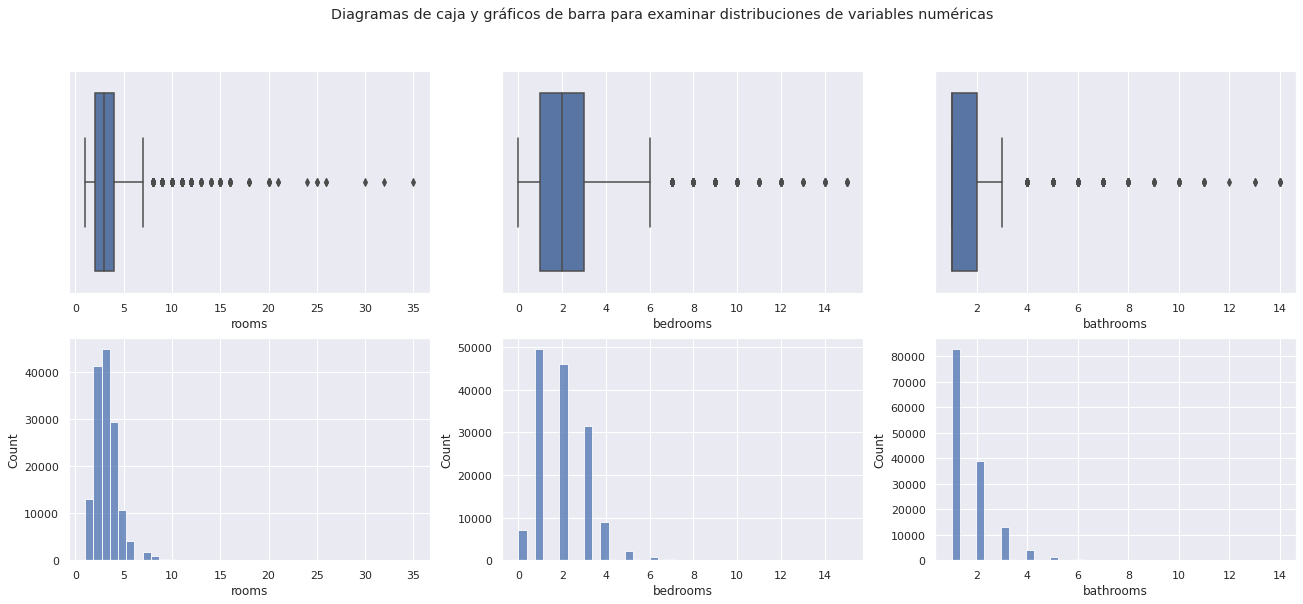

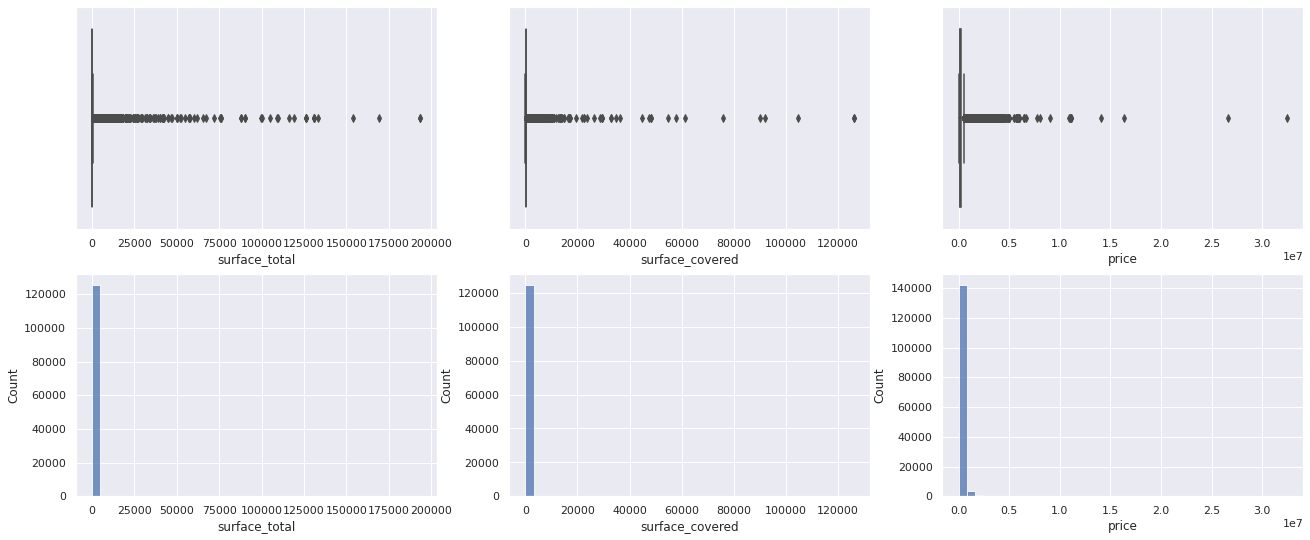

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(22,9))
fig.suptitle('Diagramas de caja y gráficos de barra para examinar distribuciones de variables numéricas')
sns.boxplot(x='rooms', data=datos_properati_numericos, ax=axs[0,0])
sns.boxplot(x='bedrooms', data=datos_properati_numericos, ax=axs[0,1])
sns.boxplot(x='bathrooms', data=datos_properati_numericos, ax=axs[0,2])
sns.histplot(datos_properati_numericos['rooms'], bins = 40, ax=axs[1,0], kde=False)
sns.histplot(datos_properati_numericos['bedrooms'], bins = 40, ax=axs[1,1], kde=False)
sns.histplot(datos_properati_numericos['bathrooms'], bins = 40, ax=axs[1,2], kde=False)

fig, axs = plt.subplots(2,3,figsize=(22,9))
sns.boxplot(x='surface_total', data=datos_properati_numericos, ax=axs[0,0])
sns.boxplot(x='surface_covered', data=datos_properati_numericos, ax=axs[0,1])
sns.boxplot(x='price', data=datos_properati_numericos, ax=axs[0,2])
sns.histplot(datos_properati_numericos['surface_total'], bins = 40, ax=axs[1,0], kde=False)
sns.histplot(datos_properati_numericos['surface_covered'], bins = 40, ax=axs[1,1], kde=False)
sns.histplot(datos_properati_numericos['price'], bins = 40, ax=axs[1,2], kde=False)
plt.show()

Lo anterior evidencia gráficamente que **las variables numéricas examinadas tienen distribuciones sesgadas positivamente, y todas presentan valores atípicos que sería conveniente filtrar para favorecer su visualización y análisis.** Cabe resaltar que las características 'rooms', 'bedrooms', y 'bathrooms', presentan valores extremos mucho menos alejados de sus medias y medianas que los de las demás características numéricas consideradas; de modo que sus diagramas de distribución permiten detallar los rangos de valores en que se concentran sus datos, aún con valores atípicos. 

Se considera que **lo que motivará principalmente el posible filtro de algunas instancias con características numéricas atípicas es que se asocien a valores que resulten absurdos o irrazonables para tales instancias** (como Departamentos con superficies construídas mayores a una hectárea). También se tiene en cuenta que el filtro de instancias con valores atípicos puede realizarse para analizarlas separadamente, y tratar de determinar si se peden determinar valores razonables para sus características atípicas.

**Es probable que las distribuciones de las variables numéricas y sus valores atípicos se relacionen con los valores de variables categóricas: como tipo de propiedad, o ubicación según 'l2'; y que, en ese sentido, sus valores aparentemente atípicos resulten típicos considerando las catagorías mencionadas.** Para ganar claridad sobre esto último, examinemos los siguientes diagramas:



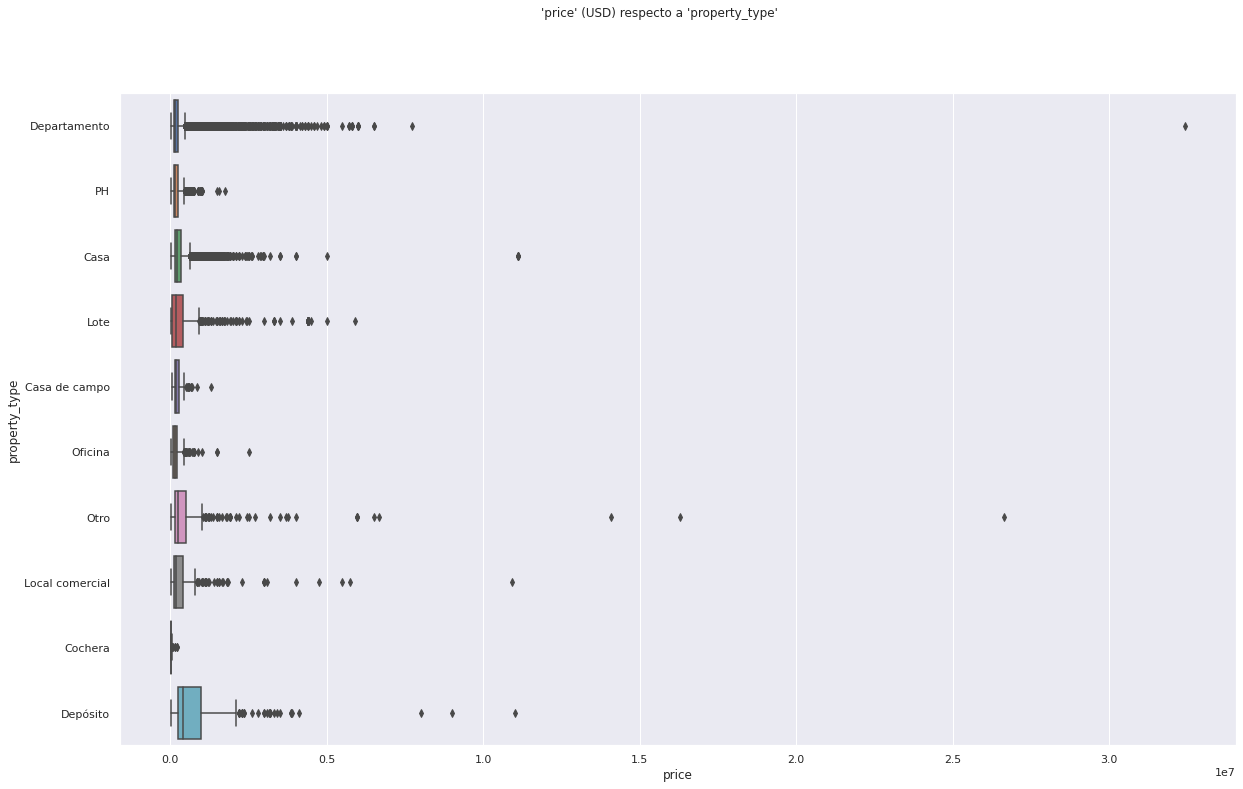

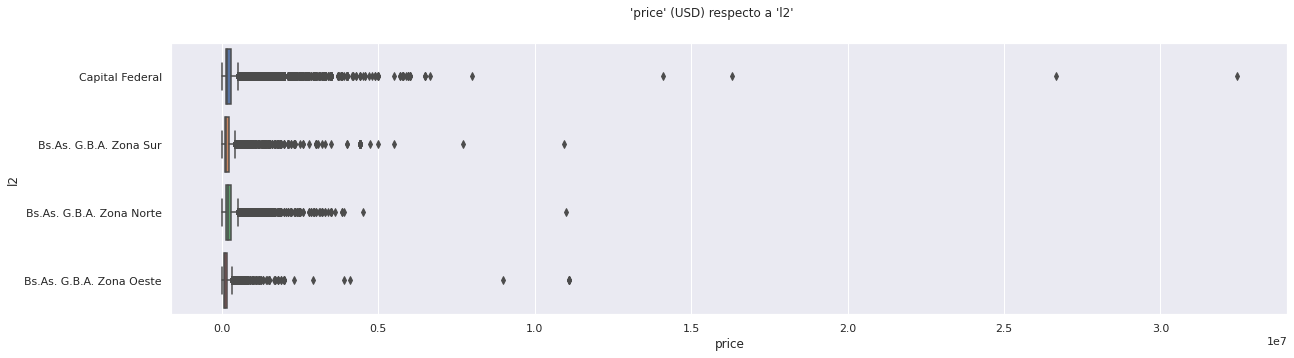

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle("'price' (USD) respecto a 'property_type'")
sns.boxplot(x='price', y='property_type', data=datos_properati)
plt.figure(figsize=(20,5))
plt.suptitle("'price' (USD) respecto a 'l2'")
sns.boxplot(x='price', y='l2', data=datos_properati)
plt.show()

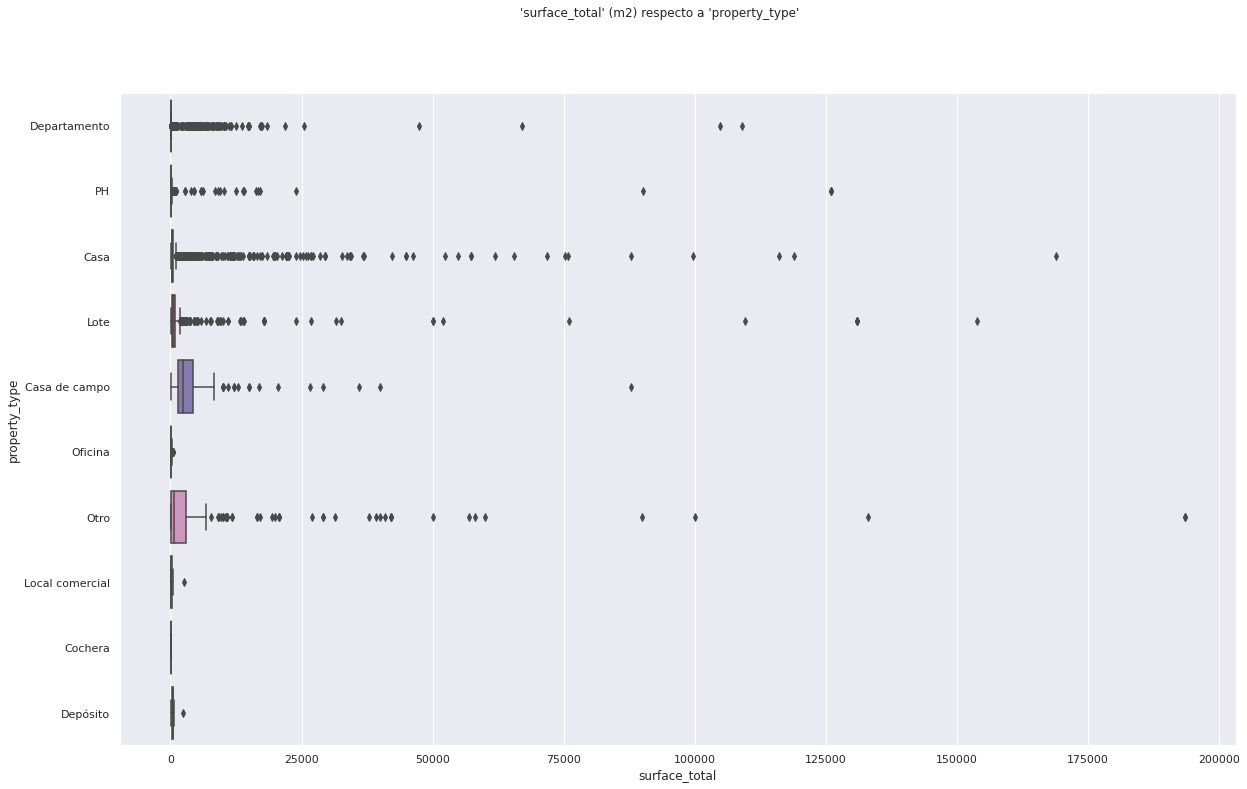

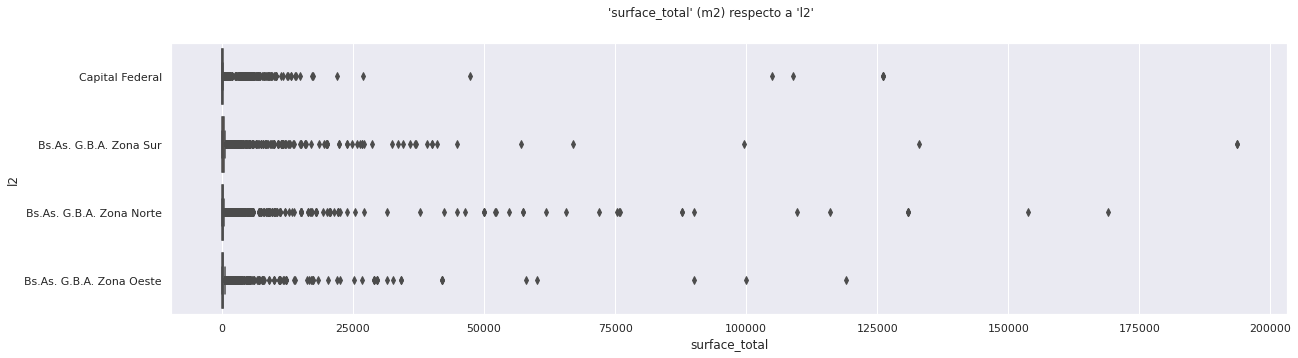

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle("'surface_total' (m2) respecto a 'property_type'")
sns.boxplot(x='surface_total', y='property_type', data=datos_properati)
plt.figure(figsize=(20,5))
plt.suptitle("'surface_total' (m2) respecto a 'l2'")
sns.boxplot(x='surface_total', y='l2', data=datos_properati)
plt.show()

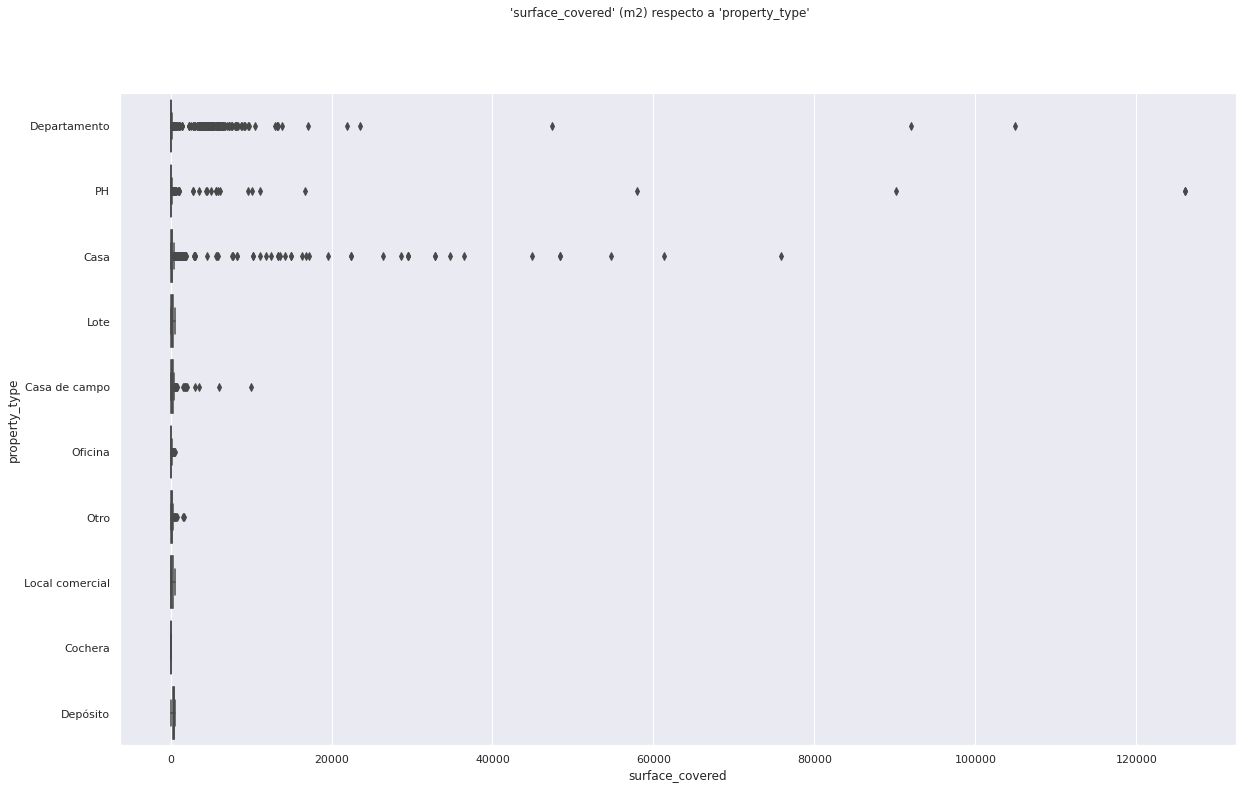

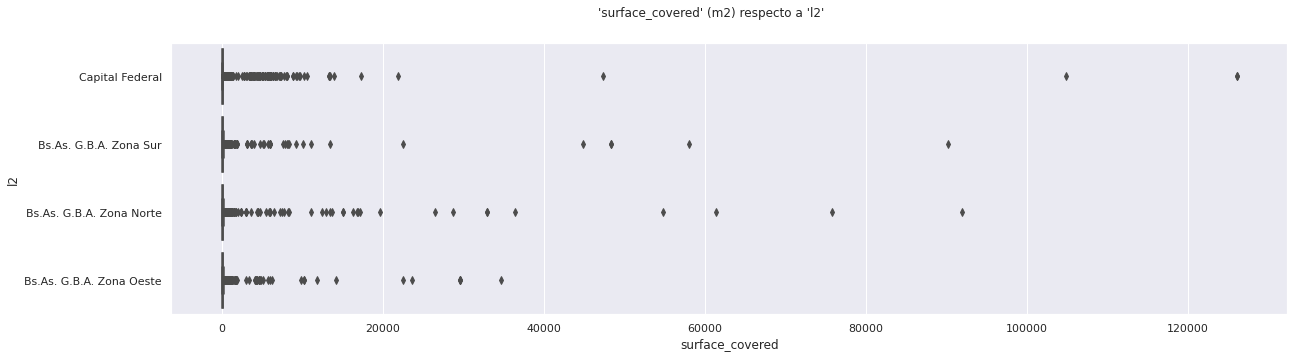

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle("'surface_covered' (m2) respecto a 'property_type'")
sns.boxplot(x='surface_covered', y='property_type', data=datos_properati)
plt.figure(figsize=(20,5))
plt.suptitle("'surface_covered' (m2) respecto a 'l2'")
sns.boxplot(x='surface_covered', y='l2', data=datos_properati)
plt.show()

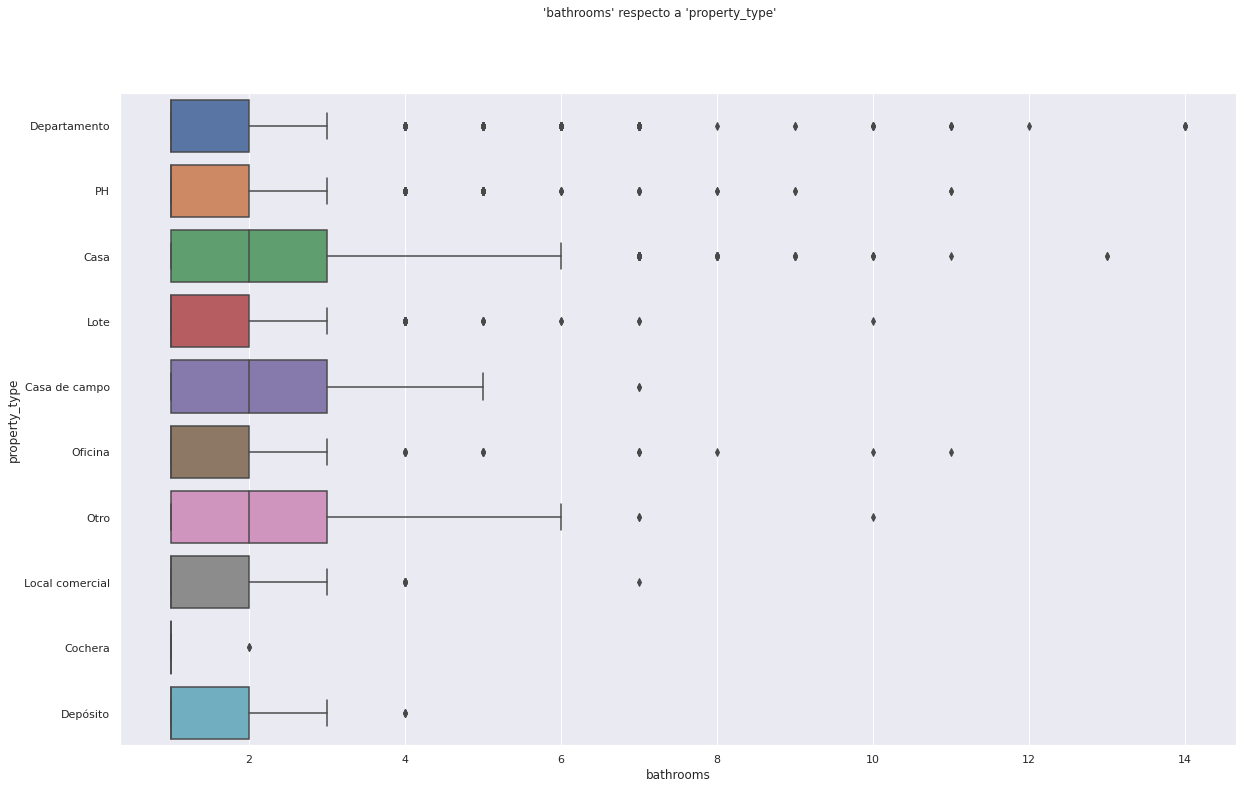

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle("'bathrooms' respecto a 'property_type'")
sns.boxplot(x='bathrooms', y='property_type', data=datos_properati)
plt.show()

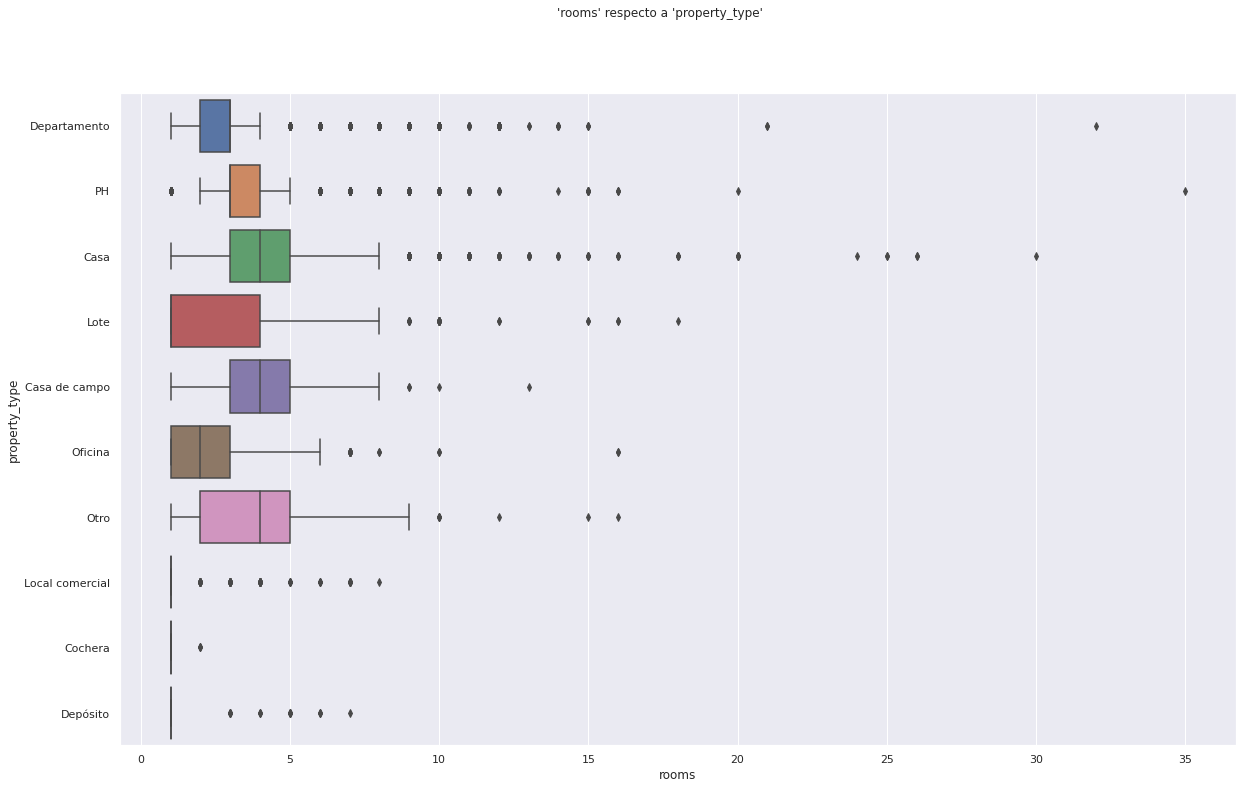

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle("'rooms' respecto a 'property_type'")
sns.boxplot(x='rooms', y='property_type', data=datos_properati)
plt.show()

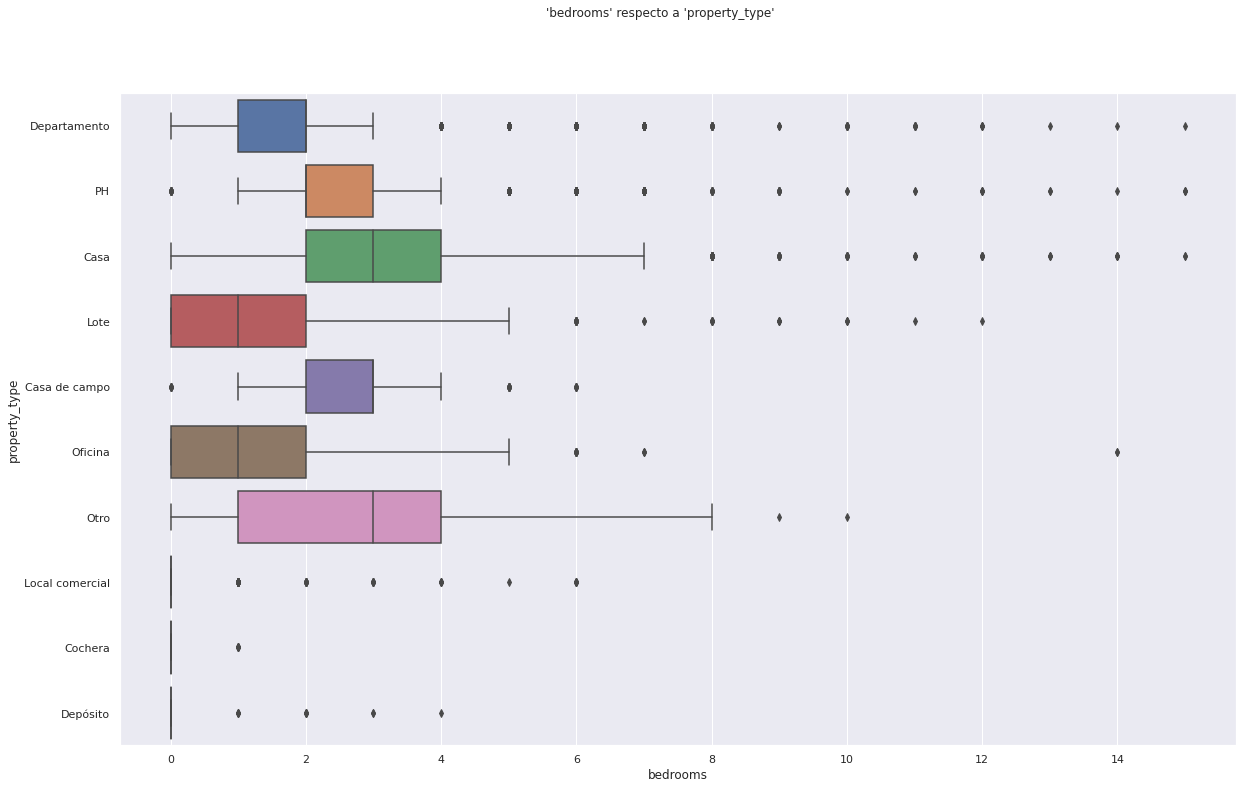

In [ ]:
plt.figure(figsize=(20,12))
plt.suptitle("'bedrooms' respecto a 'property_type'")
sns.boxplot(x='bedrooms', y='property_type', data=datos_properati)
plt.show()

A partir de las gráficas anteriores pueden evidenciarse varios puntos:

**a) Respecto a precio:**
* La distribución de la variable 'price' no parece variar notablemente según el tipo de las propiedades (considerando, sobre todo, los tipos de propiedad con la mayor frecuencia), o a la zona de Buenos Aires en la que se ubican. Sin embargo, esta interpretación se ve afectada por el hecho de que la dispersión de los valores atípicos en la distribución de esta variable dificulta su visualización y análisis. 
A pesar de lo anterior, sí es visible que las distribuciones de precios de Depósitos, Locales comerciales, Lotes, y Otros, se dispersan normalmente sobre un mayor rango de precios, y que se asocian generalmente a mayores precios que los demás tipos de propiedades, por la extensión de los bigotes de las distribuciones de precios vistas para cada tipo de propiedad.

**b) Respecto a la superficie total:**
* La distribución de la superficie total de los inmuebles, tampoco parece variar notablemente según el tipo de las propiedades (considerando, sobre todo, los tipos de propiedad con la mayor frecuencia), o a la zona de Buenos Aires en la que se ubican. Sin embargo, esta interpretación se ve afectada por el hecho de que la dispersión de los valores atípicos en la distribución de esta variable dificulta su visualización y análisis. 
A pesar de lo anterior, sí es visible que las Casas de campo, y los inmuebles de tipo Otros, se dispersan normalmente sobre un mayor rango de áreas totales, y se asocian generalmente a mayores áreas totales que los demás tipos de propiedades; por la extensión que logran los bigotes de las distribuciones de precios para cada tipo de propiedad.

* **Esta variable presenta valores absurdos para determinados tipos de propiedad:** esto es especialmente evidente para Departamentos o Casas, que se asocian a valores atípicos mucho más dispersos que los Propiedades Horizontales, por ejemplo; e incluso presentan valores superiores a 10000m2 (1 hectárea). 

**c) Respecto a la superficie cubierta:**
* La distribución de la superficie cubierta  de los inmuebles, tampoco parece variar notablemente según el tipo de las propiedades (considerando, sobre todo, los tipos de propiedad con la mayor frecuencia), o a la zona de Buenos Aires en la que se ubican. Sin embargo, esta interpretación se ve afectada por el hecho de que la dispersión de los valores atípicos en las distribución de esta variable dificulta su visualización y análisis. 

* En adición, **en esta variable también es posible identificar valores absurdos para determinados tipos de propiedad:** como Departamentos o Casas, que se asocian a valores atípicos mucho más dispersos que los asociados por ejemplo a PH, e incluso presentan valores superiores a 10000m2 (1 hectárea). 

**d) Respecto a baños:**
* **La distribución de los baños según cada tipo de propiedad evidencia que generalmente un inmueble no incluye más de 3 baños**; no obstante, también es visible que las Casas, las Casas de campo, y los inmuebles de tipo Otro, se asocian a una mayor varianza, y a mayores cantidades de baños, que los demás tipos de inmuebles. 

* Por otro lado, a pesar de que la cantidad de baños de un inmueble pueda variar en función de su diseño, uso, o demás características particulares, sí puede argumentarse que **no se espera que las Cocheras tengan más de 0 baños, y que si los distintos tipos de propiedades se restrinjen a valores de áreas típicos, tampoco se espera que la cantidad de baños que tengan sea atípica** (por ejemplo: no se espera que si limitamos los departamentos a tener máximo 80m2 (o algún valor dentro del rango intercuartílico de esta variable), encontremos uno con 10 baños (o una cantidad atípica de baños)).

**d) Respecto a habitaciones/ambientes:**
* **Los valores de esta variable presentan gran variabilidad entre los distintos tipos de propiedad; lo cuál es de esperar, considerando que uno de los principales factores que define distintos tipos de inmuebles es la configuración de sus habitaciones.** 

* También es visible que **el conjunto de datos incluye instancias con cantidades de habitaciones atípicas para todos los tipos de inmuebles considerados.**

* Por otro lado, a pesar de que la cantidad de ambientes de un inmueble pueda variar en función de su diseño, uso, o demás características particulares, sí **puede argumentarse que si los distintos tipos de propiedades se restrinjen a valores de áreas típicos, no se espera que su cantidad de ambientes sea atípica** (por ejemplo: no se espera que si limitamos los departamentos a tener máximo 80m2 (o algún valor dentro del rango intercuartílico de esta variable), encontremos uno con 10 habitaciones (o una cantidad atípica de habitaciones)).

* **Consideraciones similares a las indicadas para esta variable se pueden extender al análisis de la variable "dormitorios".**

**En resumen, las gráficas anteriores evidenciaron que todas las variables numéricas presentan valores atípicos que dificultan la interpretación de las concentraciones de datos en sus distribuciones; y que las variables relativas al área de los inmuebles presentan valores absurdos/erróneos para determinados tipos de instancias (como superficies mayores a una hectárea para Departamentos y Casas)**, independientemente de su relación con otras variables categóricas (pues también es visible que a partir de determinado punto, estas variables solo muestran valores atípicos absurdos para cualquier categoría considerada); además, no resulta razonable asumir que instancias limitadas a valores de área típicos (según su tipo) presenten cantidades de baños, habitaciones o dormitorios atípicas; por tanto, también se filtrarán las instancias cuyos valores de baños, habitaciones o dormitorios resulten atípicos (de acuerdo al tipo de propiedad evaluada).

**Por tanto, a continuación se intentarán determinar intervalos en los que las áreas de los distintos tipos de instancias se mantienen razonables**, al resultar estas valoraciones más cercanas al conocimiento público y el sentido común, dado que las dimensiones de los inmuebles generalmente son públicas y pueden estimarse a partir de referentes cercanos (a diferencia de características más susceptibles a variar por factores privados o particulares como precio, aunque esta variable también presente valores atípicos). **Para ello, inicialmente nos remitiremos a los límites de los bigotes de los diagramas de caja de las variables área construída y área total y analizaremos lo que señalan como valores atípicos** (aquellos fuera del rango limitado por estos límites), **para cada tipo de propiedad. Es decir, probaremos el criterio del rango IQR para reconocer valores atípicos** (y potencialmente descartables) en las variables a examinar:

In [ ]:
def info_outliers (data1):
  '''
  Dada una serie con valores numéricos (asumida como un feature), devuelve estadísticos de su distribución
  que permiten determinar valores atípicos según el criterio del IQR.
  
  Argumentos:
  data1: Serie de Pandas con valores numéricos
  
  Retorno:
  dict: Diccionario con las llaves: "lower_whisker", "lower_outliers_percent", 
  "upper_whisker", "upper_outliers_percent", "lower_outlier_fence", "upper_outlier_fence".
  Donde cada llave se asocia al valor en la serie que corresponde al estadístico
  indicado por la etiqueta, y "lower_outliers_percent" y "upper_outliers_percent" 
  indican el porcentaje de valores en la serie que son inferiores o superiores a
  los valores de los bigotes, respectivamente.

  Además del diccionario retornado, la función también imprime la información 
  relativa a los bigotes de las distribuciones, y la proporción de valores 
  atípicos que determinan.
  '''  
  data = data1.dropna()
  
  median = np.median(data)
  upper_quartile = np.percentile(data, 75)
  lower_quartile = np.percentile(data, 25)
  iqr = upper_quartile - lower_quartile
  
  upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
  lower_whisker = data[data>=lower_quartile-1.5*iqr].min()
  upper_outlier_fence = data[data<=upper_quartile+3*iqr].max()
  lower_outlier_fence = data[data>=lower_quartile-3*iqr].min()

  upper_outliers_mask = data > upper_whisker
  lower_outliers_mask = data < lower_whisker

  upper_outliers_percent = round((sum(upper_outliers_mask)/data.shape[0])*100, 3)
  lower_outliers_percent = round((sum(lower_outliers_mask)/data.shape[0])*100, 3)

  upper_outliers_percent_net = round((sum(upper_outliers_mask)/datos_properati.shape[0])*100, 3)
  lower_outliers_percent_net = round((sum(lower_outliers_mask)/datos_properati.shape[0])*100, 3)

  print("{}--> valor mínimo de bigote inferior: {} ({}% de datos son menores según el tamaño de la variable, {}% son menores según el tamaño del dataset),\n\t valor máximo de bigote superior: {} ({}% de datos son superiores según el tamaño de la variable, {}% son superiores según el tamaño del dataset)\n".format(data.name, lower_whisker, lower_outliers_percent, lower_outliers_percent_net, upper_whisker, upper_outliers_percent, upper_outliers_percent_net))
  
  return {"lower_whisker": lower_whisker, "lower_outliers_percent": lower_outliers_percent, "lower_outliers_percent_net": lower_outliers_percent_net, 
          "upper_whisker": upper_whisker, "upper_outliers_percent": upper_outliers_percent, "upper_outliers_percent_net": upper_outliers_percent_net,
          "lower_outlier_fence": lower_outlier_fence, "upper_outlier_fence": upper_outlier_fence}

In [ ]:
print("Lista de valores extremos de bigotes de distribuciones de características numéricas:\n\n")
nulls_filter = datos_properati.isnull().any(axis=1)
vars_boxplot_info = {}
for propertytype in datos_properati.property_type.value_counts().keys():
  print("Valores extremos de bigotes (y porcentaje de datos fuera de los mismos) en diagramas de caja de características numéricas de: ", propertytype, "\n")
  property_type_filter = datos_properati.property_type == propertytype
  print("% de instancias de este tipo de propiedad con valores faltantes en alguna característica numérica: {}%".format(round((sum(property_type_filter&nulls_filter)/sum(property_type_filter))*100, 3)))
  vars_boxplot_info[propertytype] = {
      'surface_covered' : info_outliers(datos_properati[property_type_filter].surface_covered),
      'surface_total' : info_outliers(datos_properati[property_type_filter].surface_total),
      'bathrooms' : info_outliers(datos_properati[property_type_filter].bathrooms),
      'rooms' : info_outliers(datos_properati[property_type_filter].rooms),
      'bedrooms' : info_outliers(datos_properati[property_type_filter].bedrooms),
      'price' : info_outliers(datos_properati[property_type_filter].price)
    }

Lista de valores extremos de bigotes de distribuciones de características numéricas:


Valores extremos de bigotes (y porcentaje de datos fuera de los mismos) en diagramas de caja de características numéricas de:  Departamento 

% de instancias de este tipo de propiedad con valores faltantes en alguna característica numérica: 20.736%
surface_covered--> valor mínimo de bigote inferior: 1.0 (0.0% de datos son menores según el tamaño de la variable, 0.0% son menores según el tamaño del dataset),
	 valor máximo de bigote superior: 146.0 (7.172% de datos son superiores según el tamaño de la variable, 4.569% son superiores según el tamaño del dataset)

surface_total--> valor mínimo de bigote inferior: 10.0 (0.0% de datos son menores según el tamaño de la variable, 0.0% son menores según el tamaño del dataset),
	 valor máximo de bigote superior: 173.0 (7.237% de datos son superiores según el tamaño de la variable, 4.626% son superiores según el tamaño del dataset)

bathrooms--> valor mínimo d

**Con la información previa se evidencia que los máximos de los bigotes superiores de las distribuciones de área para cada tipo de inmueble resultan adecuados como límites superiores de rangos razonables para estas características**; y que si decidimos descartar, para los siguientes procesos, las instancias con áreas mayores a estos límites, estaríamos directamente descartando menos del 6.3% de las instancias totales en el dataset; y el 8.2% de las instancias de cada tipo de inmueble, en promedio (estos últimos dos valores pueden calcularse agregando y promediando el porcentaje de instancias con áreas totales mayores al máximo valor del bigote superior de la distribución de esta variable, para cada tipo de propiedad); **considerando esto, para reconocer y filtrar inmbuebles con áreas superiores a las razonables, emplearé el [método del IQR](https://statisticsbyjim.com/basics/outliers/).**

Sin embargo, aunque para la mayoría de los casos, los mínimos de los bigotes inferiores de las distribuciones de área de los distintos tipos de inmuebles sugieren valores adecuados como límites inferiores de rangos razonables para estas variables, **esto no ocurrió para el caso de Departamentos, Casas, y Propiedades Horizontales**; pues los límites inferiores en estos casos se ubicaron en 1m2 para superficies cubiertas, y valores cercanos a 10m2 para superficies totales. Así, **los límites inferiores para áreas total y construída de estos tipos de inmuebles se escogerán considerando que [los departamentos de menos de 30m2 aún resultan anormales](https://www.bbc.com/mundo/noticias-48763539) (por lo que se denominan "Microapartementos"), se ofrecen comúnmente para arriendo (por lo que no tendrían cabida en este análisis dirigido a intentar predecir precios de venta de inmuebles); y esta misma distinción podría extenderse a Casas y Propiedades Horizontales (al resultar similar la configuración de estos tipos de inmuebles).** Así, se filtrarán los Departamentos, Casas o PHs con superficies construídas inferiores a 30m2. 

**Naturalmente, también se descartarán las instancias que se asocien a áreas totales inferiores a áreas construídas.**

Revisemos cuántos Departamentos, PHs, y Casas filtraríamos directamente del dataset con el límite inferior definido para sus superficies:

In [ ]:
dptophcasas_inf_filter = ((datos_properati.property_type == 'Casa')|(datos_properati.property_type == 'PH')|(datos_properati.property_type == 'Departamento'))&(datos_properati.surface_covered <= 30)&(datos_properati.surface_covered <= datos_properati.surface_total)
print("% de Departamentos, PHs, y Casas con áreas construídas inferiores a 30m2 respecto a tamaño de dataset original: {}%, ({} instancias filtradas)".format(round(dptophcasas_inf_filter.sum()/datos_properati.shape[0]*100, 4), dptophcasas_inf_filter.sum()))

% de Departamentos, PHs, y Casas con áreas construídas inferiores a 30m2 respecto a tamaño de dataset original: 2.5958%, (3807 instancias filtradas)


Por otro lado, **cabe recordar: no resulta razonable asumir que instancias limitadas a valores de área típicos (según su tipo) presenten cantidades de baños, habitaciones o dormitorios atípicas; por tanto, también se filtrarán las instancias cuyos valores de baños, habitaciones o dormitorios resulten atípicos** (de acuerdo al tipo de propiedad evaluada). **Se empleará igualmente el criterio del IQR para identificar los valores atípicos en estas variables**, considerando que en la "Lista de valores extremos de bigotes de distribuciones de características numéricas", se evidencia que los límites listados resultan razonables como límites máximos y mínimos para estas variables, de acuerdo al tipo de inmueble al que corresponden.

**A continuación, se realizarán los filtros propuestos para los distintos tipos de inmuebles y luego se revisarán las características del conjunto de datos remanente:** 

In [ ]:
surface_covered_nulls = datos_properati.surface_covered.isnull()
surface_total_nulls = datos_properati.surface_total.isnull()
bathrooms_nulls = datos_properati.bathrooms.isnull()

surfaces_ratio_filter = datos_properati.surface_covered <= datos_properati.surface_total
departamentos_filter = (datos_properati.property_type == 'Departamento')&((datos_properati.surface_covered > 30)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['Departamento']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Departamento']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Departamento']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Departamento']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Departamento']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Departamento']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Departamento']['bedrooms']['upper_whisker'])
phs_filter = (datos_properati.property_type == 'PH')&((datos_properati.surface_covered > 30)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['PH']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['PH']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['PH']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['PH']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['PH']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['PH']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['PH']['bedrooms']['upper_whisker'])
casas_filter = (datos_properati.property_type == 'Casa')&((datos_properati.surface_covered > 30)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['Casa']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Casa']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Casa']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Casa']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Casa']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Casa']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Casa']['bedrooms']['upper_whisker'])
lotes_filter = (datos_properati.property_type == 'Lote')&((datos_properati.surface_total <= vars_boxplot_info['Lote']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Lote']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Lote']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Lote']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Lote']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Lote']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Lote']['bedrooms']['upper_whisker'])
casasdecampo_filter = (datos_properati.property_type == 'Casa de campo')&((datos_properati.surface_total <= vars_boxplot_info['Casa de campo']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Casa de campo']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Casa de campo']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Casa de campo']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Casa de campo']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Casa de campo']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Casa de campo']['bedrooms']['upper_whisker'])
oficinas_filter = (datos_properati.property_type == 'Oficina')&((datos_properati.surface_total <= vars_boxplot_info['Oficina']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Oficina']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Oficina']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Oficina']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Oficina']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Oficina']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Oficina']['bedrooms']['upper_whisker'])
otros_filter = (datos_properati.property_type == 'Otro')&((datos_properati.surface_total <= vars_boxplot_info['Otro']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Otro']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Otro']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Otro']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Otro']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Otro']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Otro']['bedrooms']['upper_whisker'])
localescomerciales_filter = (datos_properati.property_type == 'Local comercial')&((datos_properati.surface_total <= vars_boxplot_info['Local comercial']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Local comercial']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Local comercial']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Local comercial']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Local comercial']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Local comercial']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Local comercial']['bedrooms']['upper_whisker'])
cocheras_filter = (datos_properati.property_type == 'Cochera')&((datos_properati.surface_total <= vars_boxplot_info['Cochera']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Cochera']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Cochera']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Cochera']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Cochera']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Cochera']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Cochera']['bedrooms']['upper_whisker'])
depositos_filter = (datos_properati.property_type == 'Depósito')&((datos_properati.surface_total <= vars_boxplot_info['Depósito']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Depósito']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Depósito']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Depósito']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Depósito']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Depósito']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Depósito']['bedrooms']['upper_whisker'])

datos_numericos_filtrados1 = datos_properati_numericos[surfaces_ratio_filter&(departamentos_filter|phs_filter|casas_filter|lotes_filter|casasdecampo_filter|oficinas_filter|otros_filter|localescomerciales_filter|cocheras_filter|depositos_filter)]
datos_properati_filtrados1 = datos_properati[surfaces_ratio_filter&(departamentos_filter|phs_filter|casas_filter|lotes_filter|casasdecampo_filter|oficinas_filter|otros_filter|localescomerciales_filter|cocheras_filter|depositos_filter)]
print("Porcentaje de instancias remanentes respecto a instancias originales: {}%, ({} instancias filtradas)\n\n".format(round((datos_numericos_filtrados1.shape[0]/datos_properati.shape[0])*100, 4), datos_properati.shape[0]-datos_numericos_filtrados1.shape[0]))
round(datos_numericos_filtrados1.describe(), 4)

Porcentaje de instancias remanentes respecto a instancias originales: 72.4772%, (40365 instancias filtradas)




rooms     bedrooms  ...  surface_covered         price
count  106295.0000  106295.0000  ...      106295.0000  1.062950e+05
mean        2.9532       1.9293  ...          81.4555  1.995827e+05
std         1.1056       0.9170  ...          64.9573  1.469815e+05
min         1.0000       0.0000  ...          10.0000  7.500000e+03
25%         2.0000       1.0000  ...          47.0000  1.150000e+05
50%         3.0000       2.0000  ...          64.0000  1.620000e+05
75%         4.0000       3.0000  ...          93.0000  2.400000e+05
max         8.0000       7.0000  ...        6000.0000  1.111111e+07

[8 rows x 6 columns]

**El conjunto de datos obtenido luego de aplicar los filtros propuestos contiene el 72.4772% de las instancias del dataset original.**

Por otro lado, **se comprueba que en el nuevo conjunto de datos los valores máximos para 'rooms', 'bedrooms', y 'bathrooms' no se alejan de sus medias o medianas por factores superiores a 10**, lo que denota distribuciones más compactas que aquellas obtenidas para el conjunto de datos con valores numéricos sin filtrar. Revisemos de manera gráfica cómo los filtros hechos afectan los diagramas de caja de las variables numéricas, inicialmente sin discriminar cada variable por tipo de propiedad:

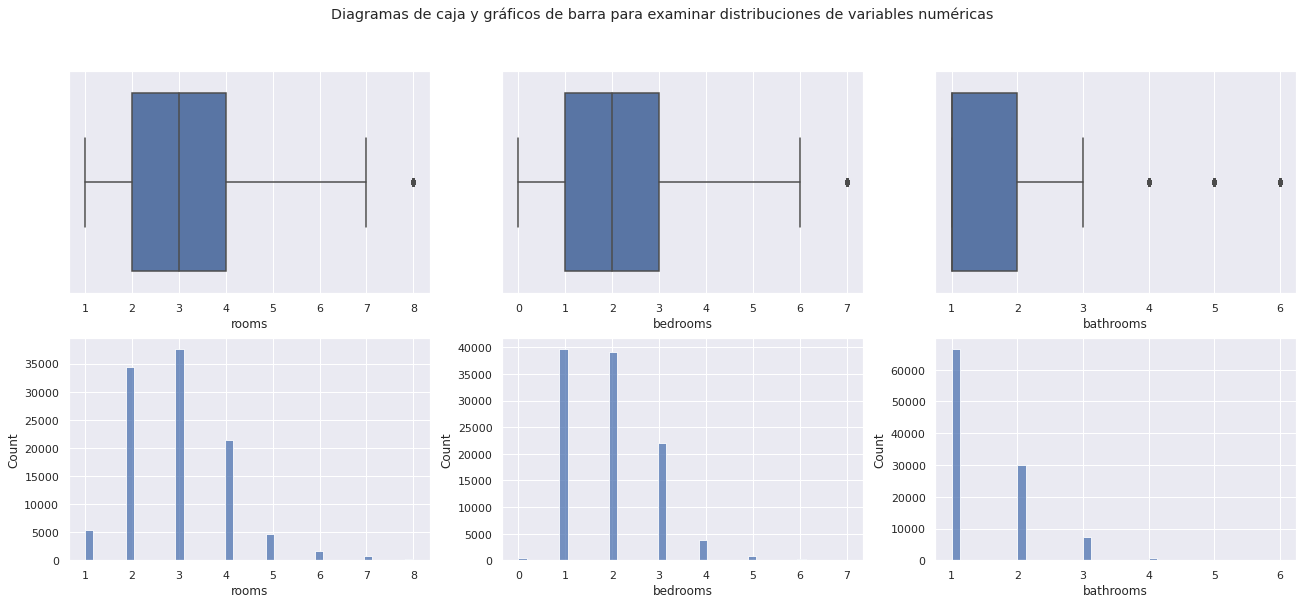

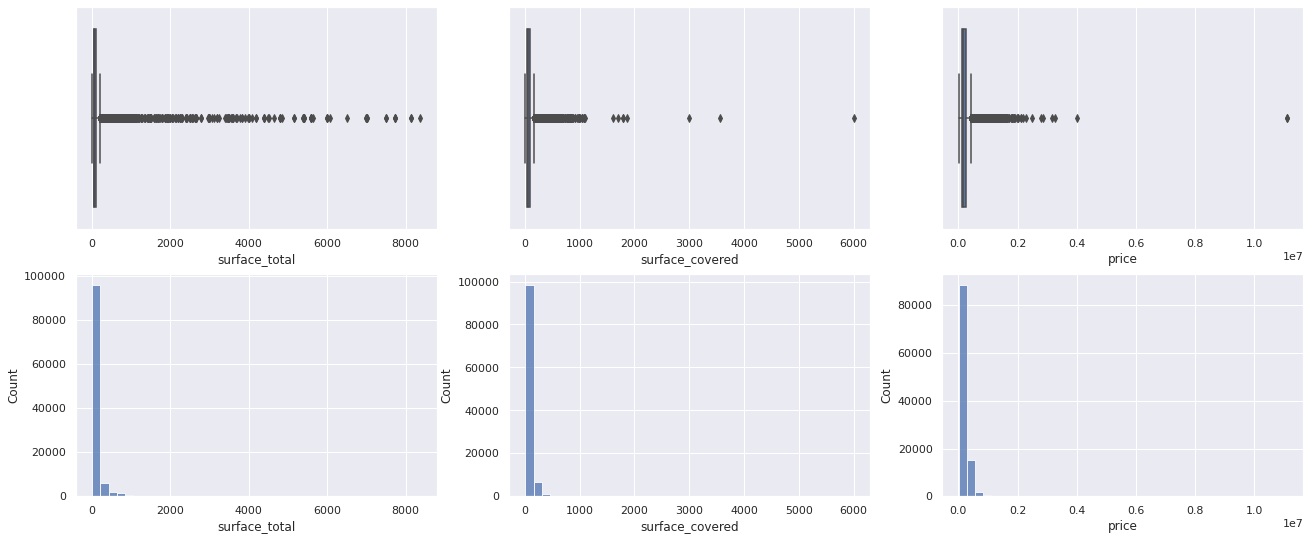

In [ ]:
fig, axs = plt.subplots(2,3,figsize=(22,9))
fig.suptitle('Diagramas de caja y gráficos de barra para examinar distribuciones de variables numéricas')
sns.boxplot(x='rooms', data=datos_numericos_filtrados1, ax=axs[0,0])
sns.boxplot(x='bedrooms', data=datos_numericos_filtrados1, ax=axs[0,1])
sns.boxplot(x='bathrooms', data=datos_numericos_filtrados1, ax=axs[0,2])
sns.histplot(datos_numericos_filtrados1['rooms'], bins = 40, ax=axs[1,0], kde=False)
sns.histplot(datos_numericos_filtrados1['bedrooms'], bins = 40, ax=axs[1,1], kde=False)
sns.histplot(datos_numericos_filtrados1['bathrooms'], bins = 40, ax=axs[1,2], kde=False)

fig, axs = plt.subplots(2,3,figsize=(22,9))
sns.boxplot(x='surface_total', data=datos_numericos_filtrados1, ax=axs[0,0])
sns.boxplot(x='surface_covered', data=datos_numericos_filtrados1, ax=axs[0,1])
sns.boxplot(x='price', data=datos_numericos_filtrados1, ax=axs[0,2])
sns.histplot(datos_numericos_filtrados1['surface_total'], bins = 40, ax=axs[1,0], kde=False)
sns.histplot(datos_numericos_filtrados1['surface_covered'], bins = 40, ax=axs[1,1], kde=False)
sns.histplot(datos_numericos_filtrados1['price'], bins = 40, ax=axs[1,2], kde=False)
plt.show()

Naturalmente, en este nuevo conjunto con valores filtrados, los estadísticos de cada variable deben cambiar: por lo que **para cada variable se detectan nuevos valores atípicos**, como se evidencia en los diagramas.

Además, los diagramas anteriores permitieron comprobar que **los filtros realizados produjeron distribuciones más compactas para las variables numéricas (lo cual favoreció notablemente la visualización de la distribución de las variables: de modo que ahora puede efectivamente percibirse en qué rangos presentan mayor densidad de datos), aunque esto es escasamente apreciable para el caso de las variables relativas al área y precio de los inmuebles**; sin embargo, debe recordarse que los límites definidos para estas variables fueron significativamente distintos de acuerdo al tipo de propiedad que se considerara para definirlos (caso contrario a lo que ocurrió con 'rooms', 'bedrooms', y 'bathrooms'). Por tanto, es de esperar que al discriminar por tipo de propiedad, dichas variables presenten distribuciones menos sesgadas positivamente, y valores atípicos más cercanos a sus medias:

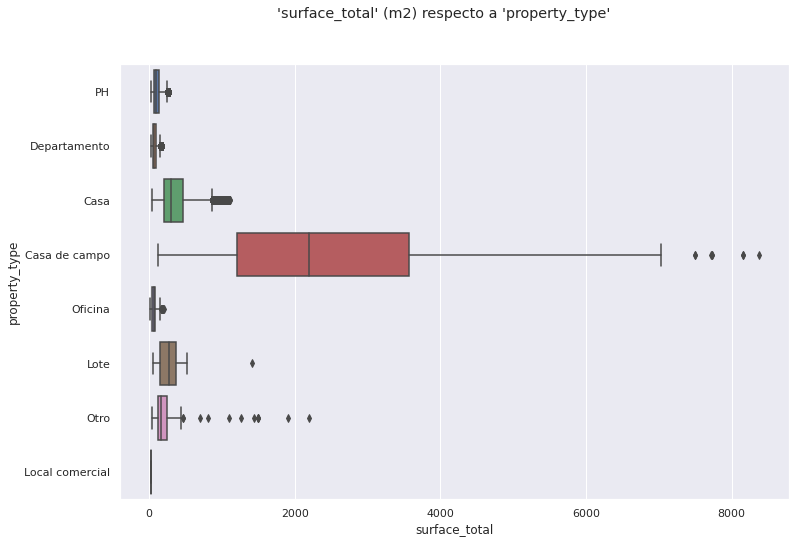

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle("'surface_total' (m2) respecto a 'property_type'")
sns.boxplot(x='surface_total', y='property_type', data=datos_properati_filtrados1)
plt.show()

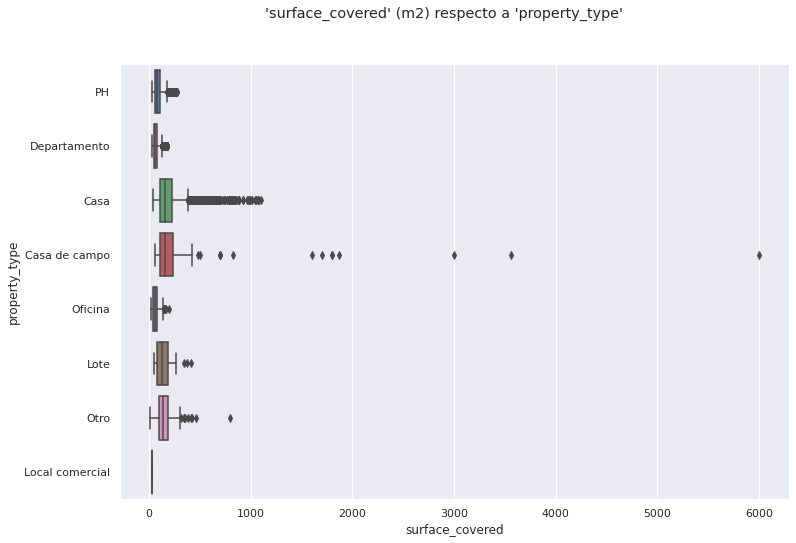

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle("'surface_covered' (m2) respecto a 'property_type'")
sns.boxplot(x='surface_covered', y='property_type', data=datos_properati_filtrados1)
plt.show()

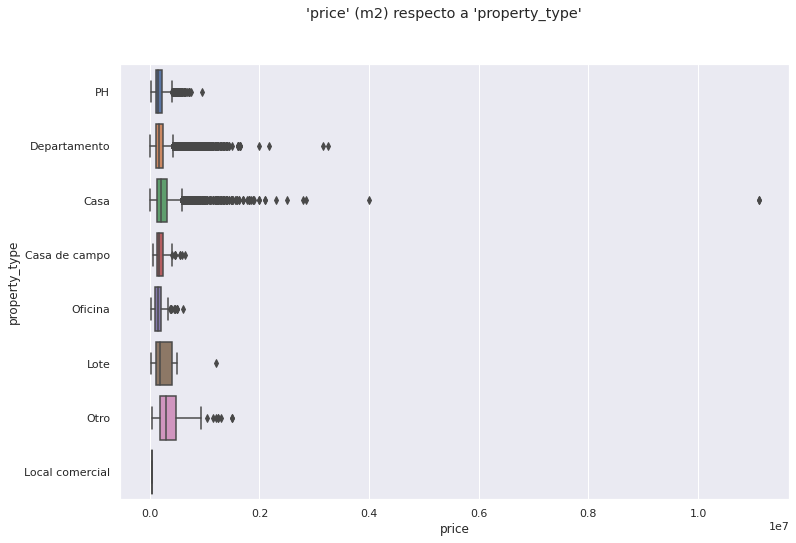

In [ ]:
plt.figure(figsize=(12,8))
plt.suptitle("'price' (m2) respecto a 'property_type'")
sns.boxplot(x='price', y='property_type', data=datos_properati_filtrados1)
plt.show()

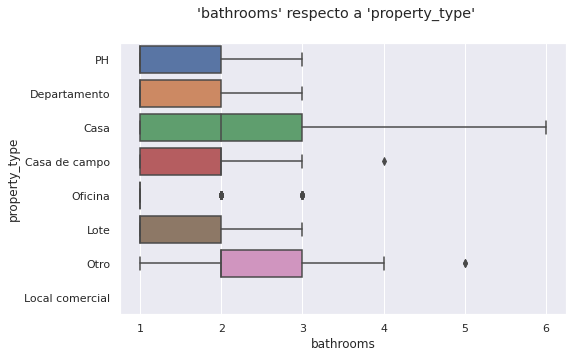

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("'bathrooms' respecto a 'property_type'")
sns.boxplot(x='bathrooms', y='property_type', data=datos_properati_filtrados1)
plt.show()

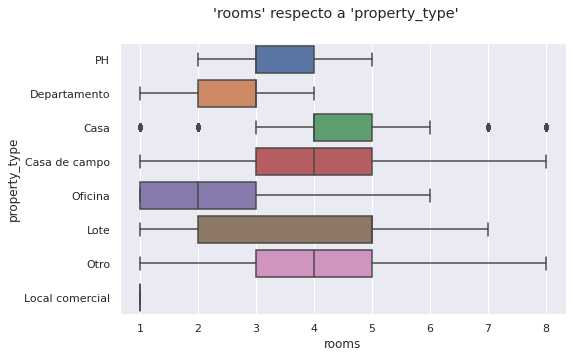

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("'rooms' respecto a 'property_type'")
sns.boxplot(x='rooms', y='property_type', data=datos_properati_filtrados1)
plt.show()

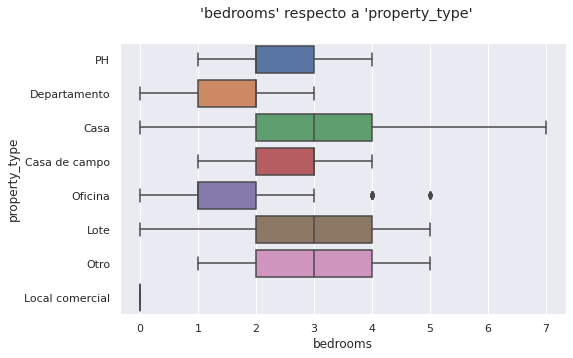

In [ ]:
plt.figure(figsize=(8,5))
plt.suptitle("'bedrooms' respecto a 'property_type'")
sns.boxplot(x='bedrooms', y='property_type', data=datos_properati_filtrados1)
plt.show()

Las gráficas anteriores demuestran **el efecto esperado de los filtros realizados: variables numéricas con distribuciones menos sesgadas, al discriminar por cada tipo de propiedad**; salvo contadas excepciones:

* a) Casas y Casas de campo con valores máximos de superficie cubierta  alejados notablemente de la media de esta variable para estos tipos de propiedad, e incluso con valores presumiblemente absurdos: como superficies cubiertas superiores a 500m2.

* b) Casas y Departamentos con valores máximos de precio alejados notablemente de la media de esta variable para estos tipos de propiedad. 

A pesar de las excepciones anteriores se sobreentiende que en términos generales **los distintos tipos de propiedad permiten asociar las características numéricas de las propiedades a determinados rangos**, incluídas entre ellas el precio. Por tanto, **queda en evidencia que el tipo de una propiedad es relevante para acotar los precios, así como para predecir otras características numéricas.**

**Los diagramas anteriores también manifiestan que los filtros descartaron total o mayoritariamente las instancias de determinados tipos de propiedad:** Cocheras, Depósitos, Locales comerciales, Lotes y Otros; lo que indica que la mayoría o la totalidad de los inmuebles de estos tipos contaban con un valor atípico en alguna característica numérica, de acuerdo a lo que pudo calcularse a partir del dataset original. Una muestra diferente, y preferiblemente mayor, de datos de estos tipos de propiedad podría incluir inmuebles con características menos dispersas; lo que podría favorecer su conservación al momento de filtrar instancias con características atípicas.

Además:


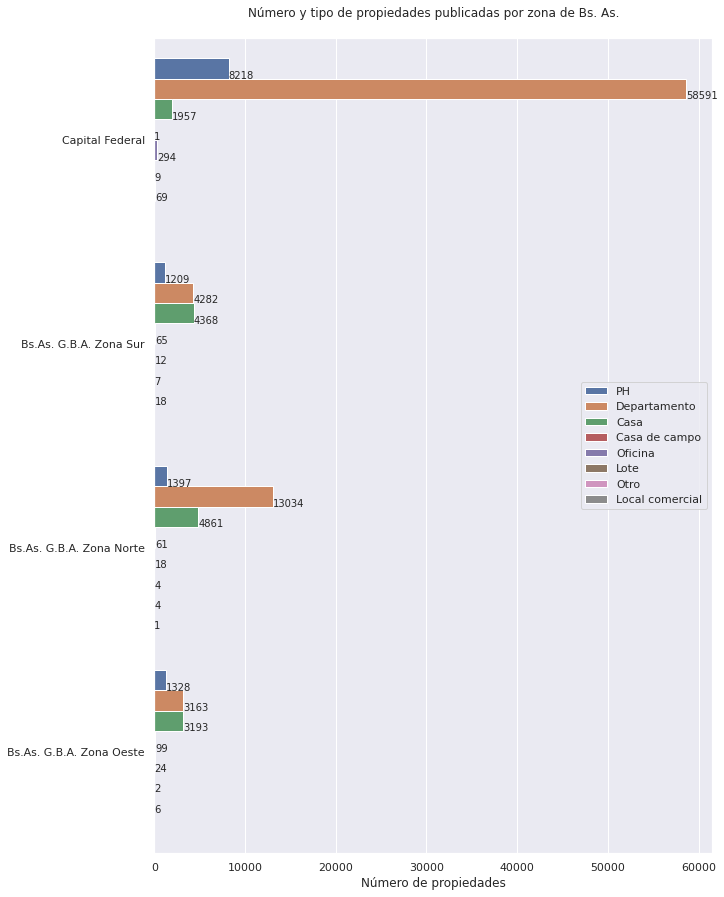

In [ ]:
import math
def show_values_on_bars2(axs, h_v="v", space=0.4):
    def _show_on_single_plot2(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                if(not(math.isnan(p.get_height()))):
                  value = int(p.get_height())
                  ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                if(not(math.isnan(p.get_width()))):
                  value = int(p.get_width())
                  ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot2(ax)
    else:
        _show_on_single_plot2(axs)

plt.figure(figsize=(10,15))

graph = sns.countplot(data = datos_properati_filtrados1, y = "l2", hue= "property_type")
show_values_on_bars2(graph, "h")
plt.xlabel('Número de propiedades')
plt.ylabel('')
plt.title('Número y tipo de propiedades publicadas por zona de Bs. As.\n')
plt.legend(loc='center right')
plt.show()

**La gráfica anterior evidencia que tras los filtros mayoritariamente se mantiene información sobre Departamentos y PHs en la Capital Federal de Bs. As.; seguida de información sobre Departamentos, Casas y PHs, distribuídas de manera más equitativa en las distintas zonas de las que se recopilaron los datos.** Lo que, nuevamente, implica que las tendencias de las características del conjunto de datos corresponderán a las tendencias asociadas a los tipos de propiedades más frecuentes; y que por esto es importante discriminar por tipo de propiedad, y ubicación, al analizar dichas tendencias.

##Correlaciones entre las variables numéricas

**Ahora, revisemos visualmente las relaciones entre las características numéricas**:


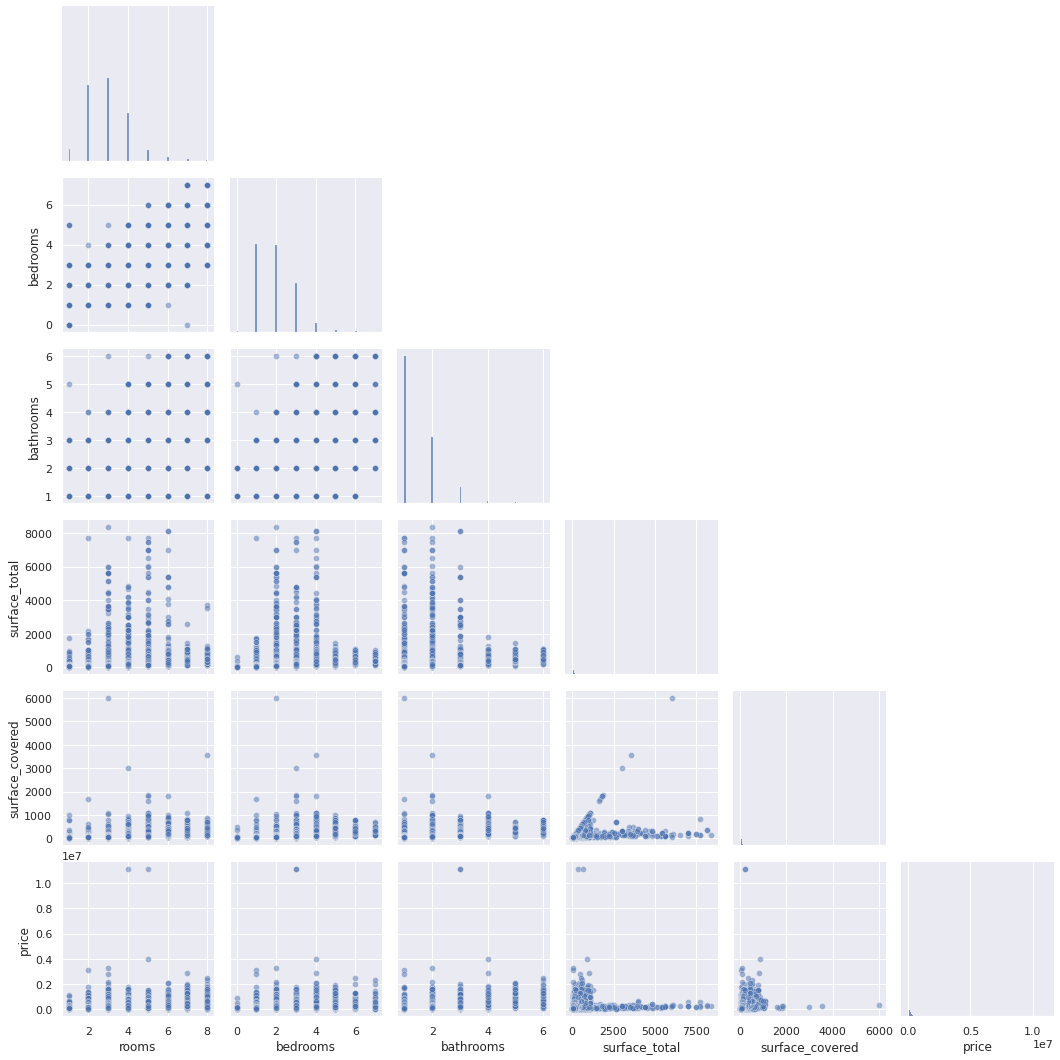

In [ ]:
sns.pairplot(data=datos_properati_filtrados1.loc[:, ('rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')], corner=True, plot_kws=dict(alpha=0.5))
plt.show()

En primera instancia, **no parece que el conjunto de datos contenga características numéricas inherentemente correlacionadas**; sin embargo, este resultado puede variar al discriminar las instancias por su tipo o ubicación:

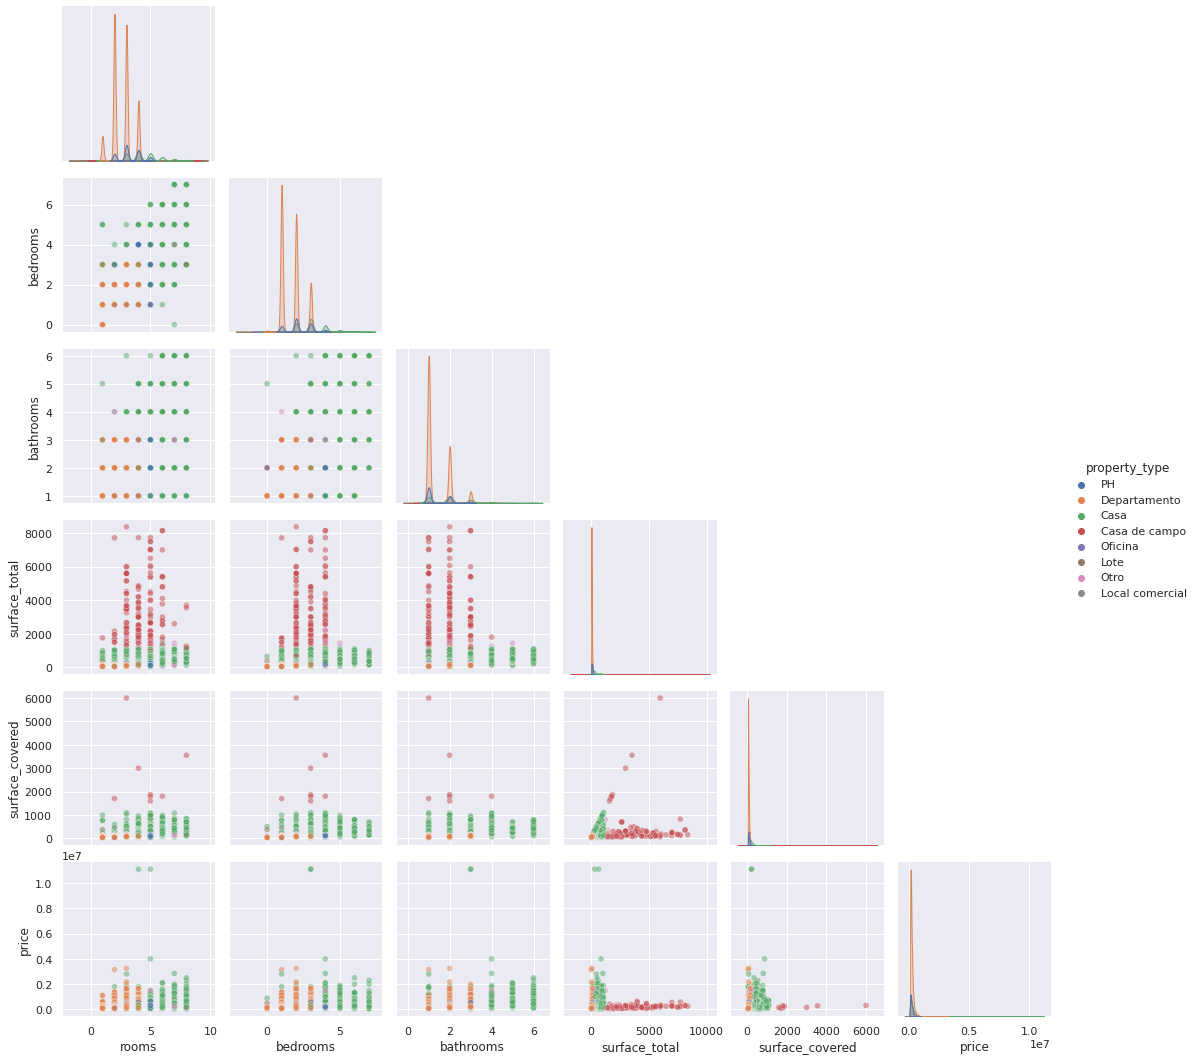

In [ ]:
sns.pairplot(data=datos_properati_filtrados1.loc[:, ('property_type', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')], corner=True, hue='property_type', plot_kws=dict(alpha=0.5))
plt.show()

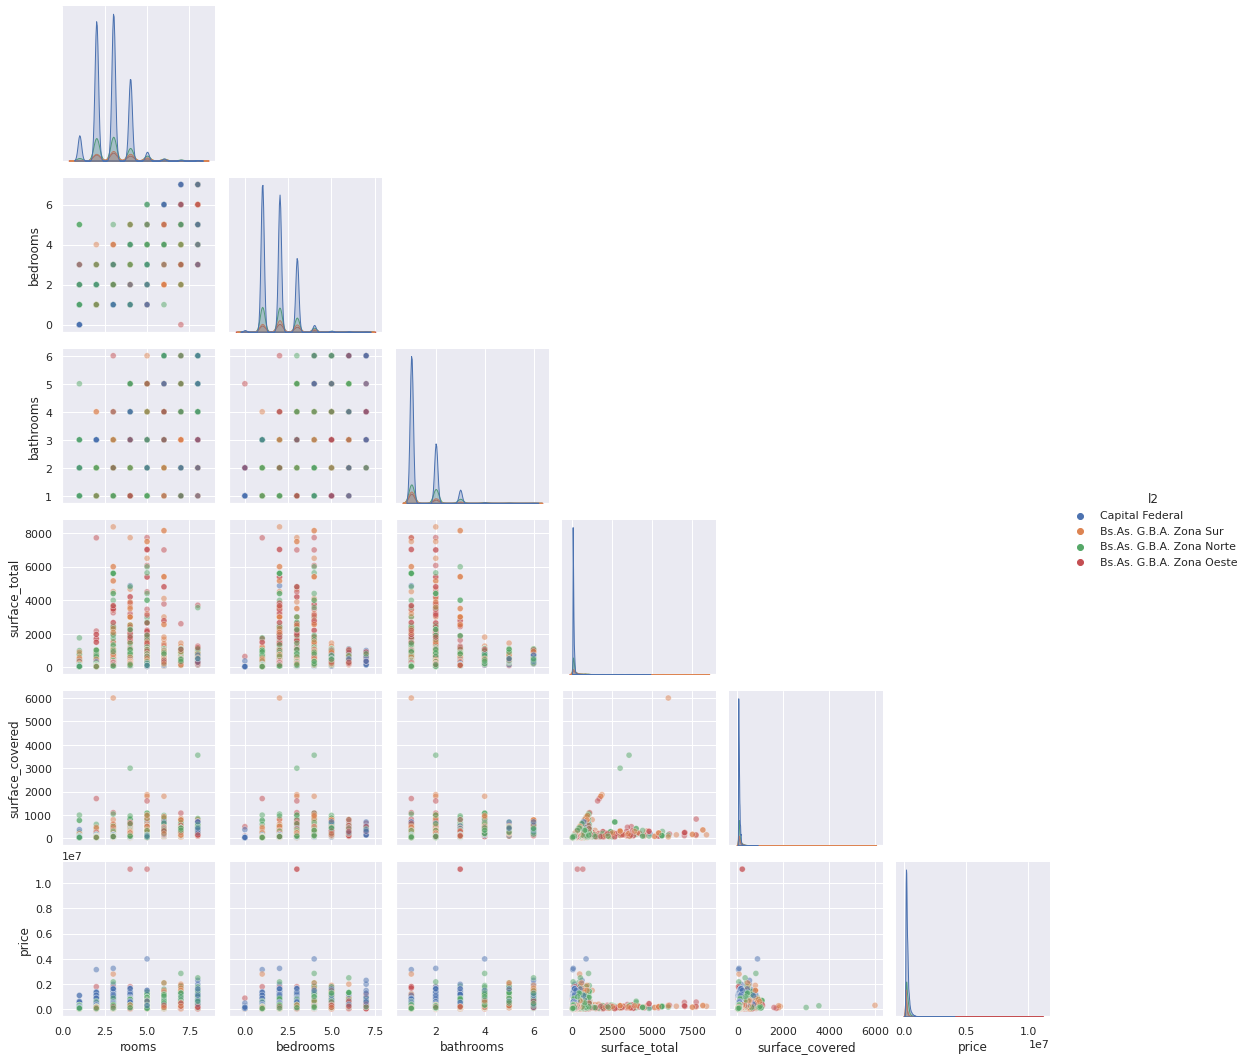

In [ ]:
sns.pairplot(data=datos_properati_filtrados1.loc[:, ('l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')], corner=True, hue='l2', plot_kws=dict(alpha=0.5))
plt.show()

En los diagramas anteriores puede percibirse que **la dispersión de los puntos obtenidos entre 2 variables numéricas distintas está principalmente sectorizada según el tipo de propiedad a la que se asocien los puntos**; y que, en ese sentido, en lo siguiente lo razonable es analizar estas dispersiones (y las relaciones entre variables que indiquen) remitiéndonos a instancias de  un tipo de propiedad a la vez.

Por otro lado, pudo percibirse que el precio atípico de algunas casas dificultan una precisa interpretación de la relación entre el precio y otras variables numéricas; y **dado que no vale la pena sesgar los siguientes análisis, y la interpretación de tendencias, por estas Casas cuyo precio se aleja diferenciablemente del grueso de precios manejados para cualquier tipo de propiedad; nos remitiremos a filtrar las casas cuyo precio sea superior a los 4000000 USD.** Aunque también se nota que hay Casas con valores altos de superficie cubierta, igualados a valores de superficie total, estos inmuebles no resultan visualmente diferenciables del resto por el momento; por lo que no se filtrarán. Por otro lado, **también pudieron reconocerse Casas de campo cuyos valores de superficie cubierta atípicamente altos se asocian a superficies totales iguales: lo que sugiere que estas variables fueron igualadas al momento de ingresar los datos para estos inmuebles** (lo cuál denotaría una incompatibilidad con la interpretación hasta el momento usada para dicha variable: es decir, con el hecho de que se considera que la superficie cubierta indica el área ocnstruída de un inmueble), **o que corresponden a inmuebles atípicos con más de 1000m2 de superficie cubierta que resultan visiblemente disgregados de los demás:** en cualquier caso, estos inmuebles dificultan la interpretación de la tendencia seguida por la superficie cubierta de las casas de campo; por tanto, también se decide filtrar aquellas Casas de campo con superficies cubiertas superiores a 1000m2 antes de continuar: 

In [ ]:
surface_covered_nulls = datos_properati.surface_covered.isnull()
surface_total_nulls = datos_properati.surface_total.isnull()
bathrooms_nulls = datos_properati.bathrooms.isnull()

surfaces_ratio_filter = datos_properati.surface_covered <= datos_properati.surface_total
departamentos_filter = (datos_properati.property_type == 'Departamento')&((datos_properati.surface_covered > 30)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['Departamento']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Departamento']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Departamento']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Departamento']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Departamento']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Departamento']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Departamento']['bedrooms']['upper_whisker'])
phs_filter = (datos_properati.property_type == 'PH')&((datos_properati.surface_covered > 30)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['PH']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['PH']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['PH']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['PH']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['PH']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['PH']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['PH']['bedrooms']['upper_whisker'])
casas_filter = (datos_properati.property_type == 'Casa')&(datos_properati.price < 4000000)&((datos_properati.surface_covered > 30)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['Casa']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Casa']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Casa']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Casa']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Casa']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Casa']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Casa']['bedrooms']['upper_whisker'])
lotes_filter = (datos_properati.property_type == 'Lote')&((datos_properati.surface_total <= vars_boxplot_info['Lote']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Lote']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Lote']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Lote']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Lote']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Lote']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Lote']['bedrooms']['upper_whisker'])
casasdecampo_filter = (datos_properati.property_type == 'Casa de campo')&((datos_properati.surface_covered < 1000)|(surface_covered_nulls))&((datos_properati.surface_total <= vars_boxplot_info['Casa de campo']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Casa de campo']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Casa de campo']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Casa de campo']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Casa de campo']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Casa de campo']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Casa de campo']['bedrooms']['upper_whisker'])
oficinas_filter = (datos_properati.property_type == 'Oficina')&((datos_properati.surface_total <= vars_boxplot_info['Oficina']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Oficina']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Oficina']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Oficina']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Oficina']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Oficina']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Oficina']['bedrooms']['upper_whisker'])
otros_filter = (datos_properati.property_type == 'Otro')&((datos_properati.surface_total <= vars_boxplot_info['Otro']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Otro']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Otro']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Otro']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Otro']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Otro']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Otro']['bedrooms']['upper_whisker'])
localescomerciales_filter = (datos_properati.property_type == 'Local comercial')&((datos_properati.surface_total <= vars_boxplot_info['Local comercial']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Local comercial']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Local comercial']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Local comercial']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Local comercial']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Local comercial']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Local comercial']['bedrooms']['upper_whisker'])
cocheras_filter = (datos_properati.property_type == 'Cochera')&((datos_properati.surface_total <= vars_boxplot_info['Cochera']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Cochera']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Cochera']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Cochera']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Cochera']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Cochera']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Cochera']['bedrooms']['upper_whisker'])
depositos_filter = (datos_properati.property_type == 'Depósito')&((datos_properati.surface_total <= vars_boxplot_info['Depósito']['surface_total']['upper_whisker'])|(surface_total_nulls))&((datos_properati.bathrooms >= vars_boxplot_info['Depósito']['bathrooms']['lower_whisker'])|(bathrooms_nulls))&((datos_properati.bathrooms <= vars_boxplot_info['Depósito']['bathrooms']['upper_whisker'])|(bathrooms_nulls))&(datos_properati.rooms >= vars_boxplot_info['Depósito']['rooms']['lower_whisker'])&(datos_properati.rooms <= vars_boxplot_info['Depósito']['rooms']['upper_whisker'])&(datos_properati.bedrooms >= vars_boxplot_info['Depósito']['bedrooms']['lower_whisker'])&(datos_properati.bedrooms <= vars_boxplot_info['Depósito']['bedrooms']['upper_whisker'])

datos_numericos_filtrados2 = datos_properati_numericos[surfaces_ratio_filter&(departamentos_filter|phs_filter|casas_filter|lotes_filter|casasdecampo_filter|oficinas_filter|otros_filter|localescomerciales_filter|cocheras_filter|depositos_filter)]
datos_properati_filtrados2 = datos_properati[surfaces_ratio_filter&(departamentos_filter|phs_filter|casas_filter|lotes_filter|casasdecampo_filter|oficinas_filter|otros_filter|localescomerciales_filter|cocheras_filter|depositos_filter)]
print("Porcentaje de instancias remanentes respecto a instancias originales: {}%, ({} instancias filtradas)\n\n".format(round((datos_numericos_filtrados2.shape[0]/datos_properati.shape[0])*100, 4), datos_properati.shape[0]-datos_numericos_filtrados2.shape[0]))
round(datos_numericos_filtrados2.describe(), 4)

Porcentaje de instancias remanentes respecto a instancias originales: 72.4697%, (40376 instancias filtradas)




rooms     bedrooms  ...  surface_covered         price
count  106284.0000  106284.0000  ...      106284.0000  1.062840e+05
mean        2.9530       1.9292  ...          81.2509  1.993412e+05
std         1.1054       0.9169  ...          59.6501  1.386682e+05
min         1.0000       0.0000  ...          10.0000  7.500000e+03
25%         2.0000       1.0000  ...          47.0000  1.150000e+05
50%         3.0000       2.0000  ...          64.0000  1.620000e+05
75%         4.0000       3.0000  ...          93.0000  2.400000e+05
max         8.0000       7.0000  ...        1100.0000  3.249900e+06

[8 rows x 6 columns]

Luego del último filtro, el conjunto de datos mantiene el 71.4544% de instancias respecto a las instancias originales; una porporción similar a la obtenida con el primer filtro realizado a los datos (71.4612%) que evidencia que el segundo filtro se limitó a remover instancias con valores atípicos que no se identificaron previamente. La cantidad de instancias eliminadas, respecto a las que se tenían con el primer filtro, pueden identificarse mejor en la siguiente tabla:

In [ ]:
#datos_properati_aux = datos_properati.loc[:, ('property_type', 'bathrooms', 'surface_total', 'surface_covered')]
proporcionesxtipofiltro = {}
proporcionesxtipofiltro['Property type'] = list(datos_properati_filtrados2['property_type'].value_counts().keys())
proporcionesxtipofiltro['current # of instances'] = list(datos_properati_filtrados2['property_type'].value_counts())
proporcionesxtipofiltro['# of instances after filter 1'] = list(datos_properati_filtrados1['property_type'].value_counts())

print("Cantidad de instancias por Tipo de propiedad en dataframes filtrados:\n")
pd.set_option('display.max_columns', None)
display(pd.DataFrame(proporcionesxtipofiltro))

Cantidad de instancias por Tipo de propiedad en dataframes filtrados:



Property type  current # of instances  # of instances after filter 1
0     Departamento                   79070                          79070
1             Casa                   14376                          14379
2               PH                   12152                          12152
3          Oficina                     348                            348
4    Casa de campo                     218                            226
5             Otro                      97                             97
6             Lote                      22                             22
7  Local comercial                       1                              1

En conslusión: **mediante el segundo filtro fueron descartadas 3 Casas y 8 Casas de campo.** 

Ahora, **se continuarán analizando las relaciones de a pares entre las variables numéricas, pero remitiéndonos a un tipo de propiedad a la vez; de acuerdo a lo que se concluyó razonable anterioremente.**

Para minimizar la visualización de ruido, mientras se evita generalizar sobre tendencias marcadas por pocos puntos, **se analizarán de manera preliminar las instancias de los tipos de propiedad cuyas frecuencias son más cercanas a la mediana: PHs, Oficinas y Casas de Campo.** Adicionalmente, se volverán a discriminar los puntos según la zona de Buenos Aires a la que se asocian, buscando evidenciar la posible influencia de esta última variable sobre su dispersión.

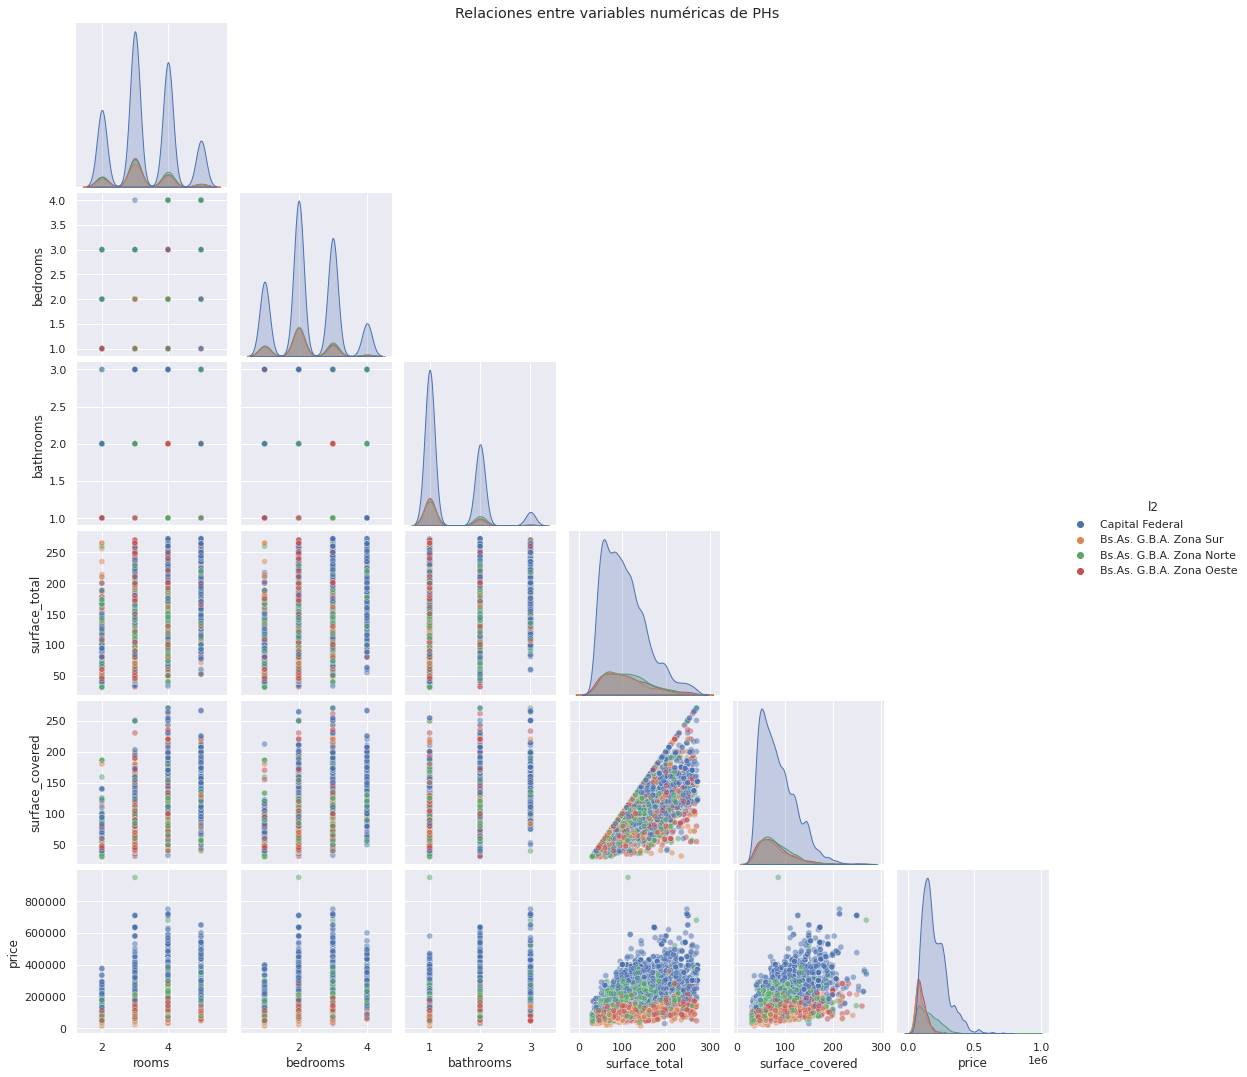

In [ ]:
dptos_filter_new = datos_properati_filtrados2.property_type == 'PH'
g = sns.pairplot(data=datos_properati_filtrados2.loc[dptos_filter_new, ('l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')], corner=True, hue='l2', plot_kws=dict(alpha=0.5))
g.fig.suptitle("Relaciones entre variables numéricas de PHs", y=1)
plt.show()

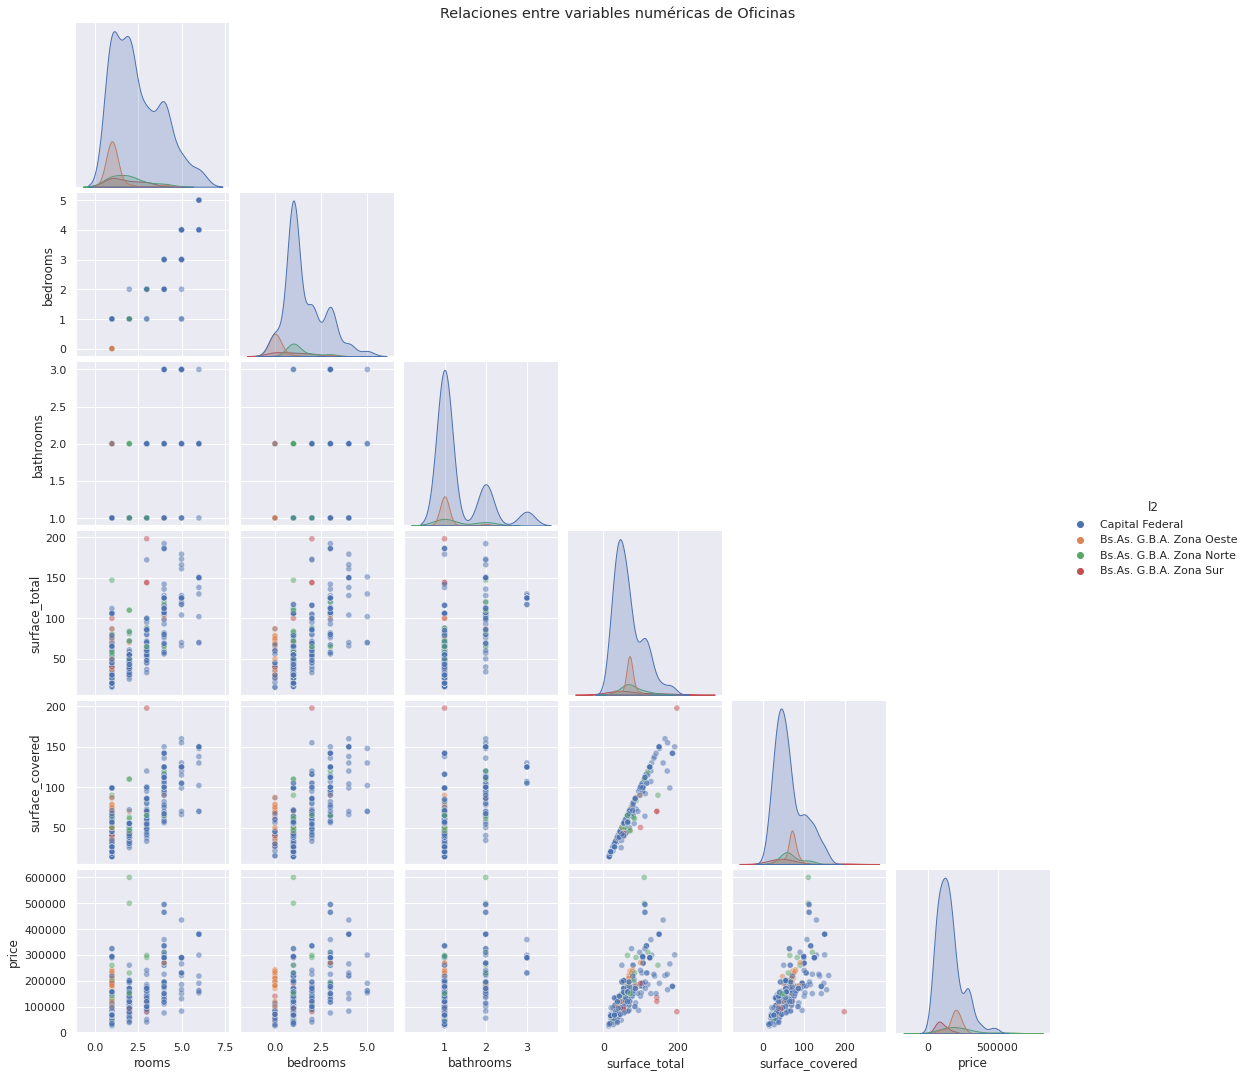

In [ ]:
dptos_filter_new = datos_properati_filtrados2.property_type == 'Oficina'
g = sns.pairplot(data=datos_properati_filtrados2.loc[dptos_filter_new, ('l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')], corner=True, hue='l2', plot_kws=dict(alpha=0.5))
g.fig.suptitle("Relaciones entre variables numéricas de Oficinas", y=1)
plt.show()

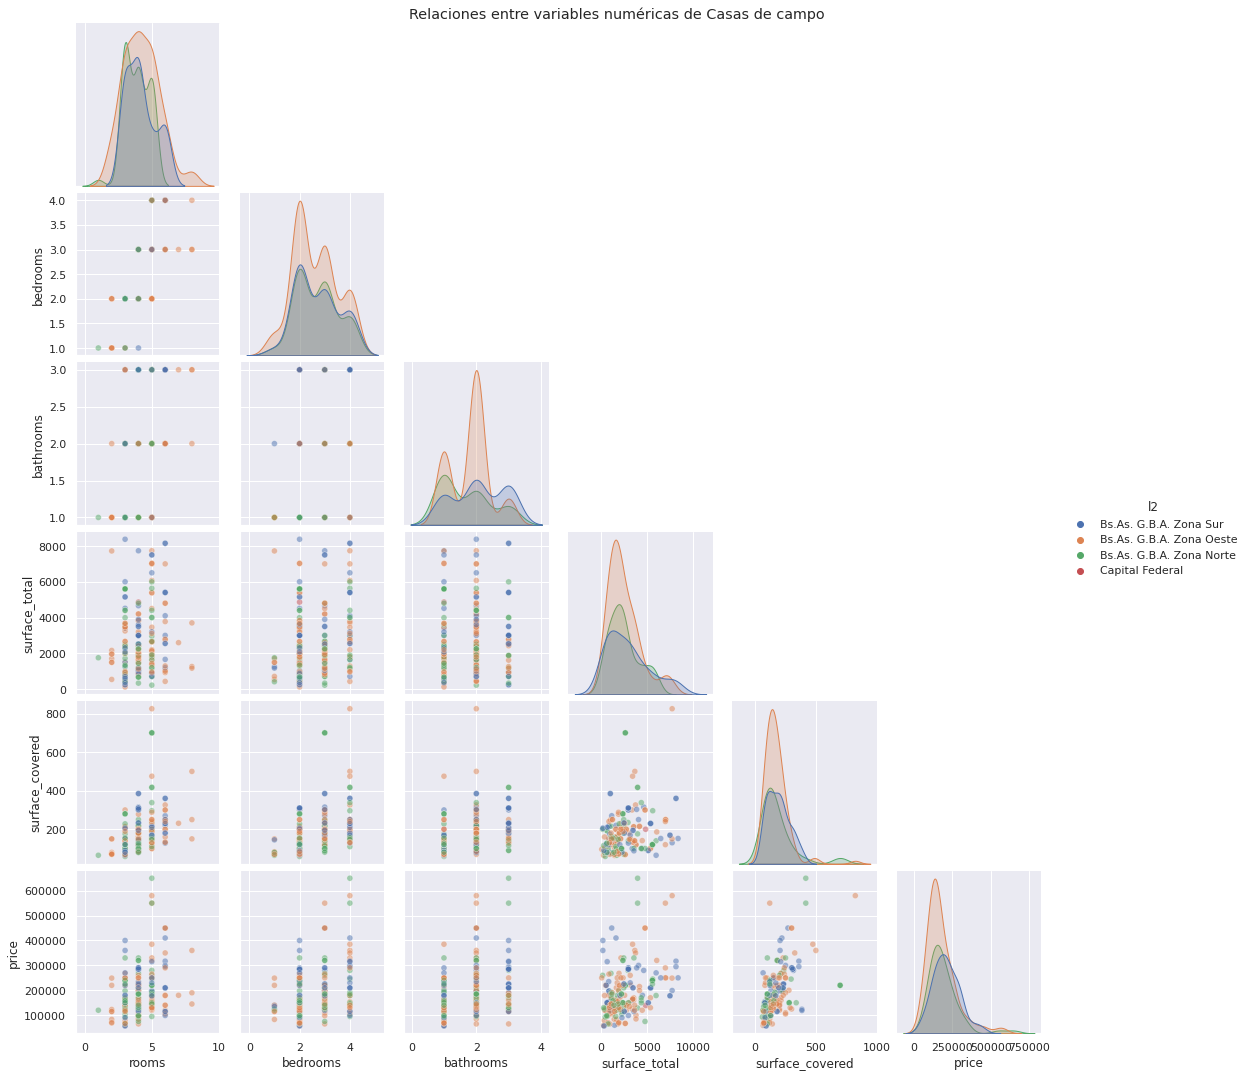

In [ ]:
dptos_filter_new = datos_properati_filtrados2.property_type == 'Casa de campo'
g = sns.pairplot(data=datos_properati_filtrados2.loc[dptos_filter_new, ('l2', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price')], corner=True, hue='l2', plot_kws=dict(alpha=0.5))
g.fig.suptitle("Relaciones entre variables numéricas de Casas de campo", y=1)
plt.show()

A partir de los diagramas anteriores se entiende que...

De acuerdo al diagrama "Relaciones entre variables numéricas de PHs":

* **Es evidente que los precios de PHs, dependiendo de su ubicación, se asocian a distinta varianza y media: siendos estas aparentemente menores para las PHs en las zonas Sur y Oeste de G.B.A.** Así, es probable que el considerar de manera más específica la ubicación de una propiedad permita acotar aún más estos estadísticos; y relacionar de manera más precisa sus precios con sus características numéricas.

* **Se percibe una relación proporcional creciente entre los precios y las variables relativas al área de las PHs**; especialmente entre las instancias con menores áreas cubiertas y totales.

De acuerdo al diagrama "Relaciones entre variables numéricas de Oficinas":

* Cerca del 85% de las Oficinas en el conjunto de datos se ubican en la Capital. **Se pueden apreciar tendencias lineales directas negligiblemente dispersas entre varias de las variables numéricas de este tipo de propiedad: como entre las variables relativas al área de las propiedades (superficie total, y superficie cubierta), entre habitaciones y dormitorios; y más importante aún, entre precios y áreas.**

De acuerdo al diagrama "Relaciones entre variables numéricas de Casas de campo":

* Al contrario de lo visto con las Oficinas, casi la totalidad de las Casas de campo del conjunto de datos se ubican fuera de la Capital; y se distribuyen de manera más balanceada en las distintas zonas de G.B.A. **Aunque se pueden notar tendencias directamente proporcionales entre algunas de las características numéricas de este tipo de propiedad; como entre dormitorios y habitaciones; o entre superficie cubierta y precio, en general las tendencias seguidas por los demás pares de variables numéricas no resultan visualmente evidentes por su alta dispersión.**

**En conclusión, en la mayoría de los casos no pudieron reconocerse tendencias evidentes entre dos características numéricas. Sin embargo, sí resulta evidente la diferencia entre las dispersiones seguidas por un mismo par de características numéricas para distintos tipos de inmuebles; esto reafirma que el tipo de una propiedad es relevante para prever la tendencia y dispersión entre algunas características numéricas. Esto mismo puede argumentarse respecto a la zona de ubicación en G.B.A. de las distintas propiedades**; pues pudo reconocerse en el caso de PHs, que la ubicación de una propiedad afecta la pendiente y dispersión de la tendencia lineal de los precios, respecto a sus superficies totales y cubiertas; a diferencia de lo percibido para los otros tipos de propiedad evaluadas.

**Para ganar claridad sobre la relevancia de la ubicación para configurar las tendencias de los precios de los distintos tipos de propiedad, podemos también considerar los siguientes diagramas en los que sólo se grafican instancias de un tipo de propiedad y zona de G.B.A. a la vez:**


	Distribución de precios respecto a otras variables numéricas, para inmuebles en G.B.A. Zona Oeste




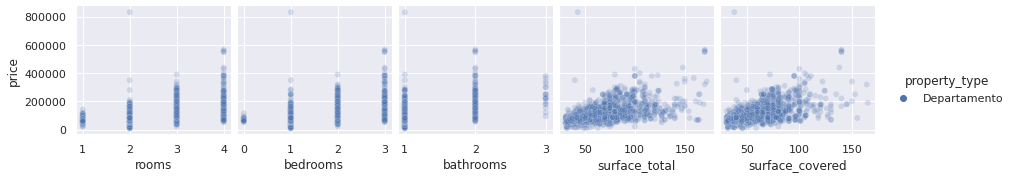

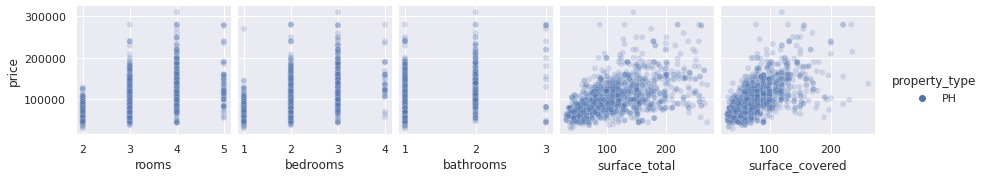

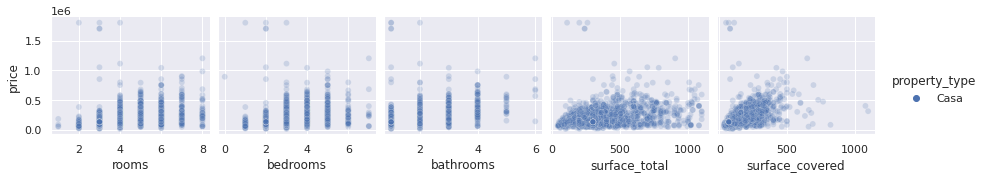

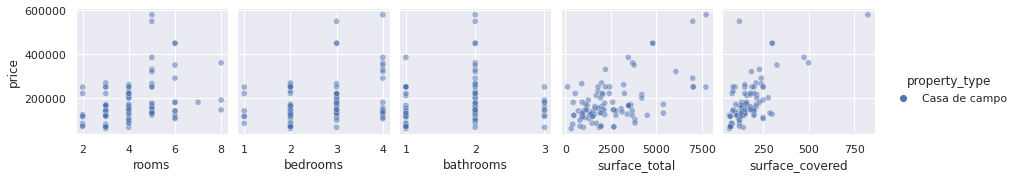

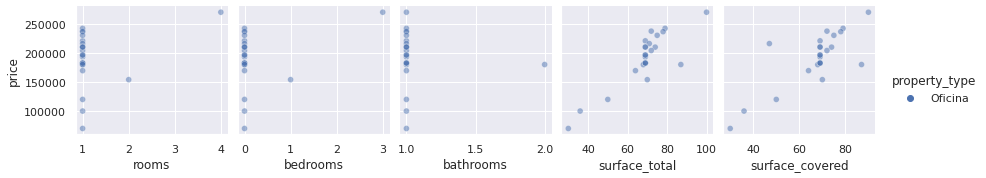

In [ ]:
zona_oeste_filter = datos_properati_filtrados2.l2 == 'Bs.As. G.B.A. Zona Oeste'
zona_norte_filter = datos_properati_filtrados2.l2 == 'Bs.As. G.B.A. Zona Norte'
zona_sur_filter = datos_properati_filtrados2.l2 == 'Bs.As. G.B.A. Zona Sur'
capital_fed_filter = datos_properati_filtrados2.l2 == 'Capital Federal'
dptos_filter_new = datos_properati_filtrados2.property_type == 'Departamento'
phs_filter_new = datos_properati_filtrados2.property_type == 'PH'
casa_filter_new = datos_properati_filtrados2.property_type == 'Casa'
cdc_filter_new = datos_properati_filtrados2.property_type == 'Casa de campo'
oficina_filter_new = datos_properati_filtrados2.property_type == 'Oficina'
otro_filter_new = datos_properati_filtrados2.property_type == 'Otro'
lote_filter_new = datos_properati_filtrados2.property_type == 'Lote'

print("\n\tDistribución de precios respecto a otras variables numéricas, para inmuebles en G.B.A. Zona Oeste\n\n")
sns.pairplot(data=datos_properati_filtrados2[zona_oeste_filter & dptos_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[zona_oeste_filter & phs_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[zona_oeste_filter & casa_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[zona_oeste_filter & cdc_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.5))
sns.pairplot(data=datos_properati_filtrados2[zona_oeste_filter & oficina_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.5))
plt.show()


	Distribución de precios respecto a otras variables numéricas, para inmuebles en la Capital Federal




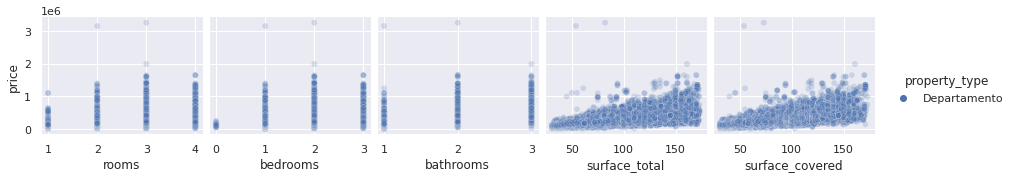

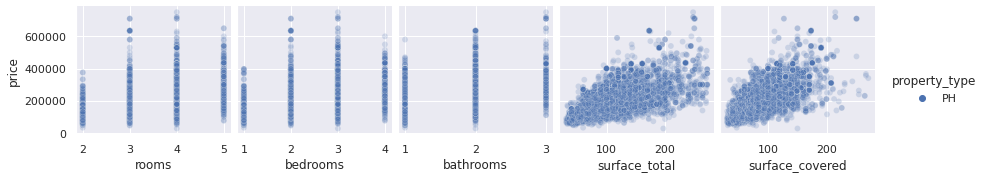

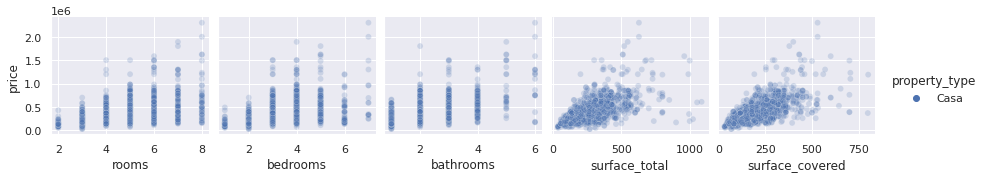

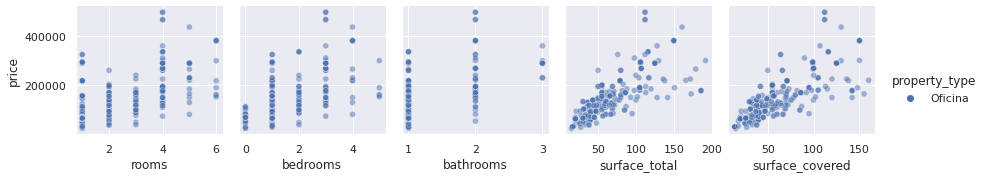

In [ ]:
print("\n\tDistribución de precios respecto a otras variables numéricas, para inmuebles en la Capital Federal\n\n")
sns.pairplot(data=datos_properati_filtrados2[capital_fed_filter & dptos_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[capital_fed_filter & phs_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[capital_fed_filter & casa_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[capital_fed_filter & oficina_filter_new], x_vars=['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], y_vars='price', hue='property_type', plot_kws=dict(alpha=0.5))
plt.show()

Los diagramas anteriores dan cuenta de cómo puede reconocerse una relación directamente proporcional menos dispersa entre los precios de los inmuebles, y sus distintas características numéricas, a medida que nos fijamos en su Tipo y zona de ubicación específica (lo que es especialmente evidente para Oficinas y Departamentos). En general, se reconocen relaciones directamente proporcionales entre el precio y las demás variables numéricas: especialmente con las variables relativas a las superficies. **Esto sugiere que el modelo a desarrollar debe considerar las características categóricas de los inmuebles antes de estimar su precio de venta a partir de sus características numéricas.**

Por otro lado, el siguiente diagrama, en que se presentan las distribuciones de precio de Departamentos (por ser este el tipo de propiedad más abundante en el conjunto de datos), en distintos barrios de la capital Federal, también permite argumentar que ganar especificidad sobre la ubicación de una propiedad ayuda a acotar el rango y dispersión de su precio de venta:

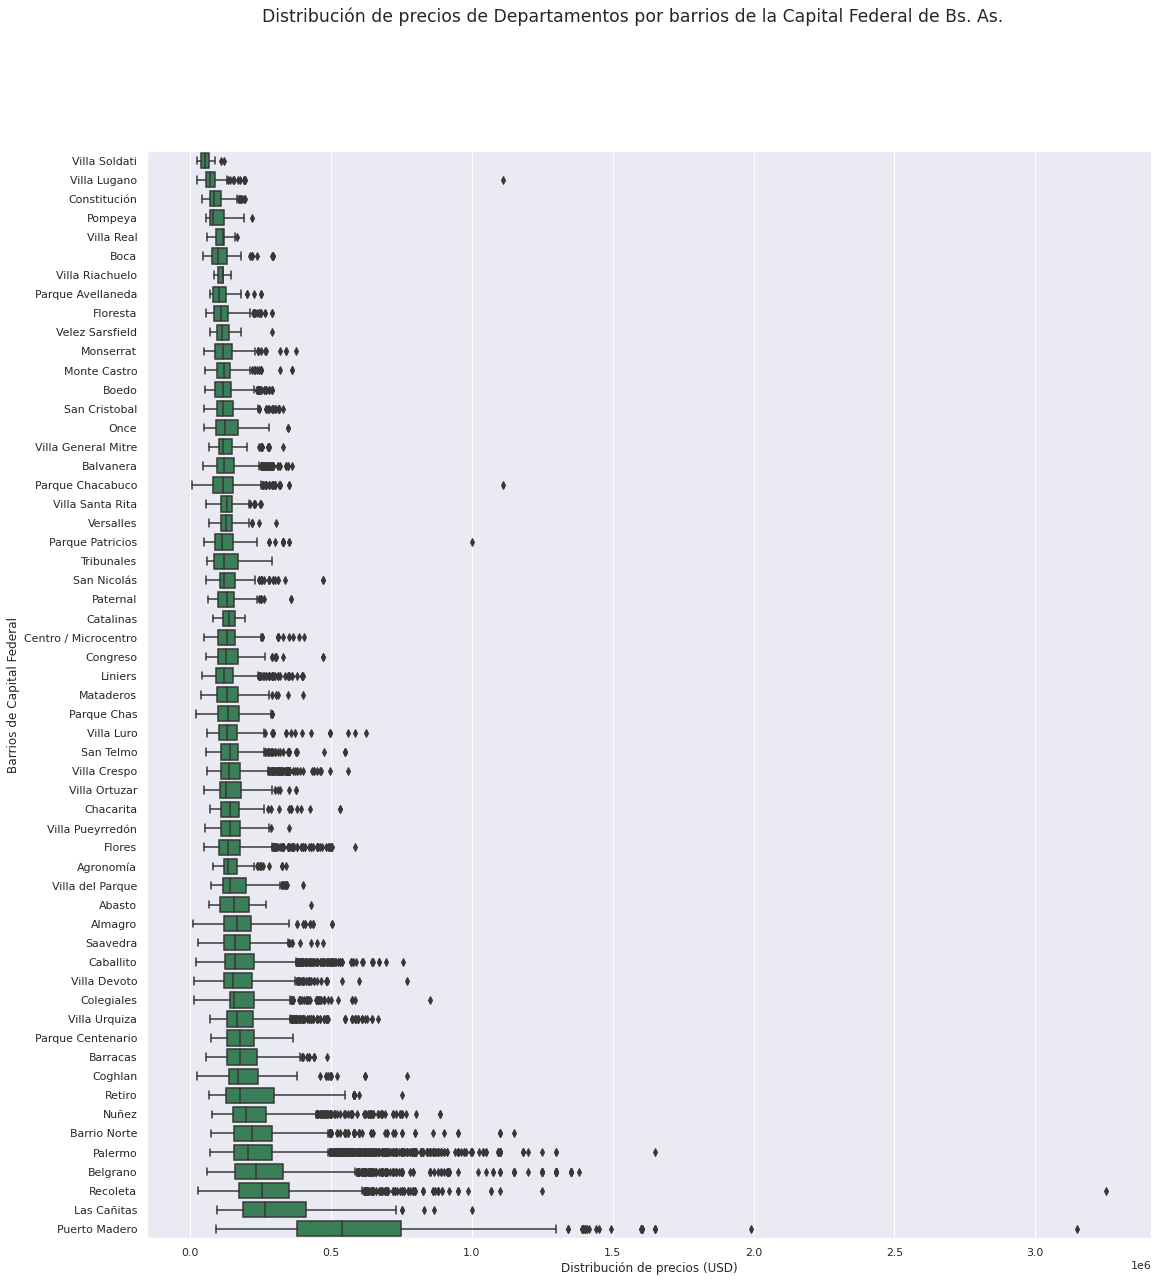

In [ ]:
datos_filtrados__dptos_capital = datos_properati_filtrados2[(datos_properati_filtrados2['l2'] == 'Capital Federal') & (datos_properati_filtrados2['property_type'] == 'Departamento')]
conteoyprecio2 = {}
conteoyprecio2['Barrio'] = list(datos_filtrados__dptos_capital['l3'].value_counts().keys())
conteoyprecio2['# de instancias'] = list(datos_filtrados__dptos_capital['l3'].value_counts())
conteoyprecio2['~Precio'] = list(datos_filtrados__dptos_capital['l3'].value_counts()) #Only for inizialization
prices_mean = datos_filtrados__dptos_capital.groupby(["l3"]).mean()['price']
for i, fila in enumerate(conteoyprecio2['Barrio']):
  conteoyprecio2['~Precio'][i] = round(prices_mean[conteoyprecio2['Barrio'][i]], 4)
df_conteoyprecio2 = pd.DataFrame(conteoyprecio2).sort_values('~Precio', ignore_index=True)

plt.figure(figsize=(18,20))
plt.suptitle("Distribución de precios de Departamentos por barrios de la Capital Federal de Bs. As.", fontsize='x-large')
ax = sns.boxplot(x='price', y ='l3', order=list(df_conteoyprecio2.Barrio), data=datos_filtrados__dptos_capital, color='seagreen')
ax.set_xlabel('Distribución de precios (USD)')
ax.set_ylabel('Barrios de Capital Federal')
plt.show()

Ahora, ya que detectamos relaciones crecientes entre el precio de los inmuebles y demás características numéricas de los mismos, evaluemos el coeficiente de correlación de Spearman entre ellas. Esto nos permitirá determinar qué variables muestran una mayor relación directamente proporcional con el precio. **Primero, se presentarán estas correlaciones discriminadas sólo por tipo de propiedad, y luego se presentarán de acuerdo a ubicaciones específicas...**

In [ ]:
def draw_heatmap_pearson(data, mask, axis, labelname):
  '''
  Dado un dataframe, y una máscara para las instancias del mismo, se grafica un
  mapa de calor de sus correlaciones de Pearson en el eje de matplot especificado, 
  al cual se le asigna como título: "Mapa de correlaciones de variables numéricas \n 
  filtradas por " + el terminal del título asignado.
  
  Argumentos:
  data: Dataframe con variables numéricas a relacionar según el coeficiente de 
  correlación de Pearson.
  mask: Máscara a aplicar a las instancias del dataframe, antes de calcular la 
  correlación de sus variables numéricas.
  axis: eje de matplot para ubicar el mapa generado por la función.
  labelname: terminal del título de la gráfica. El inicio del título es:
  "Mapa de correlaciones de variables numéricas \n filtradas por ".
  '''
  g = sns.heatmap(data[mask].corr(method='pearson'), square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
            xticklabels= data.columns, yticklabels= data.columns, cmap="PRGn", vmin=-1, vmax=1, ax=axis)

  g.set_xticklabels(g.get_xticklabels(), rotation = 45)
  g.set_yticklabels(g.get_yticklabels(), rotation = 45)
  axis.set(title = "Mapa de correlaciones de variables numéricas \n filtradas por " + str(labelname) + "\n")

def draw_heatmap_spearman(data, mask, axis, labelname):
  '''
  Dado un dataframe, y una máscara para las instancias del mismo, se grafica un
  mapa de calor de sus correlaciones de Spearman en el eje de matplot especificado, 
  al cual se le asigna como título: "Mapa de correlaciones de variables numéricas \n 
  filtradas por " + el terminal del título asignado.
  
  Argumentos:
  data: Dataframe con variables numéricas a relacionar según el coeficiente de 
  correlación de Pearson.
  mask: Máscara a aplicar a las instancias del dataframe, antes de calcular la 
  correlación de sus variables numéricas.
  axis: eje de matplot para ubicar el mapa generado por la función.
  labelname: terminal del título de la gráfica. El inicio del título es:
  "Mapa de correlaciones de variables numéricas \n filtradas por ".
  '''
  g = sns.heatmap(data[mask].corr(method='spearman'), square = True, annot=True, fmt= '.2f', annot_kws={'size': 15},
            xticklabels= data.columns, yticklabels= data.columns, cmap="PRGn", vmin=-1, vmax=1, ax=axis)

  g.set_xticklabels(g.get_xticklabels(), rotation = 45)
  g.set_yticklabels(g.get_yticklabels(), rotation = 45)
  axis.set(title = "Mapa de correlaciones de variables numéricas \n filtradas por " + str(labelname) + "\n")

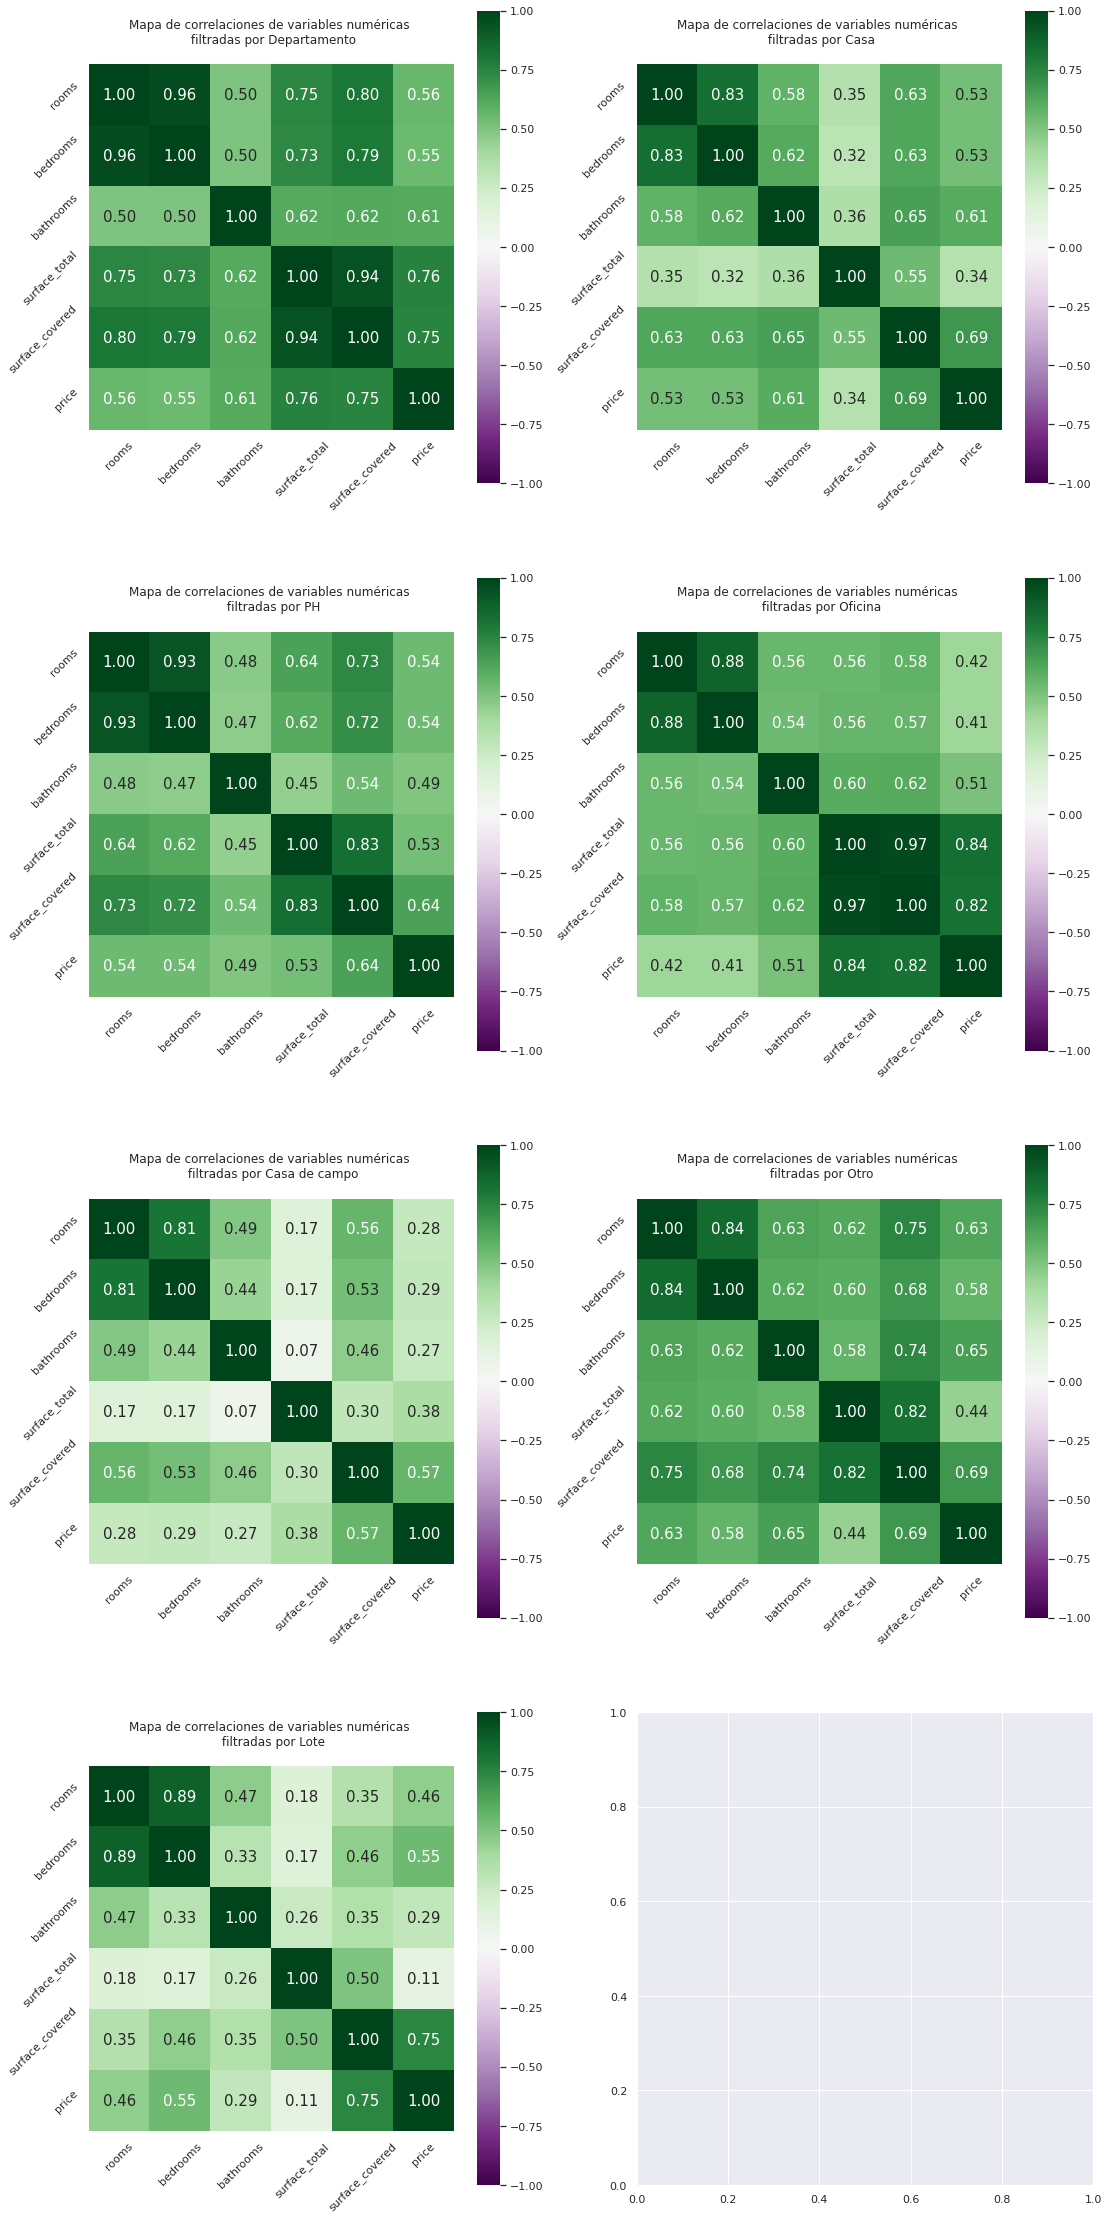

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(18,40))

draw_heatmap_spearman(datos_numericos_filtrados2, dptos_filter_new, axs[0,0], 'Departamento')
draw_heatmap_spearman(datos_numericos_filtrados2, casa_filter_new, axs[0,1], 'Casa')
draw_heatmap_spearman(datos_numericos_filtrados2, phs_filter_new, axs[1,0], 'PH')
draw_heatmap_spearman(datos_numericos_filtrados2, oficina_filter_new, axs[1,1], 'Oficina')
draw_heatmap_spearman(datos_numericos_filtrados2, cdc_filter_new, axs[2,0], 'Casa de campo')
draw_heatmap_spearman(datos_numericos_filtrados2, otro_filter_new, axs[2,1], 'Otro')
draw_heatmap_spearman(datos_numericos_filtrados2, lote_filter_new, axs[3,0], 'Lote')

plt.show()

En esta primera revisión de los coeficientes de correlación de Spearman entre las variables numéricas, en general, se nota que **el precio de venta de un inmueble se correlaciona mayormente con la superficie cubierta y total. La siguiente variable que más directamente crece junto con el precio es baños.** También se encuentra que, **por último, el precio mantiene correlaciones proporcionales similares para con habitaciones y dormitorios; y que, estas 2 características numéricas están altamente correlacionadas entre sí para todos los tipos de propiedad (el menor coeficiente de correlación entre estas variables se encontró en el caso de Casas de campo, y era de 0.81)**: lo que puede entenderse desde que la cantidad de ambientes/habitaciones de un inmueble, incluye su cantidad de dormitorios, para propiedades en Argentina: por lo que **se concibe que solo es necesario considerar una de las 2 características (habitaciones o dormitorios) para intentar estimar el precio de venta de una propiedad.**

Ahora, **grafiquemos nuevamente estas correlaciones remitiéndonos a propiedades en zonas de G.B.A. específicas.** Preliminarmente, sólo se revisarán propiedades de la Zona Norte y la Zona Sur de G.B.A., dado que en estas zonas, las propiedades se distribuyen de manera más balanceada que en la Capital Federal; y se asocian a más instancias que la Zona Oeste:

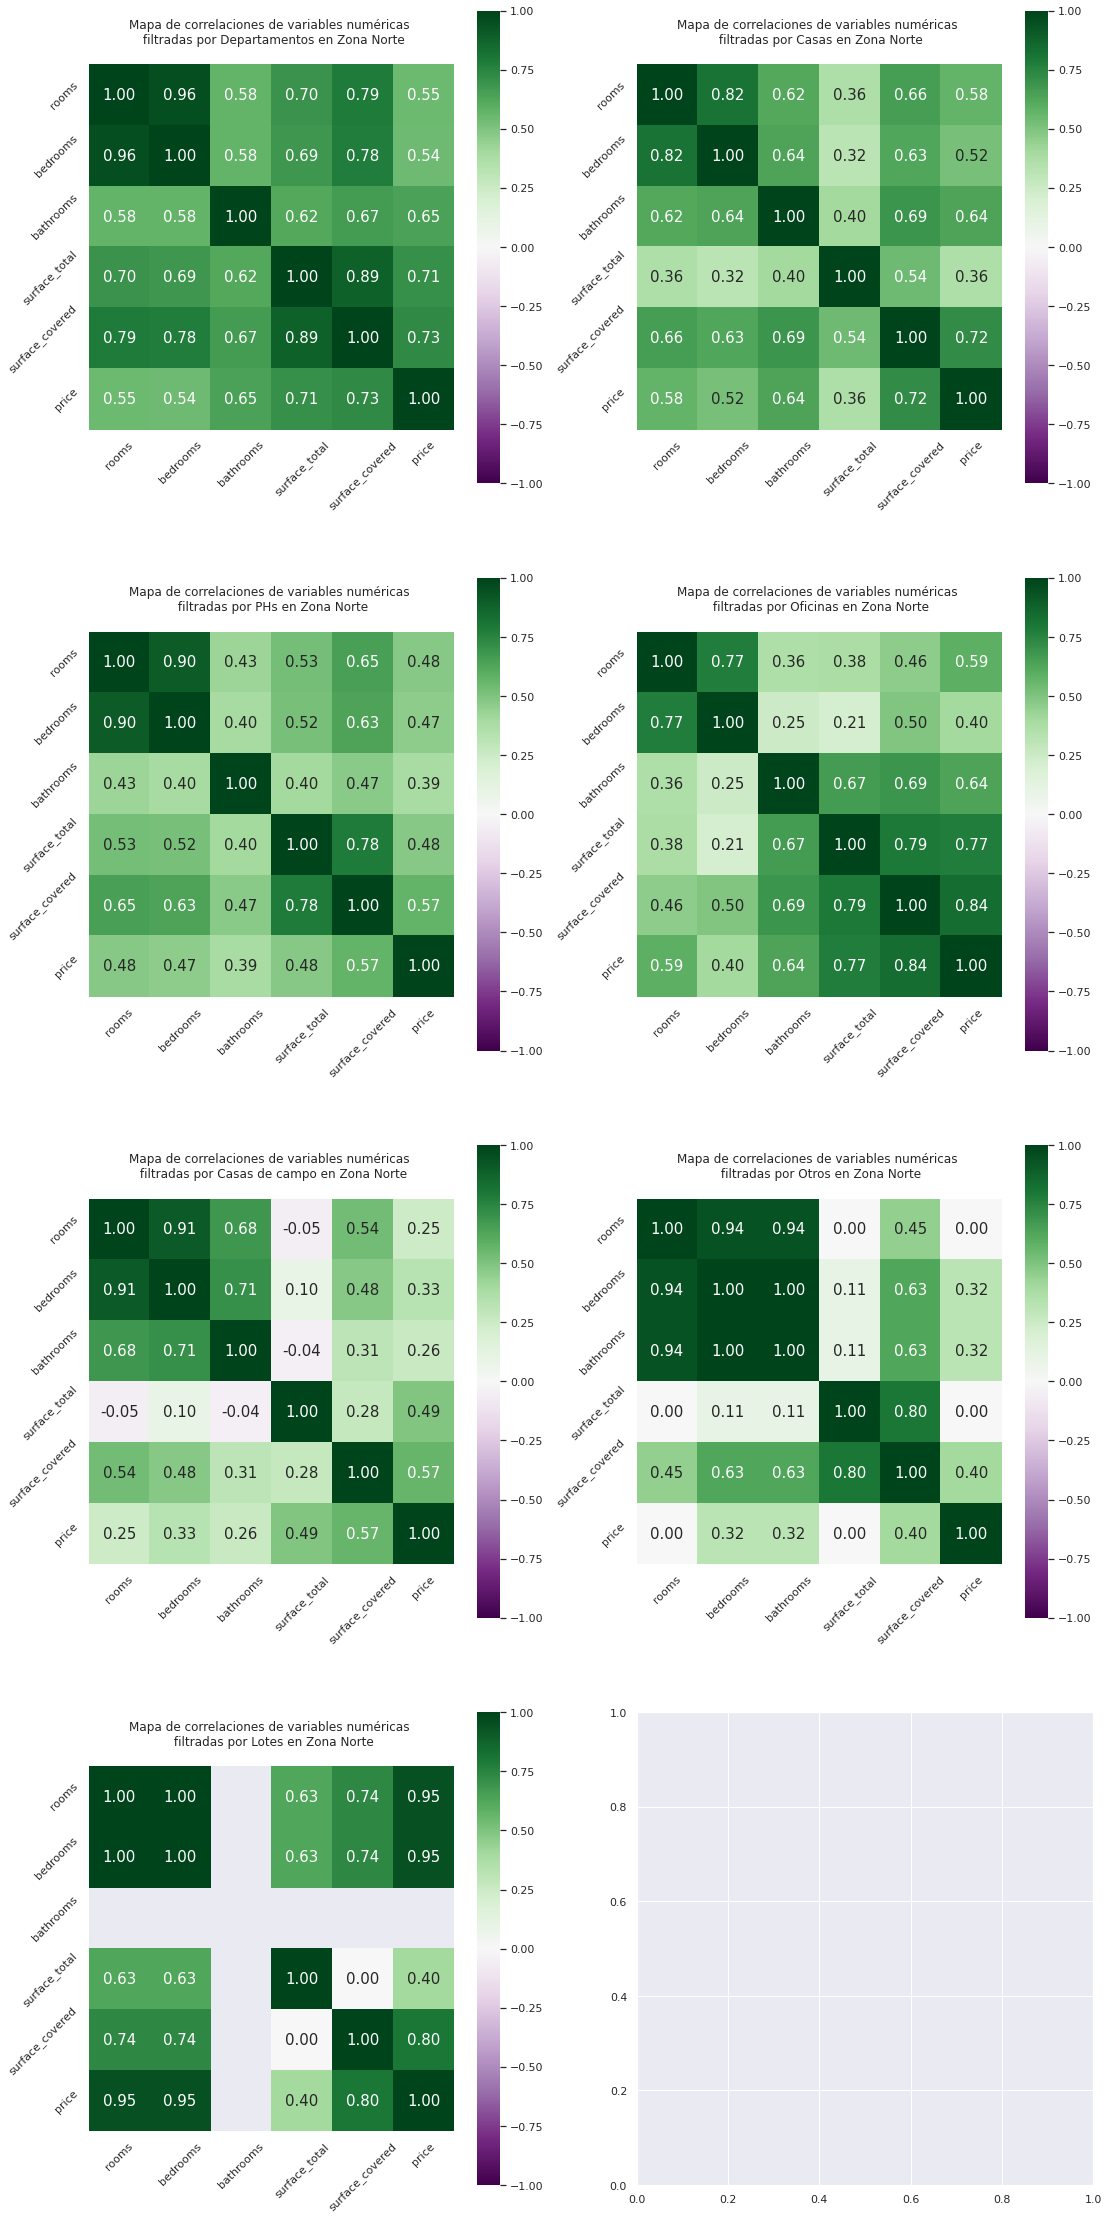

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(18,40))

draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & dptos_filter_new, axs[0,0], 'Departamentos en Zona Norte')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & casa_filter_new, axs[0,1], 'Casas en Zona Norte')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & phs_filter_new, axs[1,0], 'PHs en Zona Norte')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & oficina_filter_new, axs[1,1], 'Oficinas en Zona Norte')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & cdc_filter_new, axs[2,0], 'Casas de campo en Zona Norte')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & otro_filter_new, axs[2,1], 'Otros en Zona Norte')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_norte_filter & lote_filter_new, axs[3,0], 'Lotes en Zona Norte')

plt.show()

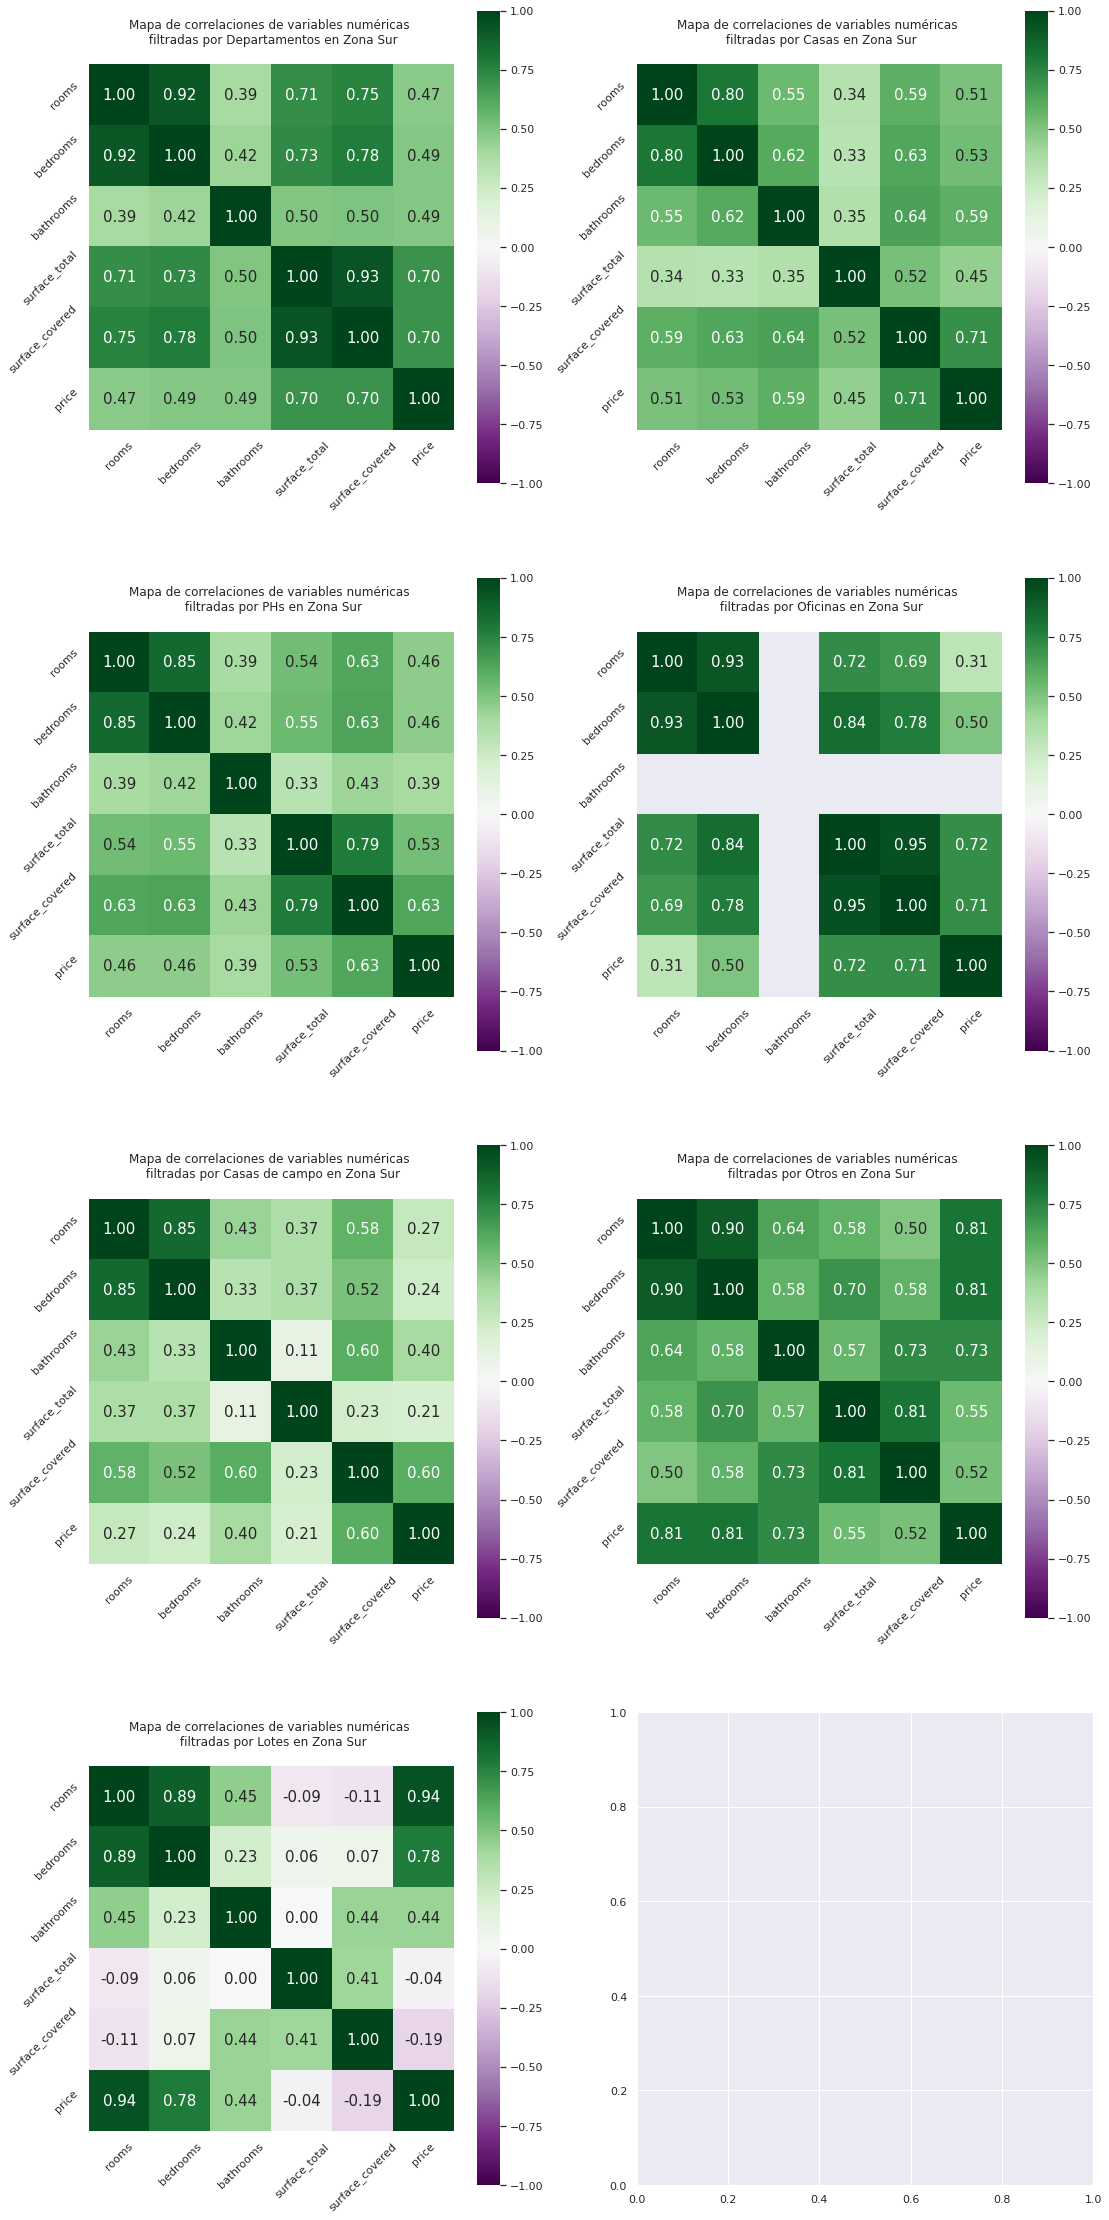

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(18,40))

draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & dptos_filter_new, axs[0,0], 'Departamentos en Zona Sur')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & casa_filter_new, axs[0,1], 'Casas en Zona Sur')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & phs_filter_new, axs[1,0], 'PHs en Zona Sur')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & oficina_filter_new, axs[1,1], 'Oficinas en Zona Sur')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & cdc_filter_new, axs[2,0], 'Casas de campo en Zona Sur')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & otro_filter_new, axs[2,1], 'Otros en Zona Sur')
draw_heatmap_spearman(datos_numericos_filtrados2, zona_sur_filter & lote_filter_new, axs[3,0], 'Lotes en Zona Sur')

plt.show()

En estos últimos diagramas, puede verse que las correlaciones entre las variables numéricas varían según cada tipo de propiedad y zona de G.B.A. en que se ubiquen. Sin embargo, mantienen vigencia los comentarios hechos sobre las correlaciones entre el precio, y la superficie cubierta, las habitaciones, o los baños, hechos a partir del primer mapa de correlaciones: **el precio se correlaciona mayormente con la superficie cubierta y la superficie total, seguidamente con baños, y luego habitaciones; en diferente medida, de acuerdo al tipo de propiedad y la zona en la que se encuentre.** **Estos resutados se mantienen estables y coherentes para las instancias de los tipos más frecuentes en el conjunto de datos (Departamentos, Casas y PHs: estos tipos de instancias comprenden cerca del 99% de los datos)**. 

El comportamiento de las correlaciones entre las características de las propiedades de los tipos menos frecuentes, luego de discriminar por la zona de G.B.A. en la que se ubican, puede deberse a que el cálculo de estos coeficientes se basa en conjuntos de datos insuficientes para realizar estimaciones generalizables. Para corroborar esta hipótesis sería necesario analizar una muestra mayor de los tipos de propiedad menos frecuentes en este dataset.

Ahora, **es posible argumentar que se puede relegar el uso de la variable bedrooms para el modelo predictivo a construir en las próximas secciones; debido a que mantiene una alta correlación con la variable rooms.** Por otro lado, otras variables a menudo altamente correlacionadas son surface covered y surface total; siendo la excepción cuando se trata de Casas y Casas de campo (para las cuales, la correlación entre superficie total y cubierta suele estar alrededor de 0.54 y 0.3, respectivamente). Sin embargo, **los siguientes diagramas sugieren que el coeficiente de correlación entre estas 2 variables, para los distintos tipos de propiedad, más que denotar tendencias más o menos dispersas, denotan el valor de la pendiente de las tendencias lineales que siguen:**


	Distribución de superficie total respecto a superficie cubierta, para inmuebles de distinto tipo




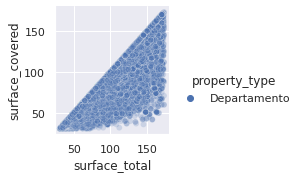

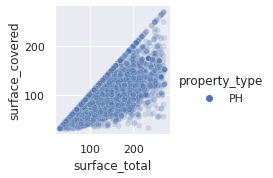

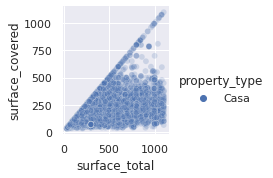

In [ ]:
print("\n\tDistribución de superficie total respecto a superficie cubierta, para inmuebles de distinto tipo\n\n")
sns.pairplot(data=datos_properati_filtrados2[dptos_filter_new], x_vars='surface_total', y_vars='surface_covered', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[phs_filter_new], x_vars='surface_total', y_vars='surface_covered', hue='property_type', plot_kws=dict(alpha=0.2))
sns.pairplot(data=datos_properati_filtrados2[casa_filter_new], x_vars='surface_total', y_vars='surface_covered', hue='property_type', plot_kws=dict(alpha=0.2))
plt.show()

Por otro lado, **cabe mencionar que si realizáramos diagramas de los coeficientes de correlaciones de Pearson** (utilizando la función "draw_heatmap_pearson" en vez de "draw_heatmap_spearman", en los bloques de código anteriores) entre pares de variables numéricas, **encontraríamos que son similares a los coeficientes de correlaciones de Spearman calculados**: mantienen las mismas proporciones, aunque suelen ser menores por algunas centésimas; sin embargo, estas diferencias no invalidan las conclusiones hechas. Por lo que no es necesario realizar mapas de correlaciones usando coeficientes de Pearson.

##Selección de predictores y Tranformación de datos

**Retomemos las siguientes anotaciones:**

* Puede reconocerse una relación directamente proporcional menos dispersa entre los precios de los inmuebles, y sus distintas características numéricas, a medida que nos fijamos en su Tipo y zona de ubicación específica. Esto sugiere que el modelo a desarrollar debe considerar las características categóricas de los inmuebles antes de estimar su precio de venta a partir de sus características numéricas.

* El precio se correlaciona mayormente con la superficie cubierta y ls superficie total, seguidamente con baños, y luego habitaciones; en diferente medida, de acuerdo al tipo de propiedad y la zona en la que se encuentre. Estos resutados se mantienen consistentes para las instancias de los tipos más frecuentes en el conjunto de datos (Departamentos, Casas y PHs: estos tipos de instancias comprenden cerca del 99% de los datos).

* Es posible argumentar que se puede relegar el uso de la variable bedrooms para el modelo predictivo a construir en las próximas secciones; debido a que mantiene una alta correlación con la variable rooms.

* Otras variables a menudo altamente correlacionadas (con el precio de los inmuebles) son superficie cubierta y superficie total; siendo la excepción cuando se trata de Casas. Sin embargo, el coeficiente de correlación entre estas 2 variables, para los distintos tipos de propiedad, más que denotar tendencias más o menos dispersas, denotan el valor de la pendiente de las tendencias lineales que siguen.

**A partir de estos comentarios, de las evidencias de las que surgen, y de la identificación de características descartables realizada tras la vista parcial inicial del conjunto de datos, se propone la siguiente selección de características adecuadas para la elaboración de modelos predictivos de precios:**

'lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type'.

Entendiendo que las características lat y lon pueden agruparse, y así reemplazarse por la característica l3, de acuerdo a lo adecuado que resulte según determinado caso; y que surface_total y surface_covered, aunque generalmente altamente correlacionadas, no siguen esta relación para determinado tipo de propiedad de entre los tipos más frecuentes en el dataset.

También **se considera adecuado integrar los tipos de propiedad menos frecuentes (fuera de Departamentos, Casas y PHs) a la categoría "Otro"**; buscando no suprimir mayor información del conjunto de datos, pero restando relevancia a tipos de propiedad que no indicaron asociarse a tendencias consistentes al discriminar por ubicación; y se presume que pueden contar con insuficientes instancias como para permitir generalizaciones. 


In [ ]:
datos_properati_filtrados2 = datos_properati_filtrados2.astype({'property_type': 'category'})
lista_otros = list(datos_properati_filtrados2[~datos_properati_filtrados2['property_type'].isin(['Departamento', 'Casa', 'PH'])].property_type.value_counts().index[:-3])
datos_properati_filtrados2['property_type'].replace(lista_otros, 'Otro', inplace=True)
#datos_properati_filtrados2.property_type.value_counts()

**Otras transformaciones potencialmente convenientes para adecuar los datos a los modelos predictivos a entrenar y evaluar son: imputación de datos faltantes (para evitar tener que descartas las instancias que contengan alguna característica faltante; y así minimizar la pérdida de información para realizar modelos; además, para hacer que el conjunto de datos sea compatible con elementos y procesos de scikit-learn), estandarización de características numéricas (para poder trabajar adecuadamente con modelos basados en distancias como regresiones lineales, o KNN), y codificación de variables categóricas de manera numérica (para poder trabajar con modelos que sólo admitan features numéricas).** Estas siguientes transformaciones al conjunto de datos se pueden realizar implementando Pipelines de sickit-learn, para facilitar que se realicen de manera iterativa sobre las distintas muestras del dataset que se utilizarán para entrenar los modelos.

##Imputación de datos faltantes

In [ ]:
from tabulate import tabulate

# Función auxiliar, para imprimir patrones de datos faltantes:
def print_missing_value_patterns (data1):
  '''
  Dado un dataframe, se grafica una tabla con sus patrones de datos faltantes:
  Es decir, la tabla muestra una lista de qué variables presentan
  datos faltantes en determinado grupo de instancias (mediante 0s y 1s: con 1
  indicando que la variable correspondiente presenta dato faltante), y cuántas 
  instancias corresponden a dicho patrón de datos faltantes (a dicha fila).
  
  Argumentos:
  data1: Dataframe a analizar por patrones de datos faltantes.
  '''
  data = data1.isnull().astype('int')
  patrones = []
  titles = list(data.columns)
  titles.append('count')
  patrones.append(titles)
  patrones.append([0]*len(titles))
  for i in range(data.shape[0]):
    patrons_comparison_result = 0
    for j in range(1, len(patrones)):
      comparison = (np.array(list(data.iloc[i,:])) - np.array(patrones[j][0:len(titles)-1])) == np.array(patrones[1][0:len(titles)-1])
      patrons_comparison_result += comparison.all()
      if (comparison.all()):
        patrones[j][len(titles)-1] += 1
    if patrons_comparison_result == 0:
      new_patron = list(data.iloc[i,:])
      new_patron.append(1)
      patrones.append(new_patron)
  
  patrones[0].insert(0, '# patrón / feature:')
  patrones[0].append('% en dataset')
  count_idx = len(patrones[0]) - 2
  for k in range(1, len(patrones)):
    patrones[k].insert(0, k)
    patrones[k].append(round((patrones[k][count_idx]/data.shape[0])*100, 3))
  print(tabulate(patrones[1::], headers=patrones[0], tablefmt="orgtbl", numalign="center"))
  return

**A continuación, se listará nuevamente cuántos valores faltantes se presentan por cada característica del dataset original:**


Porcentaje de valores faltantes por features:

start_date: 0.0 %  (0 valores)
end_date: 0.0 %  (0 valores)
created_on: 0.0 %  (0 valores)
lat: 6.469 %  (6876 valores)
lon: 6.469 %  (6876 valores)
l1: 0.0 %  (0 valores)
l2: 0.0 %  (0 valores)
l3: 0.0 %  (0 valores)
rooms: 0.0 %  (0 valores)
bedrooms: 0.0 %  (0 valores)
bathrooms: 1.401 %  (1489 valores)
surface_total: 0.0 %  (0 valores)
surface_covered: 0.0 %  (0 valores)
price: 0.0 %  (0 valores)
currency: 0.0 %  (0 valores)
title: 0.0 %  (0 valores)
description: 0.0 %  (0 valores)
property_type: 0.0 %  (0 valores)
operation_type: 0.0 %  (0 valores)

Porcentaje de instancias con algún valor faltante:
 7.765 %



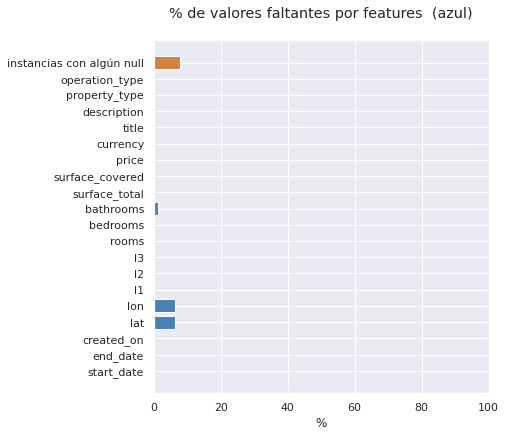

In [ ]:
print("\nPorcentaje de valores faltantes por features:\n")
porcentaje_faltantes = {}
for column in datos_properati_filtrados2.columns:
  conteo_faltantes = sum(pd.isna(datos_properati_filtrados2[column]))
  porcentaje = round((conteo_faltantes/datos_properati_filtrados2.shape[0])*100, 3)
  porcentaje_faltantes[column] = porcentaje
  print(column + ": " + str(porcentaje), "%  (" + str(conteo_faltantes) +" valores)")

print("\nPorcentaje de instancias con algún valor faltante:\n", round((datos_properati_filtrados2.isnull().any(axis=1).sum()/datos_properati_filtrados2.shape[0])*100, 3), "%\n")

plt.figure(figsize=(6,6.5))
plt.xlabel('%')
plt.xlim(0,100)
plt.title('% de valores faltantes por features  (azul)\n', fontsize='x-large')
plt.barh(list(porcentaje_faltantes.keys()), list(porcentaje_faltantes.values()), align='center', color = 'steelblue')
plt.barh(list(["instancias con algún null"]), list([round((datos_properati_filtrados2.isnull().any(axis=1).sum()/datos_properati_filtrados2.shape[0])*100, 3)]), 
         align='center', color = 'peru')
plt.show()

La información anterior indica que el dataset filtrado contiene datos faltantes en la variable baños; que estos se presentan en 1489 instancias (1.4% del total de instancias), así como en lat y lon (en el 6.47% de las instancias, en ambos casos). **Se entiende que las instancias con superficies totales o cubiertas faltantes, y la mayoría de instancias que no reportaban su cantidad de baños, presentaban otras características atípicas, y por tanto ya fueron filtradas. Ahora se revisará en qué patrones se presentan estos datos faltantes:**

In [ ]:
print_missing_value_patterns(datos_properati_ml.loc[:, ('lat', 'lon', 'bathrooms')])

|  # patrón / feature:  |  lat  |  lon  |  bathrooms  |  count  |  % en dataset  |
|-----------------------+-------+-------+-------------+---------+----------------|
|           1           |   0   |   0   |      0      |  98031  |     92.235     |
|           2           |   1   |   1   |      0      |  6764   |     6.364      |
|           3           |   0   |   0   |      1      |  1377   |     1.296      |
|           4           |   1   |   1   |      1      |   112   |     0.105      |


En la tabla anterior, los patrones de datos faltantes indican qué variables presentan datos faltantes para un grupo de instancias en el conjunto de datos. Así, el patrón 1 se refiere al grupo de instancias que no presenta datos faltantes en ninguna variable; y el patrón 2 se refiere a las instancias que sólo carecen de lat y lon.

**Esta tabla indica que las instancias que presentan datos faltantes de latitud, siempre presentan datos faltantes de longitud. Además, que algunas instancias además de carecer de lat y lon, tampoco registran su cantidad de baños; aunque son más de 10 veces más comunes las instancias que solo carecen de información de baños.**

### Imputación de datos faltantes de baños:

A partir de los análisis anteriores, se ha visto que la cantidad de baños se correlaciona de manera moderada (pues los coeficientes de correlación generalmente rondan los 0.55) con las demás características de los inmuebles (lo que dificultaría interpretar que el mecanismo de los datos faltantes de esta variable se deba a un proceso MAR), que el 75% de las propiedades de cada tipo cuenta con hasta 2 baños; a excepción de lo que ocurre con Casas, para las que el 75% logra tener hasta 3 baños; y que **los datos a imputar deberían reforzar las tendencias ya vistas entre las características numéricas**, pues de cualquier modo corresponden a instancias con características típicas. 

Ahora revisemos cómo se distribuyen los datos faltantes de baños de acuerdo a las demás características del dataset:


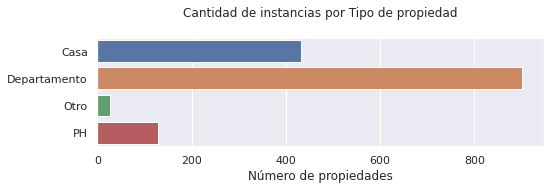

In [ ]:
datos_properati_ml_bathroom_nulls = datos_properati_filtrados2[pd.isnull(datos_properati_filtrados2.bathrooms)]
plt.figure(figsize=(8,2))
sns.countplot(data = datos_properati_ml_bathroom_nulls, y = "property_type")
plt.xlabel('Número de propiedades')
plt.ylabel('')
plt.title('Cantidad de instancias por Tipo de propiedad\n')
plt.show()

In [ ]:
proporcionesxtipo = {}
proporcionesxtipo['Tipo de propiedad'] = list(datos_properati_ml_bathroom_nulls['property_type'].value_counts().keys())
proporcionesxtipo['# de instancias'] = list(datos_properati_ml_bathroom_nulls['property_type'].value_counts())
proporcionesxtipo['%'] = list(round(datos_properati_ml_bathroom_nulls['property_type'].value_counts(1)*100, 3))
pd.DataFrame(proporcionesxtipo)

Tipo de propiedad  # de instancias       %
0      Departamento              902  60.578
1              Casa              433  29.080
2                PH              128   8.596
3              Otro               26   1.746

**Se evidencia que más del 98% de las instancias con datos faltantes de baños son Departamentos (60.6%), Casas (29%) o PHs (8.6%).** Aunque la proporción de instancias con baños nulos, diferenciados por tipo de propiedad, varía ligeramente respecto a la distribución total de instancias discriminadas por tipo de propiedad, no resulta evidente que los datos faltantes se presenten especialmente de acuerdo a algunas de estas categorías.

In [ ]:
aux_dict = {}
aux_dict['Valor de l2'] = list(datos_properati_filtrados2['l2'].value_counts().keys())
aux_dict['# de instancias orig.'] = list(datos_properati_filtrados2['l2'].value_counts())
aux_dict['% en dataset'] = [0]*len(aux_dict['# de instancias orig.'])
aux_dict['# con bathrooms null'] = [0]*len(aux_dict['# de instancias orig.']) 
aux_dict['% nulls en dataset'] = [0]*len(aux_dict['# de instancias orig.'])

datos_bathrooms_nulls = datos_properati_filtrados2[pd.isnull(datos_properati_filtrados2.bathrooms)]

for i, fila in enumerate(aux_dict['Valor de l2']):
  aux_dict['% en dataset'][i] = round((aux_dict['# de instancias orig.'][i]/datos_properati_filtrados2.shape[0])*100, 3)
  aux_dict['# con bathrooms null'][i] = sum(datos_bathrooms_nulls.l2 == aux_dict['Valor de l2'][i]) 
  aux_dict['% nulls en dataset'][i] = round((aux_dict['# con bathrooms null'][i]/datos_properati_filtrados2.shape[0])*100, 3)

print("Cantidad de instancias por l2:\n")
aux_dict_dataframe = pd.DataFrame(aux_dict).sort_values('# de instancias orig.', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)

Cantidad de instancias por l2:



Valor de l2  # de instancias orig.  % en dataset  \
0  Bs.As. G.B.A. Zona Oeste                   7811         7.349   
1    Bs.As. G.B.A. Zona Sur                   9957         9.368   
2  Bs.As. G.B.A. Zona Norte                  19378        18.232   
3           Capital Federal                  69138        65.050   

   # con bathrooms null  % nulls en dataset  
0                   336               0.316  
1                   210               0.198  
2                   226               0.213  
3                   717               0.675

La proporción de instancias con baños faltantes diferenciadas por zona de G.B.A. es similar a la proporción de instancias totales, diferenciadas por zona de G.B.A: esto refuerza la noción de que los datos faltantes se presentan de manera aleatoria respecto a esta característica de las propiedades.

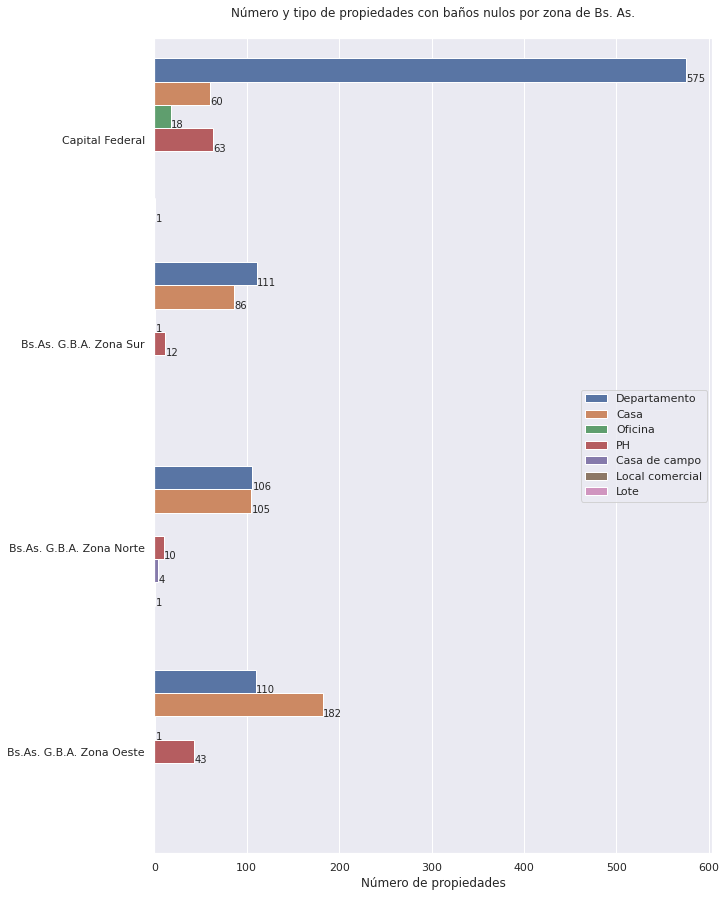

In [ ]:
plt.figure(figsize=(10,15))
graph = sns.countplot(data = datos_bathrooms_nulls, y = "l2", hue= "property_type")
show_values_on_bars2(graph, "h")
plt.xlabel('Número de propiedades')
plt.ylabel('')
plt.title('Número y tipo de propiedades con baños nulos por zona de Bs. As.\n')
plt.legend(loc='center right')
plt.show()

En definitiva, las propiedades con datos faltantes de baños parecen distribuirse de manera similar a las instancias totales del dataset, diferenciadas por tipo de propiedad o zona de G.B.A. en la que se encuentren.

In [ ]:
aux_dict = {}
aux_dict['Valor de rooms'] = list(datos_properati_filtrados2['rooms'].value_counts().keys())
aux_dict['# de instancias orig.'] = list(datos_properati_filtrados2['rooms'].value_counts())
aux_dict['% en dataset'] = [0]*len(aux_dict['# de instancias orig.'])
aux_dict['# con bathrooms null'] = [0]*len(aux_dict['# de instancias orig.']) 
aux_dict['% nulls en dataset'] = [0]*len(aux_dict['# de instancias orig.'])

datos_bathrooms_nulls = datos_properati_filtrados2[pd.isnull(datos_properati_filtrados2.bathrooms)]

for i, fila in enumerate(aux_dict['Valor de rooms']):
  aux_dict['% en dataset'][i] = round((aux_dict['# de instancias orig.'][i]/datos_properati_filtrados2.shape[0])*100, 3)
  aux_dict['# con bathrooms null'][i] = sum(datos_bathrooms_nulls.rooms == aux_dict['Valor de rooms'][i]) 
  aux_dict['% nulls en dataset'][i] = round((aux_dict['# con bathrooms null'][i]/datos_properati_filtrados2.shape[0])*100, 3)

print("Cantidad de instancias por rooms:\n")
aux_dict_dataframe = pd.DataFrame(aux_dict).sort_values('# de instancias orig.', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)

Cantidad de instancias por rooms:



Valor de rooms  # de instancias orig.  % en dataset  # con bathrooms null  \
0             8.0                    259         0.244                     4   
1             7.0                    767         0.722                    13   
2             6.0                   1680         1.581                    39   
3             5.0                   4671         4.395                   103   
4             1.0                   5438         5.116                   114   
5             4.0                  21469        20.200                   264   
6             2.0                  34331        32.301                   443   
7             3.0                  37669        35.442                   509   

   % nulls en dataset  
0               0.004  
1               0.012  
2               0.037  
3               0.097  
4               0.107  
5               0.248  
6               0.417  
7               0.479

Por otro lado, también se evidencia que los datos se asocian en mayor medida a los valores más frecuentes de habitaciones: esto refuerza la noción de que los datos faltantes se presentan de manera aleatoria respecto a esta característica de las propiedades.

**Ahora revisemos la frecuencia con que se presentan los valores faltantes de baños en distintos rangos de superficie cubierta y total, y precio:**

price  nulls count  bin_count      freq bin_centres
0       (4257.6, 115580.0]          515      27427  0.018777     59918.8
1     (115580.0, 223660.0]          596      47350  0.012587    169620.0
2     (223660.0, 331740.0]          215      19503  0.011024    277700.0
3     (331740.0, 439820.0]           72       6570  0.010959    385780.0
4     (439820.0, 547900.0]           51       2492  0.020465    493860.0
5     (547900.0, 655980.0]           18       1423  0.012649    601940.0
6     (655980.0, 764060.0]            5        594  0.008418    710020.0
7     (764060.0, 872140.0]            5        374  0.013369    818100.0
8     (872140.0, 980220.0]            8        197  0.040609    926180.0
9    (980220.0, 1088300.0]            1         77  0.012987   1034260.0
10  (1088300.0, 1196380.0]            0         75  0.000000   1142340.0
11  (1196380.0, 1304460.0]            2         90  0.022222   1250420.0
12  (1304460.0, 1412540.0]            1         45  0.022222   1358500.0
13  (1412540.0, 1520620.0]            0         25  0.000000   1466580.0
14  (1520620.0, 1628700.0]            0         12  0.000000   1574660.0
15  (1628700.0, 1736780.0]            0          7  0.000000   1682740.0
16  (1736780.0, 1844860.0]            0          7  0.000000   1790820.0
17  (1844860.0, 1952940.0]            0          4  0.000000   1898900.0
18  (1952940.0, 2061020.0]            0          3  0.000000   2006980.0
19  (2061020.0, 2169100.0]            0          2  0.000000   2115060.0
20  (2169100.0, 2277180.0]            0          1  0.000000   2223140.0
21  (2277180.0, 2385260.0]            0          1  0.000000   2331220.0
22  (2385260.0, 2493340.0]            0          0       NaN   2439300.0
23  (2493340.0, 2601420.0]            0          1  0.000000   2547380.0
24  (2601420.0, 2709500.0]            0          0       NaN   2655460.0
25  (2709500.0, 2817580.0]            0          1  0.000000   2763540.0
26  (2817580.0, 2925660.0]            0          1  0.000000   2871620.0
27  (2925660.0, 3033740.0]            0          0       NaN   2979700.0
28  (3033740.0, 3141820.0]            0          0       NaN   3087780.0
29  (3141820.0, 3249900.0]            0          2  0.000000   3195860.0

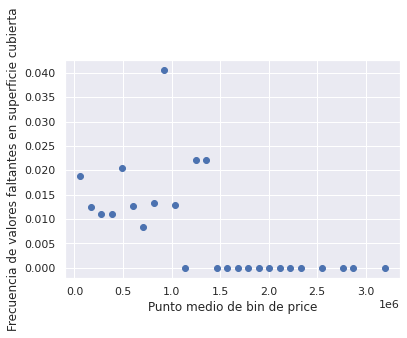

In [ ]:
datos_bins = {}
datos_bins['surface_total_bins'] = pd.cut(datos_properati_filtrados2.surface_total, bins = 30)
datos_bins['surface_covered_bins'] = pd.cut(datos_properati_filtrados2.surface_covered, bins = 30)
datos_bins['price_bins'] = pd.cut(datos_properati_filtrados2.price, bins = 30)

bathrooms_nulls_on_price = datos_properati_filtrados2.bathrooms.isnull().groupby([datos_bins['price_bins']]).sum().astype(int).reset_index(name='nulls count')
bathrooms_nulls_on_price['bin_count'] = datos_properati_filtrados2.groupby([datos_bins['price_bins']]).count()['price'].values
bathrooms_nulls_on_price['freq'] = bathrooms_nulls_on_price['nulls count']/datos_properati_filtrados2.groupby([datos_bins['price_bins']]).count()['price'].values
bathrooms_nulls_on_price["bin_centres"] = bathrooms_nulls_on_price['price'].apply(lambda x: x.mid)

aux_dict_dataframe = pd.DataFrame(bathrooms_nulls_on_price).sort_values('bin_centres', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)

print("\n\n")

plt.scatter(bathrooms_nulls_on_price['bin_centres'], bathrooms_nulls_on_price['freq'])
plt.xlabel('Punto medio de bin de price')
plt.ylabel('Frecuencia de valores faltantes en superficie cubierta')
plt.show()

surface_covered  nulls count  bin_count      freq bin_centres
0         (8.91, 46.333]          411      26470  0.015527     27.6215
1       (46.333, 82.667]          538      46650  0.011533     64.5000
2        (82.667, 119.0]          197      17119  0.011508    100.8335
3       (119.0, 155.333]          117       8110  0.014427    137.1665
4     (155.333, 191.667]           55       2890  0.019031    173.5000
5       (191.667, 228.0]           54       1772  0.030474    209.8335
6       (228.0, 264.333]           28       1134  0.024691    246.1665
7     (264.333, 300.667]           24        806  0.029777    282.5000
8       (300.667, 337.0]           11        375  0.029333    318.8335
9       (337.0, 373.333]           11        341  0.032258    355.1665
10    (373.333, 409.667]           15        230  0.065217    391.5000
11      (409.667, 446.0]            2         90  0.022222    427.8335
12      (446.0, 482.333]            2         90  0.022222    464.1665
13    (482.333, 518.667]            5         57  0.087719    500.5000
14      (518.667, 555.0]            1         32  0.031250    536.8335
15      (555.0, 591.333]            0         13  0.000000    573.1665
16    (591.333, 627.667]            0         22  0.000000    609.5000
17      (627.667, 664.0]            2          9  0.222222    645.8335
18      (664.0, 700.333]            6         15  0.400000    682.1665
19    (700.333, 736.667]            1          5  0.200000    718.5000
20      (736.667, 773.0]            0          4  0.000000    754.8335
21      (773.0, 809.333]            2         17  0.117647    791.1665
22    (809.333, 845.667]            1         11  0.090909    827.5000
23      (845.667, 882.0]            2          3  0.666667    863.8335
24      (882.0, 918.333]            0          1  0.000000    900.1665
25    (918.333, 954.667]            0          2  0.000000    936.5000
26      (954.667, 991.0]            1          3  0.333333    972.8335
27     (991.0, 1027.333]            1          5  0.200000   1009.1665
28  (1027.333, 1063.667]            2          3  0.666667   1045.5000
29    (1063.667, 1100.0]            0          5  0.000000   1081.8335

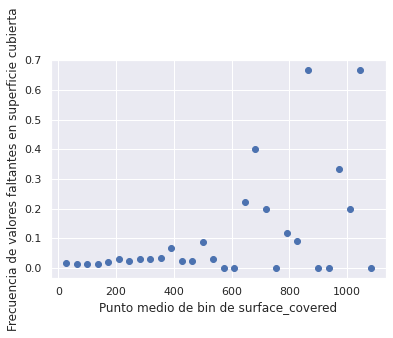

In [ ]:
bathrooms_nulls_on_surface_covered = datos_properati_filtrados2.bathrooms.isnull().groupby([datos_bins['surface_covered_bins']]).sum().astype(int).reset_index(name='nulls count')
bathrooms_nulls_on_surface_covered['bin_count'] = datos_properati_filtrados2.groupby([datos_bins['surface_covered_bins']]).count()['surface_covered'].values
bathrooms_nulls_on_surface_covered['freq'] = bathrooms_nulls_on_surface_covered['nulls count']/datos_properati_filtrados2.groupby([datos_bins['surface_covered_bins']]).count()['surface_covered'].values
bathrooms_nulls_on_surface_covered["bin_centres"] = bathrooms_nulls_on_surface_covered['surface_covered'].apply(lambda x: x.mid)

aux_dict_dataframe = pd.DataFrame(bathrooms_nulls_on_surface_covered).sort_values('bin_centres', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)

print("\n\n")

plt.scatter(bathrooms_nulls_on_surface_covered['bin_centres'], bathrooms_nulls_on_surface_covered['freq'])
plt.xlabel('Punto medio de bin de surface_covered')
plt.ylabel('Frecuencia de valores faltantes en superficie cubierta')
plt.show()

surface_total  nulls count  bin_count      freq bin_centres
0     (6.639, 293.7]         1305      98679  0.013225    150.1695
1     (293.7, 572.4]          136       4700  0.028936    433.0500
2     (572.4, 851.1]           32       1826  0.017525    711.7500
3    (851.1, 1129.8]           13        905  0.014365    990.4500
4   (1129.8, 1408.5]            0         15  0.000000   1269.1500
5   (1408.5, 1687.2]            0         19  0.000000   1547.8500
6   (1687.2, 1965.9]            0         18  0.000000   1826.5500
7   (1965.9, 2244.6]            0         13  0.000000   2105.2500
8   (2244.6, 2523.3]            0         19  0.000000   2383.9500
9   (2523.3, 2802.0]            3         12  0.250000   2662.6500
10  (2802.0, 3080.7]            0         10  0.000000   2941.3500
11  (3080.7, 3359.4]            0          4  0.000000   3220.0500
12  (3359.4, 3638.1]            0         12  0.000000   3498.7500
13  (3638.1, 3916.8]            0          7  0.000000   3777.4500
14  (3916.8, 4195.5]            0          4  0.000000   4056.1500
15  (4195.5, 4474.2]            0          5  0.000000   4334.8500
16  (4474.2, 4752.9]            0          3  0.000000   4613.5500
17  (4752.9, 5031.6]            0          4  0.000000   4892.2500
18  (5031.6, 5310.3]            0          2  0.000000   5170.9500
19  (5310.3, 5589.0]            0          5  0.000000   5449.6500
20  (5589.0, 5867.7]            0          6  0.000000   5728.3500
21  (5867.7, 6146.4]            0          3  0.000000   6007.0500
22  (6146.4, 6425.1]            0          0       NaN   6285.7500
23  (6425.1, 6703.8]            0          1  0.000000   6564.4500
24  (6703.8, 6982.5]            0          0       NaN   6843.1500
25  (6982.5, 7261.2]            0          4  0.000000   7121.8500
26  (7261.2, 7539.9]            0          2  0.000000   7400.5500
27  (7539.9, 7818.6]            0          3  0.000000   7679.2500
28  (7818.6, 8097.3]            0          0       NaN   7957.9500
29  (8097.3, 8376.0]            0          3  0.000000   8236.6500

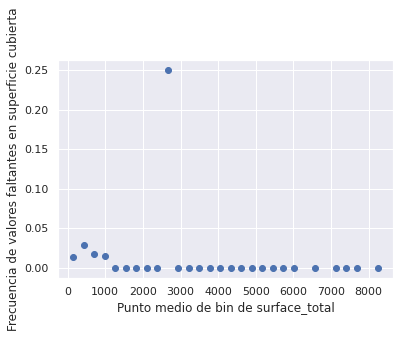

In [ ]:
bathrooms_nulls_on_surface_total = datos_properati_filtrados2.bathrooms.isnull().groupby([datos_bins['surface_total_bins']]).sum().astype(int).reset_index(name='nulls count')
bathrooms_nulls_on_surface_total['bin_count'] = datos_properati_filtrados2.groupby([datos_bins['surface_total_bins']]).count()['surface_total'].values
bathrooms_nulls_on_surface_total['freq'] = bathrooms_nulls_on_surface_total['nulls count']/datos_properati_filtrados2.groupby([datos_bins['surface_total_bins']]).count()['surface_total'].values
bathrooms_nulls_on_surface_total["bin_centres"] = bathrooms_nulls_on_surface_total['surface_total'].apply(lambda x: x.mid)

aux_dict_dataframe = pd.DataFrame(bathrooms_nulls_on_surface_total).sort_values('bin_centres', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)

print("\n\n")

plt.scatter(bathrooms_nulls_on_surface_total['bin_centres'], bathrooms_nulls_on_surface_total['freq'])
plt.xlabel('Punto medio de bin de surface_total')
plt.ylabel('Frecuencia de valores faltantes en superficie cubierta')
plt.show()

**Las tablas anteriores no permiten determinar que el mecanismo que explique los datos faltantes de baños sea MAR o MNAR; por tanto, se mantiene la noción de que estos se presentan de manera MCAR**, sin correlación con alguna variable del dataset. Así, **se prevee que los datos a imputar se mantendrán en el rango discreto de 1 a 3, que se relacionan a las demás características de los inmuebles (pues como se anotó anteriormente, el 75% de las Casas registran una cantidad de baños máxima mayor que el resto de propiedades, y que la cantidad de baños se correlaciona de manera baja y positiva con las demás características); y que su imputación no afectará de manera apreciable las tendencias y distribuciones ya vistas.** 

**Se propone emplear un imputador basado en modelos predictores de KNN para imputar los valores de datos faltantes de baños**, pues este tendría la capacidad de imputar los valores faltantes basado en los valores de las demás variables del dataset. Este puede incorporarse en la siguiente sección a un Pipeline de preprocesamiento, entrenamiento y validación de modelos. Aunque el imputador de la herramienta scikit-learn, por defecto no imputa valores discretos, sino continuos, estos se pretenden sólo como una aproximación.

### Imputación de datos faltantes de lat y lon:

Gracias a lo visto en las primeras secciones de este documento, **se sabe que las ubicaciones de las propiedades pueden sectorizarse a nivel de Barrios/Partidos, mediante la variable l3**; que esta variable se compone de valores únicos, asociados a una zona de G.B.A. en específico, **y que dichos valores deben asociarse a grupos de valores de lat y lon acotados a los límites geográficos correspondientes a cada Barrio/Partido.** Por tanto, **es aceptable emplear la variable l3 para disponer de conjuntos de valores de lat y lon, que permitan estimar estas características (de manera cercana, más no exacta), para aquellas instancias que no las registren**: esto, si ocurre que cada valor de l3 puede asociarse a un conjunto de valores de lat y lon.

Para determinar esto último, analicemos la siguiente tabla:

In [ ]:
datos_properati_aux = datos_properati_filtrados2.loc[:, ('l3', 'lat', 'lon')]
aux_dict = {}
aux_dict['Barrio/partido'] = list(datos_properati_aux['l3'].value_counts().keys())
aux_dict['| # de instancias orig.'] = list(datos_properati_aux['l3'].value_counts())
aux_dict['| # de instancias sin lat/lon'] = [0]*len(aux_dict['| # de instancias orig.']) 
aux_dict['| # remanentes con lat/lon'] = [0]*len(aux_dict['| # de instancias orig.'])

datos_properati_aux_nulls = datos_properati_aux[pd.isnull(datos_properati_aux).any(axis=1)]

for i, fila in enumerate(aux_dict['Barrio/partido']):
  aux_dict['| # de instancias sin lat/lon'][i] = sum(datos_properati_aux_nulls.l3 == aux_dict['Barrio/partido'][i])
  aux_dict['| # remanentes con lat/lon'][i] = aux_dict['| # de instancias orig.'][i] - aux_dict['| # de instancias sin lat/lon'][i]

print("Cantidad de instancias por Barrio/partido:\n")
aux_dict_dataframe = pd.DataFrame(aux_dict).sort_values('| # remanentes con lat/lon', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)


Cantidad de instancias por Barrio/partido:



Barrio/partido  | # de instancias orig.  \
0              Catalinas                        4   
1             Marcos Paz                       17   
2       Presidente Perón                       32   
3        Villa Riachuelo                       31   
4               Cañuelas                       40   
5          Villa Soldati                       52   
6       Florencio Varela                       97   
7             Villa Real                      121   
8             Tribunales                      126   
9        Velez Sarsfield                      128   
10           San Vicente                      160   
11             Agronomía                      142   
12     General Rodríguez                      156   
13            José C Paz                      158   
14               Pompeya                      171   
15     Parque Avellaneda                      187   
16             Versalles                      192   
17           Parque Chas                      227   
18         Villa Ortuzar                      237   
19            Hurlingham                      264   
20                  Boca                      253   
21                 Merlo                      262   
22   Malvinas Argentinas                      282   
23      Villa Santa Rita                      291   
24          Constitución                      303   
25   Villa General Mitre                      305   
26       Almirante Brown                      323   
27                Abasto                      335   
28  Centro / Microcentro                      378   
29                Ezeiza                      432   
30      Parque Patricios                      376   
31          Villa Lugano                      411   
32    Esteban Echeverría                      446   
33           Las Cañitas                      482   
34                Retiro                      495   
35           San Nicolás                      507   
36               Coghlan                      474   
37            Villa Luro                      473   
38             Mataderos                      497   
39           Berazategui                      531   
40              Congreso                      513   
41             Ituzaingó                      538   
42          Monte Castro                      514   
43               Liniers                      574   
44             Monserrat                      589   
45             Chacarita                      599   
46                  Once                      596   
47              Barracas                      602   
48      Villa Pueyrredón                      627   
49      Parque Chacabuco                      656   
50                 Boedo                      672   
51              Floresta                      740   
52                Moreno                      772   
53             San Telmo                      804   
54         San Cristobal                      820   
55          San Fernando                      847   
56            San Miguel                      857   
57       Lomas de Zamora                      850   
58              Saavedra                      858   
59              Paternal                      872   
60         Puerto Madero                     1073   
61               Escobar                     1084   
62            Avellaneda                     1165   
63          Villa Devoto                     1140   
64      Villa del Parque                     1156   
65     Parque Centenario                     1179   
66            Colegiales                     1220   
67                 Lanús                     1307   
68    General San Martín                     1380   
69                 Morón                     1421   
70               Quilmes                     1450   
71                 Nuñez                     1602   
72                Flores                     1851   
73            San Isidro                     1800   
74       Tres de Febrero           

**La tabla anterior evidencia que todos los Barrios/Partidos se asocian a un conjunto de instancias que cuentan con latitud y longitud.** También se encuentra que el tamaño de estos grupos de instancias diferenciados por l3, no están balanceados, y algunos cuentan con escasos valores: esto puede implicar que en caso de adoptar la estrategia de imputación descrita para lat y lon en muestras del conjunto de datos original, sea probable encontrar que al agrupar las instancias por Barrio/Partido se logren grupos con cantidades insuficientes para realizar estimaciones de lat y lon. Así, el enfoque actual se podría complementar integrando grupos de la variable l2, y en último caso usando la media de cada variable calculada a partir de todos sus valores (la media de lat o lon por región, a efectos prácticos). 

En la tabla anterior, los valores se ordenan de menor a mayor respecto a  la cantidad de instancias que registran tanto latitud como longitud (especificado en la columna "# remanentes con lat/lon"), para facilitar la lectura de los barrios que se asociaran a una cantidad nula de instancias con lat y lon. **Se percibe que los valores faltantes de latitud/longitud se presentan de manera proporcional entre los Barrios/Partidos asociados a mayor cantidad de instancias**, lo cual sugiere que los valores faltantes de lat y lon, no se asocian de manera particular a valores de l3; **es decir, que serían aleatorios respecto a esta variable.**

A partir de la información lograda, **es razonable imputar datos faltantes de latitud y longitud a partir de las ubicaciones promedio de los Barrios/Partidos a los que se asocian** (calculados usando las instancias que sí registran latitud y longitud), empleando como complemento valores de l2 y l1 para grupos de instancias que no dispongan de valores de lat y lon. Esta estrategia de imputación, aunque posible de implementar mediante un imputador personalizado compatible con Pipelines de Sickit-learn como parte de futuros procesos de muestreo, entrenamiento y prueba automática de modelos, resulta más sencilla de llevar a cabo antes de dichas etapas de manera manual, utilizando todo el conjunto de datos.

Primeramente, se registrará en una tabla la media de las características lat y lon, agrupadas previamente por Barrio/Partido (valores de l3):

In [ ]:
aux_dict['| Lat. promedio'] = [0]*len(aux_dict['| # de instancias orig.'])
aux_dict['| Lon. promedio'] = [0]*len(aux_dict['| # de instancias orig.'])
for i, fila in enumerate(aux_dict['Barrio/partido']):
  aux_dict['| Lat. promedio'][i] = datos_properati_aux[datos_properati_aux.l3 == aux_dict['Barrio/partido'][i]]['lat'].mean(axis=0)
  aux_dict['| Lon. promedio'][i] = datos_properati_aux[datos_properati_aux.l3 == aux_dict['Barrio/partido'][i]]['lon'].mean(axis=0)

aux_dict_dataframe = pd.DataFrame(aux_dict).sort_values('| # remanentes con lat/lon', ignore_index=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', aux_dict_dataframe.shape[0]+1)
display(aux_dict_dataframe)

Barrio/partido  | # de instancias orig.  \
0              Catalinas                        4   
1             Marcos Paz                       17   
2       Presidente Perón                       32   
3        Villa Riachuelo                       31   
4               Cañuelas                       40   
5          Villa Soldati                       52   
6       Florencio Varela                       97   
7             Villa Real                      121   
8             Tribunales                      126   
9        Velez Sarsfield                      128   
10           San Vicente                      160   
11             Agronomía                      142   
12     General Rodríguez                      156   
13            José C Paz                      158   
14               Pompeya                      171   
15     Parque Avellaneda                      187   
16             Versalles                      192   
17           Parque Chas                      227   
18         Villa Ortuzar                      237   
19            Hurlingham                      264   
20                  Boca                      253   
21                 Merlo                      262   
22   Malvinas Argentinas                      282   
23      Villa Santa Rita                      291   
24          Constitución                      303   
25   Villa General Mitre                      305   
26       Almirante Brown                      323   
27                Abasto                      335   
28  Centro / Microcentro                      378   
29                Ezeiza                      432   
30      Parque Patricios                      376   
31          Villa Lugano                      411   
32    Esteban Echeverría                      446   
33           Las Cañitas                      482   
34                Retiro                      495   
35           San Nicolás                      507   
36               Coghlan                      474   
37            Villa Luro                      473   
38             Mataderos                      497   
39           Berazategui                      531   
40              Congreso                      513   
41             Ituzaingó                      538   
42          Monte Castro                      514   
43               Liniers                      574   
44             Monserrat                      589   
45             Chacarita                      599   
46                  Once                      596   
47              Barracas                      602   
48      Villa Pueyrredón                      627   
49      Parque Chacabuco                      656   
50                 Boedo                      672   
51              Floresta                      740   
52                Moreno                      772   
53             San Telmo                      804   
54         San Cristobal                      820   
55          San Fernando                      847   
56            San Miguel                      857   
57       Lomas de Zamora                      850   
58              Saavedra                      858   
59              Paternal                      872   
60         Puerto Madero                     1073   
61               Escobar                     1084   
62            Avellaneda                     1165   
63          Villa Devoto                     1140   
64      Villa del Parque                     1156   
65     Parque Centenario                     1179   
66            Colegiales                     1220   
67                 Lanús                     1307   
68    General San Martín                     1380   
69                 Morón                     1421   
70               Quilmes                     1450   
71                 Nuñez                     1602   
72                Flores                     1851   
73            San Isidro                     1800   
74       Tres de Febrero           

En la tabla anterior, se realizó la asociación de cada Barrio/Partido en el dataset, a una lat y lon promedio.

Ahora se procederá a asignar estos valores promedios a las instancias que no cuenten con ellos:

In [ ]:
datos_properati_filtrados2.reset_index(drop=True, inplace=True)
for i in range(datos_properati_filtrados2.shape[0]):
  if (pd.isnull(datos_properati_filtrados2.lat[i])):
    datos_properati_filtrados2.at[i, "lat"] = aux_dict['| Lat. promedio'][aux_dict['Barrio/partido'].index(datos_properati_filtrados2.l3[i])]
  if (pd.isnull(datos_properati_filtrados2.lon[i])):    
    datos_properati_filtrados2.at[i, "lon"] = aux_dict['| Lon. promedio'][aux_dict['Barrio/partido'].index(datos_properati_filtrados2.l3[i])]

A continuación, se listará nuevamente cuántos valores faltantes se presentan por cada característica del dataset original:


Porcentaje de valores faltantes por features:

start_date: 0.0 %  (0 valores)
end_date: 0.0 %  (0 valores)
created_on: 0.0 %  (0 valores)
lat: 0.0 %  (0 valores)
lon: 0.0 %  (0 valores)
l1: 0.0 %  (0 valores)
l2: 0.0 %  (0 valores)
l3: 0.0 %  (0 valores)
rooms: 0.0 %  (0 valores)
bedrooms: 0.0 %  (0 valores)
bathrooms: 1.401 %  (1489 valores)
surface_total: 0.0 %  (0 valores)
surface_covered: 0.0 %  (0 valores)
price: 0.0 %  (0 valores)
currency: 0.0 %  (0 valores)
title: 0.0 %  (0 valores)
description: 0.0 %  (0 valores)
property_type: 0.0 %  (0 valores)
operation_type: 0.0 %  (0 valores)

Porcentaje de instancias con algún valor faltante:
 1.401 %



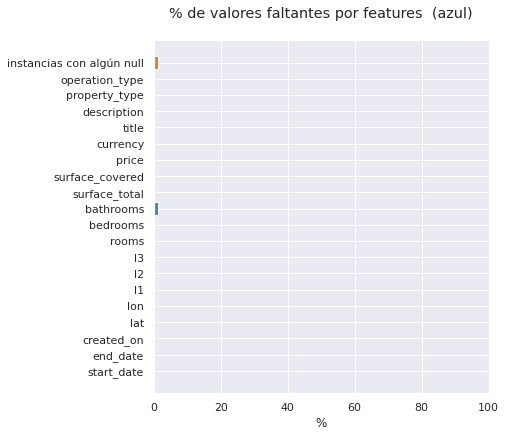

In [ ]:
print("\nPorcentaje de valores faltantes por features:\n")
porcentaje_faltantes = {}
for column in datos_properati_filtrados2.columns:
  conteo_faltantes = sum(pd.isna(datos_properati_filtrados2[column]))
  porcentaje = round((conteo_faltantes/datos_properati_filtrados2.shape[0])*100, 3)
  porcentaje_faltantes[column] = porcentaje
  print(column + ": " + str(porcentaje), "%  (" + str(conteo_faltantes) +" valores)")

print("\nPorcentaje de instancias con algún valor faltante:\n", round((datos_properati_filtrados2.isnull().any(axis=1).sum()/datos_properati_filtrados2.shape[0])*100, 3), "%\n")

plt.figure(figsize=(6,6.5))
plt.xlabel('%')
plt.xlim(0,100)
plt.title('% de valores faltantes por features  (azul)\n', fontsize='x-large')
plt.barh(list(porcentaje_faltantes.keys()), list(porcentaje_faltantes.values()), align='center', color = 'steelblue')
plt.barh(list(["instancias con algún null"]), list([round((datos_properati_filtrados2.isnull().any(axis=1).sum()/datos_properati_filtrados2.shape[0])*100, 3)]), 
         align='center', color = 'peru')
plt.show()

**La información anterior indica que el dataset filtrado sólo contiene datos faltantes en la variable baños.**

##Entrenamiento y prueba de modelos sencillos


A modo de referencia, un resumen de los datos utilizados y el desempeño del modelo implementado en el "Proyecto 01: Análisis de mercado inmobiliario", se presentan a continuación. Cabe recordar que tales datos corresponden únicamente a las características numéricas de los Departamentos de la Capital Federal que superaron los filtros convenidos en dicho proyecto:

In [ ]:
dptos = datos_properati['property_type'] == 'Departamento'
capital = datos_properati['l2'] == 'Capital Federal'
sup_total = (datos_properati['surface_total'] >= 40) & (datos_properati['surface_total'] <= 272)
sup_cubierta = (datos_properati['surface_covered'] >= 40) & (datos_properati['surface_covered'] <= 199) & (datos_properati.surface_covered <= datos_properati.surface_total)
ambientes = datos_properati['rooms'] <= 7
dormitorios = datos_properati['bedrooms'] <= 6
baños = datos_properati['bathrooms'] <= 3
precio = datos_properati['price'] <= 496000

datos_proyecto1 = datos_properati[dptos & capital & sup_total & sup_cubierta & ambientes & dormitorios & baños & precio].loc[:, ('rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'price', 'lat', 'lon')]
datos_proyecto1.dropna(inplace=True)

round(datos_proyecto1.describe(), 4)

rooms    bedrooms   bathrooms  surface_total  surface_covered  \
count  46636.0000  46636.0000  46636.0000     46636.0000       46636.0000   
mean       2.9205      1.9143      1.4219        77.9455          69.3440   
std        0.8876      0.8038      0.6043        32.0739          26.6929   
min        1.0000      0.0000      1.0000        40.0000          40.0000   
25%        2.0000      1.0000      1.0000        54.0000          49.0000   
50%        3.0000      2.0000      1.0000        70.0000          62.0000   
75%        3.0000      2.0000      2.0000        92.0000          81.0000   
max        7.0000      6.0000      3.0000       272.0000         199.0000   

             price         lat         lon  
count   46636.0000  46636.0000  46636.0000  
mean   205734.0083    -34.5973    -58.4337  
std     91163.2702      0.0223      0.0333  
min     10800.0000    -34.6944    -58.5305  
25%    139000.0000    -34.6101    -58.4548  
50%    184000.0000    -34.5984    -58.4318  
75%    250000.0000    -34.5841    -58.4111  
max    496000.0000    -34.5359    -58.3549

In [ ]:
X_project1 = datos_proyecto1.loc[:, ('rooms', 'bathrooms', 'surface_total', 'lat', 'lon')]
y_project1 = datos_proyecto1.loc[:, 'price']

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

error_metrics = ['neg_mean_absolute_error', 'r2']

print("Métricas de desempeño de modelo seleccionado para Proyecto 01\ncalculadas a partir de V.C. de 10 capas: \n")
tree_regressor_project1 = DecisionTreeRegressor(max_depth=7, random_state=0)
kf = KFold(n_splits = 10, random_state = 0, shuffle = True)
scores = cross_validate(tree_regressor_project1, X_project1, y_project1, scoring = error_metrics, cv = kf, return_train_score = True)
train_test_abs_errors = np.abs(scores['test_neg_mean_absolute_error'] - scores['train_neg_mean_absolute_error'])
scores['train_test_mae_abs_errors'] = train_test_abs_errors
display(pd.DataFrame(scores))

print("\nDesempeño de árbol de regresión seleccionado para proyecto 1:\nPromedio de MAE de test: %5.4f, SD: %5.4f\nPromedio de diferencias absolutas entre MAEs de train y test: %5.4f, SD: %5.4f\nPromedio de R2: %5.4f, SD: %5.4f" % (np.mean(scores['test_neg_mean_absolute_error'])*(-1.0), np.std(scores['test_neg_mean_absolute_error']), np.mean(train_test_abs_errors), np.std(train_test_abs_errors), np.mean(scores['test_r2']), np.std(scores['test_r2'])))

Métricas de desempeño de modelo entrenado con datos para Proyecto 01
calculadas a partir de V.C. de 10 capas: 



fit_time  score_time  test_neg_mean_absolute_error  \
0  0.162127    0.005384                 -31931.152048   
1  0.117785    0.006373                 -32886.095518   
2  0.116209    0.004925                 -32215.811507   
3  0.131364    0.004820                 -31989.452161   
4  0.127575    0.013850                 -32803.992999   
5  0.129713    0.004797                 -33692.193944   
6  0.187650    0.004893                 -32249.248250   
7  0.178978    0.004889                 -32675.631449   
8  0.114099    0.004821                 -32165.853267   
9  0.169366    0.004873                 -33322.665318   

   train_neg_mean_absolute_error   test_r2  train_r2  \
0                  -32033.236467  0.757168  0.765119   
1                  -31986.433154  0.764586  0.764873   
2                  -31894.183994  0.766590  0.765550   
3                  -32003.186722  0.759178  0.765499   
4                  -32083.264470  0.746149  0.766733   
5                  -31881.089738  0.745703  0.766735   
6                  -32223.320233  0.764818  0.765133   
7                  -31931.129855  0.760056  0.766141   
8                  -31981.732198  0.750498  0.766958   
9                  -32052.627378  0.743091  0.767339   

   train_test_mae_abs_errors  
0                 102.084418  
1                 899.662364  
2                 321.627512  
3                  13.734560  
4                 720.728529  
5                1811.104205  
6                  25.928017  
7                 744.501594  
8                 184.121069  
9                1270.037940


Desempeño de árbol de regresión con datos para proyecto 1:
Promedio de MAE de test: 32593.2096, SD: 558.8464
Promedio de diferencias absolutas entre MAEs de train y test: 609.3530, SD: 566.7217
Promedio de R2: 0.7558, SD: 0.0083


Ahora, los datos de los Departamentos de la Capital Federal, sometidos a los filtros y transformaciones definidas como convenientes en el presente proyecto; así como el desempeño del modelo seleccionado en el Proyecto 01 utilizando los mismos, se presentan a continuación:

In [ ]:
dptos_filter_new = datos_properati_filtrados2['property_type'] == 'Departamento'
capital_fed_filter = datos_properati_filtrados2['l2'] == 'Capital Federal'
init_dataset_project2 = datos_properati_filtrados2[dptos_filter_new & capital_fed_filter]
round(init_dataset_project2.describe(), 4)

lat         lon       rooms    bedrooms   bathrooms  \
count  58591.0000  58591.0000  58591.0000  58591.0000  58016.0000   
mean     -34.5968    -58.4332      2.6646      1.7226      1.3643   
std        0.0223      0.0337      0.8570      0.7513      0.5831   
min      -34.6944    -58.5305      1.0000      0.0000      1.0000   
25%      -34.6101    -58.4541      2.0000      1.0000      1.0000   
50%      -34.5977    -58.4313      3.0000      2.0000      1.0000   
75%      -34.5837    -58.4106      3.0000      2.0000      2.0000   
max      -34.5359    -58.3549      4.0000      3.0000      3.0000   

       surface_total  surface_covered         price  
count     58591.0000       58591.0000  5.859100e+04  
mean         70.7153          63.5036  2.036364e+05  
std          30.0573          26.5350  1.345541e+05  
min          31.0000          31.0000  7.500000e+03  
25%          48.0000          43.0000  1.210000e+05  
50%          64.0000          57.0000  1.669200e+05  
75%          86.0000          77.0000  2.400000e+05  
max         173.0000         173.0000  3.249900e+06

In [ ]:
X_init_project2 = init_dataset_project2.loc[:, ('lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type')]
y_init_project2 = init_dataset_project2.loc[:, 'price']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer

preprocess = make_column_transformer(
    (OneHotEncoder(), ['property_type']), 
    (StandardScaler(), ['lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered']), 
    remainder = 'passthrough')

print("Métricas de desempeño de modelo entrenado con datos del presente proyecto\ncalculadas a partir de V.C. de 10 capas: \n")

data_pipeline = make_pipeline(preprocess, KNNImputer(), tree_regressor_project1)
scores = cross_validate(data_pipeline, X_init_project2, y_init_project2, scoring = error_metrics, cv = kf, return_train_score = True)
train_test_abs_errors = np.abs(scores['test_neg_mean_absolute_error'] - scores['train_neg_mean_absolute_error'])
scores['train_test_mae_abs_errors'] = train_test_abs_errors
display(pd.DataFrame(scores))

print("Desempeño de árbol de regresión con datos del presente proyecto:\nPromedio de MAE de test: %5.4f, SD: %5.4f\nPromedio de diferencias absolutas entre MAEs de train y test: %5.4f, SD: %5.4f\nPromedio de R2: %5.4f, SD: %5.4f" % (np.mean(scores['test_neg_mean_absolute_error'])*(-1.0), np.std(scores['test_neg_mean_absolute_error']), np.mean(train_test_abs_errors), np.std(train_test_abs_errors), np.mean(scores['test_r2']), np.std(scores['test_r2'])))

Métricas de desempeño de modelo entrenado con datos del presente proyecto
calculadas a partir de V.C. de 10 capas: 



fit_time  score_time  test_neg_mean_absolute_error  \
0  4.452018    0.550801                 -38149.016926   
1  1.922183    0.273677                 -38269.751178   
2  2.014624    0.296249                 -36691.894533   
3  1.910685    0.264090                 -36645.654374   
4  1.885551    0.309941                 -37978.589019   
5  2.103678    0.284997                 -36925.472292   
6  1.989528    0.256559                 -37223.825502   
7  1.974024    0.231907                 -38433.639536   
8  1.958309    0.245535                 -37949.551646   
9  2.176777    0.250349                 -38528.459292   

   train_neg_mean_absolute_error   test_r2  train_r2  \
0                  -36959.577936  0.787205  0.793011   
1                  -37065.459635  0.801253  0.790679   
2                  -36836.684755  0.808751  0.793579   
3                  -36907.303406  0.794745  0.793360   
4                  -36784.506363  0.722975  0.801251   
5                  -37042.304116  0.776214  0.793412   
6                  -36884.554040  0.730883  0.800717   
7                  -37048.675789  0.705924  0.800213   
8                  -36784.210115  0.800516  0.793127   
9                  -37239.596777  0.784239  0.799759   

   train_test_mae_abs_errors  
0                1189.438991  
1                1204.291543  
2                 144.790222  
3                 261.649032  
4                1194.082656  
5                 116.831825  
6                 339.271462  
7                1384.963747  
8                1165.341530  
9                1288.862516

Desempeño de árbol de regresión con datos del presente proyecto:
Promedio de MAE de test: 37679.5854, SD: 695.7788
Promedio de diferencias absolutas entre MAEs de train y test: 828.9524, SD: 507.4237
Promedio de R2: 0.7713, SD: 0.0352


Cabe resaltar que **los resultados anteriores se obtuvieron empleando el mismo modelo de Árbol de Regresión, la mismas métricas de desempeño, y el mismo método de validación de dichas métricas (basado en el uso de validación cruzada de 10 capas)**; esto, buscando que la diferencia determinante entre ambos procesos de entrenamiento y prueba fueran los datos filtrados y transformados según cada caso. Los datos, aunque para ambos casos no incluyen las mismas instancias, se obtuvieron siguiendo las mismas directrices: corresponder a las características de Departamentos de la Capital Federal, seleccionadas, procesadas y filtradas, para elaborar modelos predictivos del precio en cada proyecto.

Los resultados anteriores evidencian lo siguiente:

* **El modelo entrenado con los datos utilizados para el Proyecto 01 arroja menor MAE promedio de prueba; e incluso con menor desviación estándar, que el MAE promedio de prueba conseguido al entrenar con los datos preprocesados como se propuso en el presente proyecto.**

* **El promedio de diferencias absolutas entre MAEs de train y test fue mayor al usar los datos del presente proyecto**; y la desviación estándar asociada a las diferencias absolutas entre MAEs de train y test es comparable. Esto indica que **la brecha entre errores de train y test es consistentemente mayor al usar los datos del presente proyecto.**

* **El coeficiente de determinación (R2) promedio obtenido al entrenar y probar el modelo con los datos del presente proyecto, es mayor que el coeficiente de determiación promedio logrado por el mismo modelo, usando los datos del Proyecto 01**; aunque el primero se acompaña de una desviación estándar que casi cuatriplica la desviación del segundo. 

* Cabe resaltar, sin embargo, que el mayor coefieciente de determinación (R2) encontrado con los datos del Proyecto 01, es mayor que solo los 3 menores valores de este coeficiente encontrados al entrenar y probar con los datos como se propuso en el presente proyecto: **es decir, en general, el modelo se adapta mejor a los datos procesados como en la presente entrega, que a aquellos utilizados en el Proyeco 01.**

* Por otro lado, se debe tener en cuenta que **a pesar de que los valores de las características de los datos del Proyecto 01 se hayan acotado a mayores valores que las características depuradas para el presente proyecto**; los precios máximos aceptados en el presente proyecto superan hasta 6.5 veces los precios máximos que se permitieron el Proyecto 01; y el menor precio admisible para el presente proyecto es a su vez inferior al precio mínimo aceptable para el Proyecto 01: esto significa que **se admitieron instancias en un rango de precios mayor en el presente proyecto, que en el Proyecto 01; lo que supone mayor varianza en la variable objetivo.** 

* Pudo comprobarse en "Distribución de precios respecto a otras variables numéricas, para inmuebles en la Capital Federal" (en la sección Correlaciones entre las variables numéricas) que entre los Departamentos de la Capital Federal del conjunto de datos de este proyecto se presentan instancias con precios atípicos, o cuando menos, notablemente alejados del grueso de precios de las demás propiedades: esto mismo no se presenta en el conjunto de datos usado en el Proyecto 01, gracias a la cota superior determinada para los precios en tal caso. **Esto implica que el modelo, al usar los datos preparados para el presente proyecto, debió lidiar con precios atípicos, o notablemente alejados de la gran mayoría.**

* **Los tiempos de entrenamiento al usar datos preparados en el presente proyecto fueron, en promedio, más de 30 veces mayores que cuando no se usaron datos con transfomaciones (datos del Proyecto 01)**; así mismo, los tiempos de prueba fueron notablemente mayores al usar datos de este proyecto.

* Por último, también vale la pena tener en cuenta que **los hiperparámetros del modelo se escogieron y optimizaron teniendo en cuenta el desempeño del modelo usando los datos del Proyecto 01.**

En términos generales, el modelo evaluado logra consistentemente menor MAE de prueba al utilizar los datos del Proyecto 01; así mismo, consistentemente manifiesta menor diferencia entre los MAE de entrenamiento y de prueba, que el modelo que utiliza los datos del presente proyecto. 

Sin embargo, el coeficiente de determinación promedio obtenido al entrenar y probar el modelo con los datos del presente proyecto, es generalmente mayor que el coeficiente de determiación promedio logrado usando los datos del Proyecto 01. 

Estos hechos permiten pensar que, a pesar de que el desempeño del modelo podría mejorarse mediante regularización (idea sugerida por la brecha entre errores de train y test), el modelo generalmente se adapta mejor a los datos de la presente entrega (de acuerdo a los valores de R2 calculados), que a aquellos utilizados en el Proyecto 01; a pesar de que los datos preparados para el presente proyecto se asocien a una variable objetivo con una mayor dispersión, e incluso con valores atípicos. Además, si bien entrenar y probar el modelo sometiendo los datos a transformaciones previas puede resultar más demorado, (y omisible, en caso de trabajar con modelos basados en árboles); este preprocesamiento resulta indispensable para trabajar con modelos que no sean basados en árboles, y para poder involucrar variables categóricas, o con valores faltantes.



**Ahora, si utilizamos el modelo seleccionado en el Proyecto 01 con la totalidad de los datos propuestos en el presente proyecto para entrenamiento, prueba, y selección de modelos predictivos, obtenemos los siguientes resultados:**

In [ ]:
X_real = datos_properati_filtrados2.loc[:, ('lat', 'lon', 'rooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type')]
y_real = datos_properati_filtrados2.loc[:, 'price']

In [ ]:
print("Métricas de desempeño de modelo entrenado con datos del presente proyecto\ncalculadas a partir de V.C. de 10 capas: \n")

scores = cross_validate(data_pipeline, X_real, y_real, scoring = error_metrics, cv = kf, return_train_score = True)
train_test_abs_errors = np.abs(scores['test_neg_mean_absolute_error'] - scores['train_neg_mean_absolute_error'])
scores['train_test_mae_abs_errors'] = train_test_abs_errors
display(pd.DataFrame(scores))

print("Desempeño de árbol de regresión con datos del presente proyecto:\nPromedio de MAE de test: %5.4f, SD: %5.4f\nPromedio de diferencias absolutas entre MAEs de train y test: %5.4f, SD: %5.4f\nPromedio de R2: %5.4f, SD: %5.4f" % (np.mean(scores['test_neg_mean_absolute_error'])*(-1.0), np.std(scores['test_neg_mean_absolute_error']), np.mean(train_test_abs_errors), np.std(train_test_abs_errors), np.mean(scores['test_r2']), np.std(scores['test_r2'])))

Métricas de desempeño de modelo entrenado con datos del presente proyecto
calculadas a partir de V.C. de 10 capas: 



fit_time  score_time  test_neg_mean_absolute_error  \
0  12.100456    1.791063                 -46233.073785   
1  10.667853    1.608189                 -47039.848927   
2  11.039184    1.381848                 -46526.577695   
3  11.609348    1.282774                 -46720.529480   
4  11.312146    1.632292                 -46771.174098   
5  11.320883    1.164351                 -46320.785876   
6  10.712113    1.613358                 -48523.343272   
7  10.431390    1.337576                 -46005.624946   
8  11.131570    1.527862                 -46644.388799   
9  10.420602    1.678333                 -46384.395147   

   train_neg_mean_absolute_error   test_r2  train_r2  \
0                  -45822.831426  0.669952  0.680777   
1                  -46177.287337  0.659481  0.675732   
2                  -45829.397859  0.651484  0.680109   
3                  -45897.015675  0.655235  0.678710   
4                  -46316.774690  0.670762  0.672522   
5                  -45798.644678  0.679118  0.680375   
6                  -46137.703104  0.621351  0.676181   
7                  -45879.069289  0.633138  0.685488   
8                  -45943.445856  0.668125  0.678507   
9                  -46417.443202  0.666172  0.674371   

   train_test_mae_abs_errors  
0                 410.242359  
1                 862.561590  
2                 697.179837  
3                 823.513805  
4                 454.399408  
5                 522.141198  
6                2385.640168  
7                 126.555657  
8                 700.942943  
9                  33.048055

Desempeño de árbol de regresión con datos del presente proyecto:
Promedio de MAE de test: 46716.9742, SD: 664.7886
Promedio de diferencias absolutas entre MAEs de train y test: 701.6225, SD: 619.0819
Promedio de R2: 0.6575, SD: 0.0171


* El modelo logra, en promedio, un MAE de prueba notablemente mayor, asociado a una desviación estándar similar a la obtenida mediante V.C. al probarlo en las condiciones anteriores.

* El coeficiente de determinación (R2) obtenido es, en promedio, notablemente menor, asociado a una desviación estándar similar a la obtenida mediante V.C. al probarlo en las condiciones anteriores.

* Los tiempos de entrenamiento y prueba son mucho mayores

El modelo en general se asocia a un peor desempeño. Esto podría explicarse partiendo de que los últimos datos no se asocian a tendencias depuradas entre las variables, relativas a los departamentos acotados a ciertos precios en la capital federal, sino que involucran información más compleja, relativa a otro tipo de inmuebles y ubicaciones.

##Entrenamiento y prueba de modelos avanzados

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
import time

In [ ]:
random_forest = RandomForestRegressor(random_state=0)
random_forest_data_pipeline = make_pipeline(preprocess, KNNImputer(), random_forest)

params = {
  "randomforestregressor__n_estimators" : np.arange(80, 240, 10),
  "randomforestregressor__max_depth" : np.arange(25, 75, 1)
}

start_time = time.time()
random_search_rf = RandomizedSearchCV(n_iter = 20, estimator = random_forest_data_pipeline, param_distributions = params, scoring = error_metrics, cv = kf, refit = 'r2')
random_search_rf.fit(X_real, y_real)
elapsed_time_min = (time.time() - start_time)/60.0
print(f"Tiempo necesario para ejecutar Random Search utilizada: {elapsed_time_min:.3f} minutos")

print("Métricas de desempeño de modelo entrenado con datos del presente proyecto\ncalculadas a partir de Random Search con V.C. de 10 capas: \n")
display(pd.DataFrame(random_search_rf.cv_results_).sort_values(by=['rank_test_r2'])[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'mean_test_r2', 'std_test_r2']])
display(pd.DataFrame(random_search_rf.cv_results_).sort_values(by=['rank_test_r2'])[['param_randomforestregressor__n_estimators', 'param_randomforestregressor__max_depth', 'mean_test_r2', 'std_test_r2']])

Tiempo necesario para ejecutar Random Search utilizada: 268.307 minutos
Métricas de desempeño de modelo entrenado con datos del presente proyecto
calculadas a partir de Random Search con V.C. de 10 capas: 



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17     102.729079      0.609440         2.748962        0.252829   
19     106.203649      1.854411         2.838257        0.236717   
18     104.869111      1.585157         2.684060        0.215964   
5       92.503328      1.183186         2.485858        0.174823   
9       97.401601      1.444612         2.620193        0.175871   
12      85.448832      0.881037         2.396561        0.190503   
3       87.872113      1.135710         2.393292        0.185432   
1       84.811333      0.743400         2.464887        0.226306   
6       74.191247      1.113246         2.220705        0.160842   
7       81.518853      0.504995         2.482111        0.190610   
8       70.915189      0.552993         2.254766        0.182271   
10      74.036425      1.830267         2.257792        0.173733   
14      64.663252      1.956629         2.270271        0.199561   
15      57.547430      0.682651         2.083291        0.157826   
0       54.853168      2.414581         2.127405        0.285049   
16      50.000508      0.365333         2.031537        0.099005   
4       51.625485      0.954032         1.981570        0.172225   
2       46.354617      0.704271         1.781426        0.127827   
13      43.949960      0.908630         1.944058        0.150165   
11      44.780967      1.223044         1.919137        0.176649   

    mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
17                      -21451.473188                        496.698905   
19                      -21456.047457                        498.482245   
18                      -21456.047457                        498.482245   
5                       -21466.157892                        490.087828   
9                       -21465.363879                        486.939610   
12                      -21476.581838                        491.019312   
3                       -21476.569253                        489.873724   
1                       -21481.124813                        492.770207   
6                       -21492.066370                        486.633628   
7                       -21484.954641                        493.813940   
8                       -21497.264121                        482.819755   
10                      -21494.435679                        487.142179   
14                      -21530.444518                        478.949961   
15                      -21568.940797                        480.631967   
0                       -21539.572618                        478.358134   
16                      -21569.439684                        469.488235   
4                       -21569.439684                        469.488235   
2                       -21586.410824                        466.777570   
13                      -21586.250248                        466.681288   
11                      -21586.242711                        466.681010   

    mean_test_r2  std_test_r2  
17      0.864116     0.021740  
19      0.864107     0.021715  
18      0.864107     0.021715  
5       0.864015     0.021756  
9       0.864011     0.021687  
12      0.863905     0.021688  
3       0.863900     0.021683  
1       0.863893     0.021596  
6       0.863767     0.021622  
7       0.863759     0.021661  
8       0.863712     0.021581  
10      0.863671     0.021574  
14      0.863520     0.021670  
15      0.863460     0.021687  
0       0.863242     0.021796  
16      0.862993     0.021584  
4       0.862993     0.021584  
2       0.862889     0.021496  
13      0.862852     0.021496  
11      0.862852     0.021496

param_randomforestregressor__n_estimators  \
17                                       230   
19                                       230   
18                                       230   
5                                        200   
9                                        210   
12                                       190   
3                                        190   
1                                        180   
6                                        150   
7                                        170   
8                                        140   
10                                       150   
14                                       130   
15                                       110   
0                                        110   
16                                        90   
4                                         90   
2                                         80   
13                                        80   
11                                        80   

   param_randomforestregressor__max_depth  mean_test_r2  std_test_r2  
17                                     32      0.864116     0.021740  
19                                     51      0.864107     0.021715  
18                                     71      0.864107     0.021715  
5                                      57      0.864015     0.021756  
9                                      39      0.864011     0.021687  
12                                     72      0.863905     0.021688  
3                                      42      0.863900     0.021683  
1                                      36      0.863893     0.021596  
6                                      36      0.863767     0.021622  
7                                      65      0.863759     0.021661  
8                                      54      0.863712     0.021581  
10                                     40      0.863671     0.021574  
14                                     27      0.863520     0.021670  
15                                     26      0.863460     0.021687  
0                                      37      0.863242     0.021796  
16                                     74      0.862993     0.021584  
4                                      60      0.862993     0.021584  
2                                      40      0.862889     0.021496  
13                                     45      0.862852     0.021496  
11                                     69      0.862852     0.021496

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
adaboost_tree = DecisionTreeRegressor(random_state=0)
adaboost = AdaBoostRegressor(random_state=0, base_estimator = adaboost_tree)
adaboost_data_pipeline = make_pipeline(preprocess, KNNImputer(), adaboost)

params = {
  "adaboostregressor__n_estimators" : np.arange(20, 160, 20),
  "adaboostregressor__base_estimator__max_depth" : np.arange(2, 20, 1)
}

start_time = time.time()
random_search_rf = RandomizedSearchCV(n_iter = 30, estimator = adaboost_data_pipeline, param_distributions = params, scoring = error_metrics, cv = kf, refit = 'r2')
random_search_rf.fit(X_real, y_real)
elapsed_time_min = (time.time() - start_time)/60.0
print(f"Tiempo necesario para ejecutar Adaboost utilizado: {elapsed_time_min:.3f} minutos")

print("Métricas de desempeño de modelo entrenado con datos del presente proyecto\ncalculadas a partir de Adaboost con V.C. de 10 capas: \n")
display(pd.DataFrame(random_search_rf.cv_results_).sort_values(by=['rank_test_r2'])[['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'mean_test_neg_mean_absolute_error', 'std_test_neg_mean_absolute_error', 'mean_test_r2', 'std_test_r2']])
display(pd.DataFrame(random_search_rf.cv_results_).sort_values(by=['rank_test_r2'])[['param_adaboostregressor__n_estimators', 'param_adaboostregressor__base_estimator__max_depth', 'mean_test_r2', 'std_test_r2']])

Tiempo necesario para ejecutar Adaboost utilizado: 100.576 minutos
Métricas de desempeño de modelo entrenado con datos del presente proyecto
calculadas a partir de Adaboost con V.C. de 10 capas: 



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
17      17.512396      2.122295         1.352880        0.113920   
27      18.444944      0.815817         1.342396        0.111506   
29      19.391163      2.936162         1.342365        0.092355   
25      17.115728      1.607307         1.327868        0.100650   
26      18.841822      0.618343         1.360984        0.106428   
24      18.156378      3.471883         1.339377        0.106679   
11      22.472135      4.831045         1.450449        0.139436   
0       28.633067     12.404488         1.569764        0.372514   
9       19.360781      1.196306         1.409106        0.107908   
19      17.138158      1.668997         1.447885        0.103851   
3       20.542492      2.194147         1.389015        0.175097   
8       20.118698      2.124289         1.396331        0.119604   
18      19.640943      4.647144         1.431120        0.185882   
4       19.651130      2.548255         1.494870        0.167982   
15      15.730604      0.912558         1.340655        0.079405   
13      18.073848      2.569121         1.457377        0.140876   
20      16.428699      2.120660         1.432139        0.092623   
14      16.328502      2.789519         1.354324        0.095072   
16      15.610436      1.591878         1.319408        0.057113   
21      15.772192      2.459837         1.389264        0.094459   
10      18.637865      1.196537         1.342509        0.096753   
1       19.539865      1.755931         1.294603        0.085556   
12      19.498962      3.493767         1.419914        0.127145   
7       18.822124      1.419931         1.327868        0.125994   
5       18.922849      2.581316         1.424793        0.113088   
23      16.591102      2.761402         1.301797        0.111580   
28      18.304180      2.578786         1.302460        0.085818   
2       19.251575      0.896529         1.333945        0.129482   
22      17.259859      5.767843         1.422042        0.112251   
6       17.853506      0.851399         1.332184        0.135950   

    mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
17                      -27492.839605                        474.325297   
27                      -27255.973722                        457.863793   
29                      -27725.352703                        801.088206   
25                      -26187.127310                        413.609018   
26                      -25955.055704                        410.333003   
24                      -26474.112043                        798.568980   
11                      -29222.596877                        719.187627   
0                       -28345.152578                       9330.081899   
9                       -34493.331707                        705.197476   
19                      -34803.463506                       1156.881856   
3                       -35206.550653                       2240.300336   
8                       -35780.648924                       3912.801339   
18                      -30821.596617                       9408.038827   
4                       -36624.919078                       6420.393858   
15                      -38507.107976                        602.900896   
13                      -39119.114991                       1236.968346   
20                      -45018.012268                       4746.610137   
14                      -45736.184516                       6891.081254   
16                      -48092.450668                       2541.677246   
21                      -48642.333181                       4084.247696   
10                      -54628.716736                       3817.040956   
1                       -55876.063375                       6434.180560   
12                      -57269.908811                       9355.079300   
7                       -65210.942547                       9103.292337   
5                   

param_adaboostregressor__n_estimators  \
17                                    40   
27                                    20   
29                                    60   
25                                    40   
26                                    20   
24                                    60   
11                                    60   
0                                    140   
9                                     40   
19                                    80   
3                                    100   
8                                    120   
18                                   140   
4                                    140   
15                                    20   
13                                    80   
20                                   120   
14                                   140   
16                                    80   
21                                   120   
10                                    40   
1                                     60   
12                                    80   
7                                     40   
5                                     80   
23                                   100   
28                                   140   
2                                    100   
22                                    20   
6                                     60   

   param_adaboostregressor__base_estimator__max_depth  mean_test_r2  \
17                                                 16      0.830629   
27                                                 16      0.830580   
29                                                 16      0.829598   
25                                                 17      0.827838   
26                                                 17      0.827807   
24                                                 17      0.826781   
11                                                 15      0.825069   
0                                                  19      0.808399   
9                                                  12      0.797486   
19                                                 12      0.795849   
3                                                  12      0.792984   
8                                                  12      0.789223   
18                                                 17      0.786794   
4                                                  12      0.779620   
15                                                 10      0.768444   
13                                                 10      0.765360   
20                                                  8      0.709644   
14                                                  8      0.701965   
16                                                  7      0.676410   
21                                                  7      0.671455   
10                                                  6      0.608008   
1                                                   6      0.595163   
12                                                  6      0.582294   
7                                                   5      0.477705   
5                                                   4     -0.096051   
23                                                  4     -0.148907   
28                                                  4     -0.148907   
2                                                   3     -0.354892   
22                                                  2     -0.627086   
6                                                   2     -0.799365   

    std_test_r2  
17     0.020451  
27     0.020410  
29     0.020925  
25     0.021260  
26     0.021316  
24     0.021556  
11     0.020795  
0      0.075797  
9      0.021052  
19     0.021755  
3      0.025339  
8      0.032983  
18     0.101212  
4      0.058148  
15     0.013990  
13     0.015680  
20     0.035652  
14     0.057804  
16     0.022845  
21     0.033780  
10     0.036751  
1      0.066176  
12     0.094118  
7   